# Agents: Lab 1

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## Conway's Game of Life

A simple agent model is [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), which is an example of [Cellular automota](https://en.wikipedia.org/wiki/Cellular_automaton). A two-dimensional square grid of cells are either "dead" or "alive". At each iteration, each cell checks its neighbours (including diagonals: each cell has 8 neighbours).

* Any live cell with fewer than two live neighbours dies ("under-population")
* Any live cell with two or three neighbours lives ("survival")
* Any live cell with four or more neighbours dies ("over-population")
* Any dead cell with *exactly* three neigbours lives ("reproduction")

At the boundaries of the grid periodic boundary conditions are imposed.

Write a function that takes a `numpy` array representing the grid. Test it on some of the [standard example patterns](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Examples_of_patterns). The `matplotlib` `imshow` function, and the [matplotlib `FuncAnimation`](http://matplotlib.org/examples/animation/dynamic_image.html) function may help; if running in the notebook, the [JSAnimation](https://github.com/jakevdp/JSAnimation) package, with [installation instructions here](https://gist.github.com/gforsyth/188c32b6efe834337d8a), may also be useful.

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot, animation
from JSAnimation import IPython_display

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

from __future__ import division

In [3]:
def conway_iteration(grid):
    """
    Take one iteration of Conway's game of life.
    
    Parameters
    ----------
    
    grid : array
        (N+2) x (N+2) numpy array representing the grid (1: live, 0: dead)
    
    Notes
    -----
    
    Closely follows [Rougier's example code](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html)
    """
    
    # Count the number of neighbours
    neighbours = numpy.zeros(grid.shape, dtype=int)
    neighbours[1:-1, 1:-1] = grid[ :-2, 0:-2] + grid[1:-1, 0:-2] + grid[2:  , 0:-2] + \
                             grid[ :-2, 1:-1] +                    grid[2:  , 1:-1] + \
                             grid[ :-2, 2:  ] + grid[1:-1, 2:  ] + grid[2:  , 2:  ]
    # Live cells that survive:
    survive = numpy.logical_and(grid == 1, numpy.logical_or(neighbours == 2, neighbours == 3))
    # Dead cells that become live:
    birth = numpy.logical_and(grid == 0, neighbours == 3)
    # Set all cells to zero
    grid[:, :] = 0
    # Set to one cells that survived or were born
    grid[numpy.logical_or(survive, birth)] = 1
    # Apply periodic boundaries
    grid[:, 0] = grid[:, -2]
    grid[:, -1] = grid[:, 1]
    grid[0, :] = grid[-2, :]
    grid[-1, :] = grid[1, :]
    # Corners need special case
    grid[0, 0] = grid[-2, -2]
    grid[0, -1] = grid[-2, 1]
    grid[-1, 0] = grid[1, -2]
    grid[-1, -1] = grid[1, 1]
    return grid

In [4]:
def life_animation(grid, frames=10, dpi=10):
    """
    Closely follows Jake Vanderplas' code.
    https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/
    """
    
    fig = pyplot.figure(dpi=dpi)
    im = pyplot.imshow(grid[1:-1,1:-1], cmap=pyplot.get_cmap('binary'), interpolation='nearest')
    im.set_clim(-0.05, 1)

    def init():
        im.set_array(numpy.zeros_like(grid[1:-1,1:-1]))
        return im,

    def animate(i):
        conway_iteration(grid)
        im.set_array(grid[1:-1,1:-1])
        return im,

    return animation.FuncAnimation(fig, animate, init_func=init, interval=100, frames=frames, blit=True)


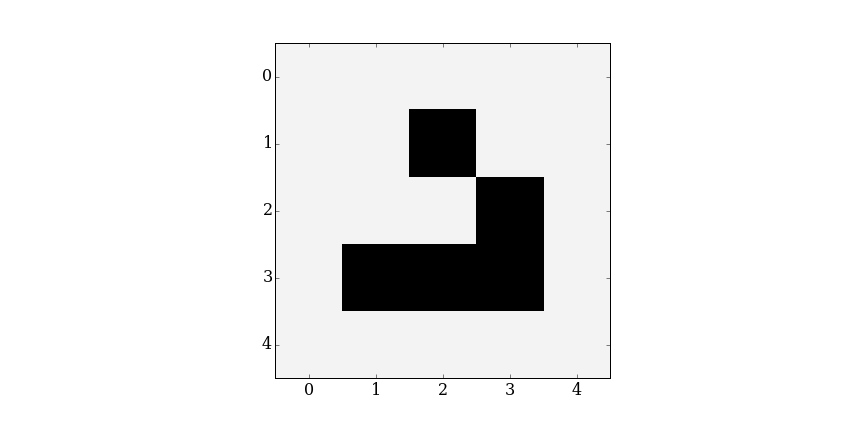
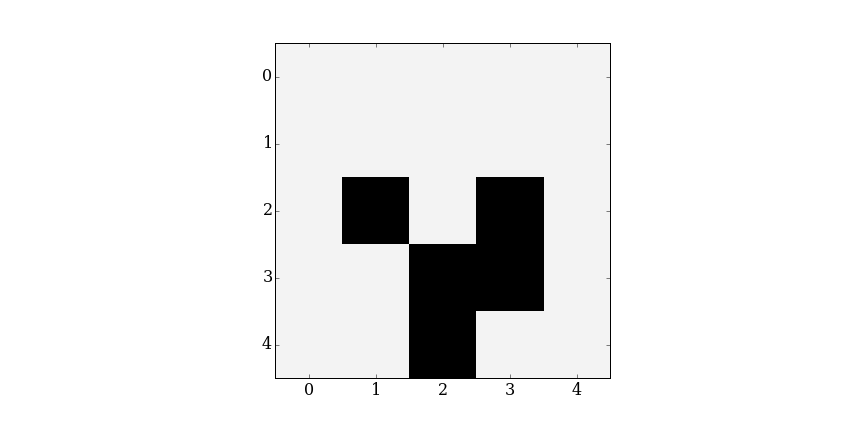
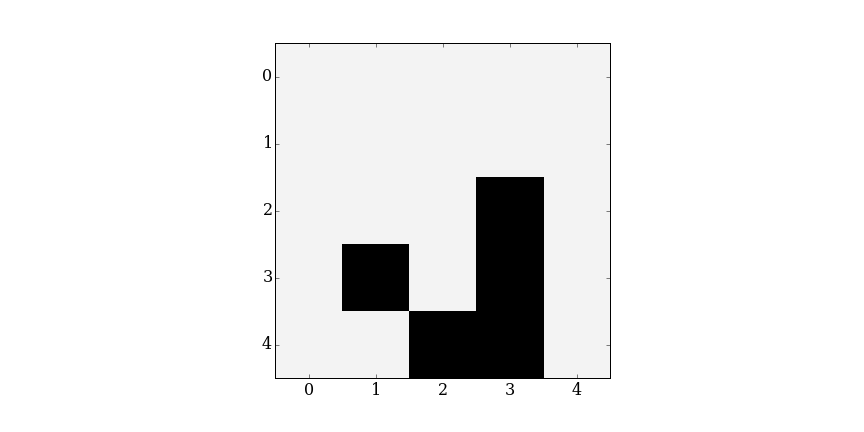
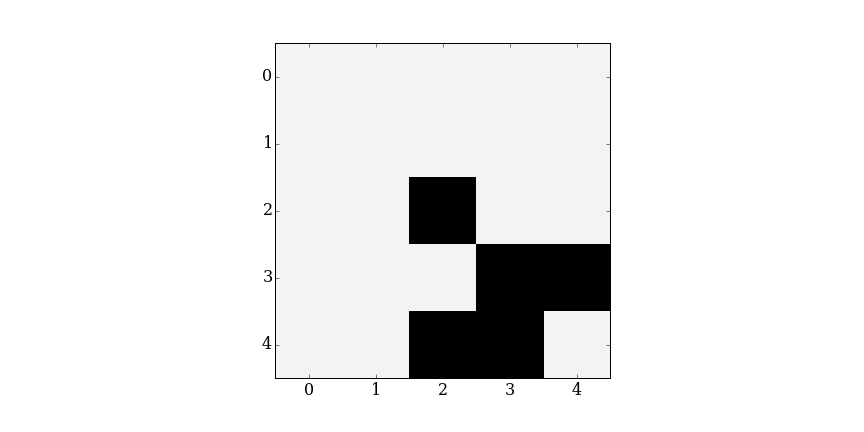
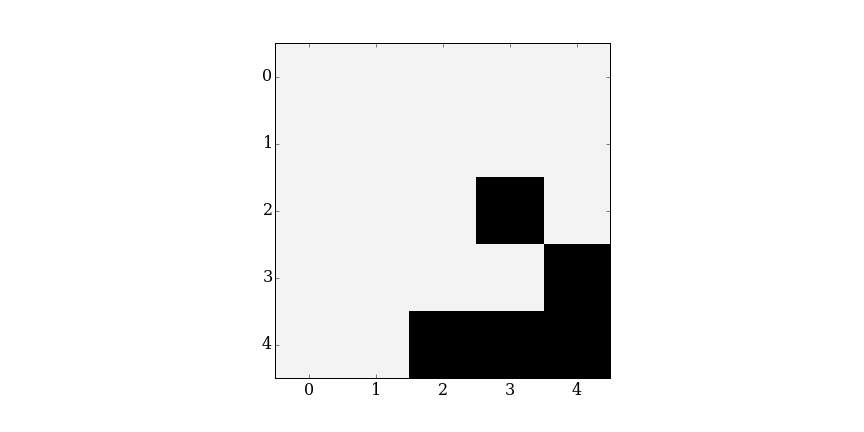
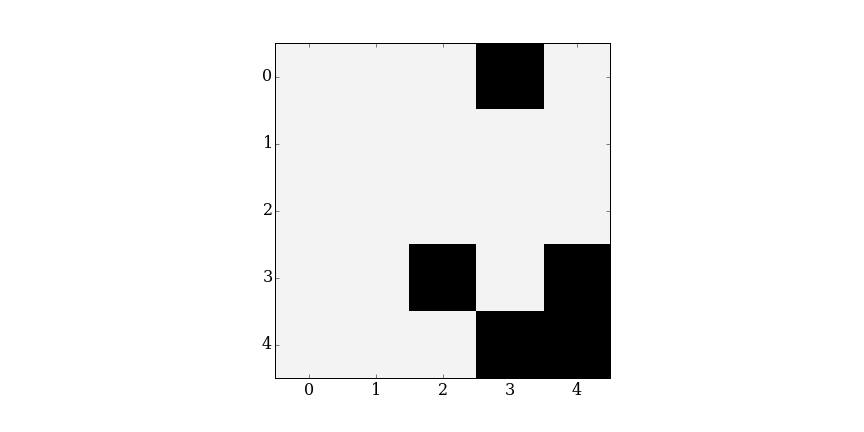
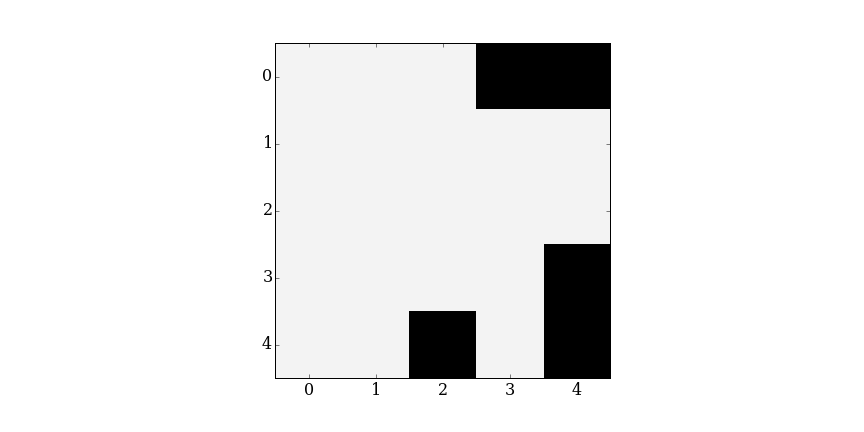
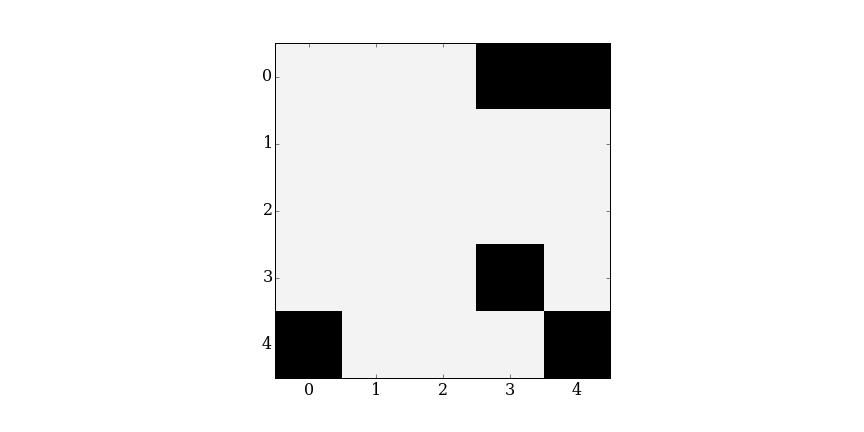
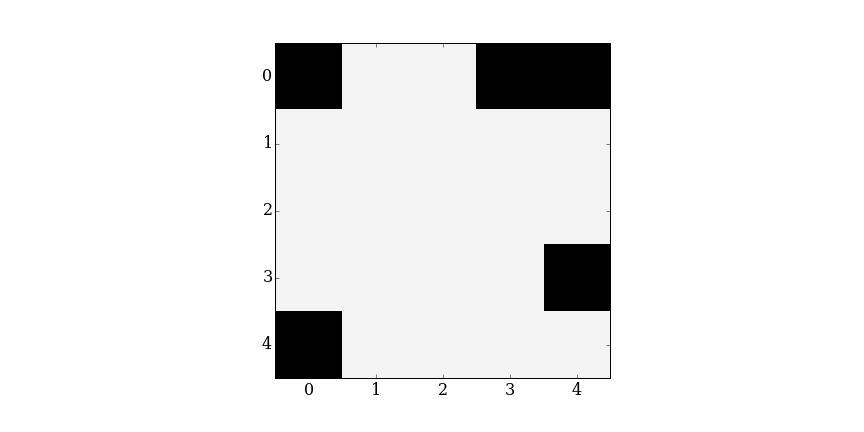
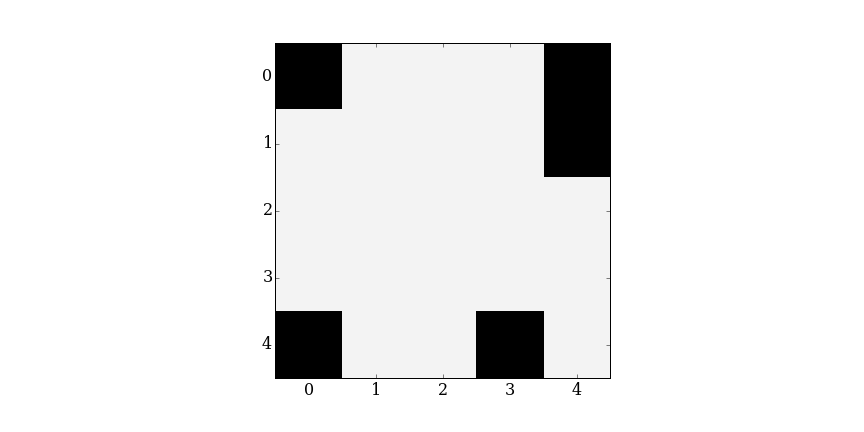

In [5]:
# Try the glider

grid_glider = numpy.array([[0,0,0,0,0,0,0],
                           [0,0,0,0,0,0,0],
                           [0,0,1,0,0,0,0],
                           [0,0,0,1,1,0,0],
                           [0,0,1,1,0,0,0],
                           [0,0,0,0,0,0,0],
                           [0,0,0,0,0,0,0]])

life_animation(grid_glider)


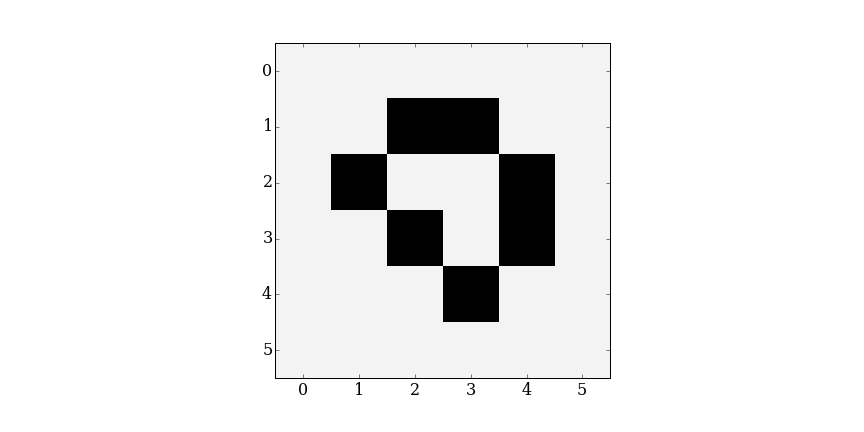
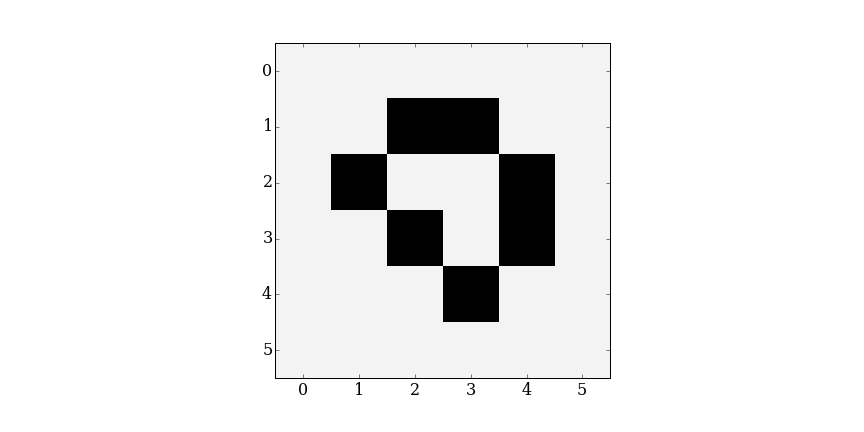
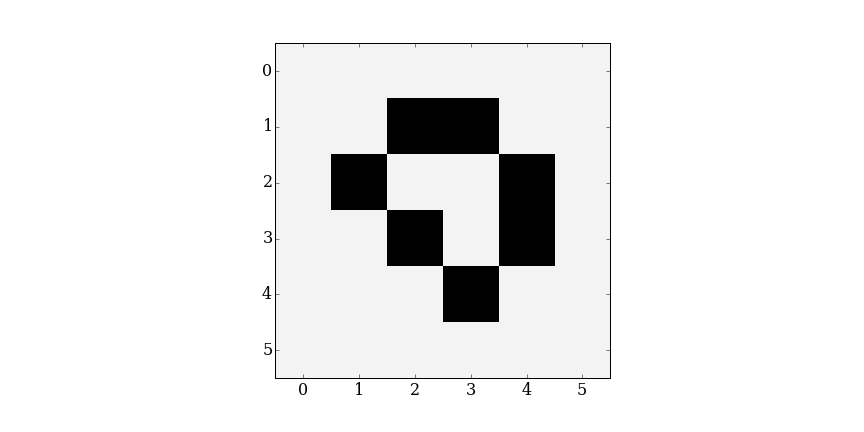
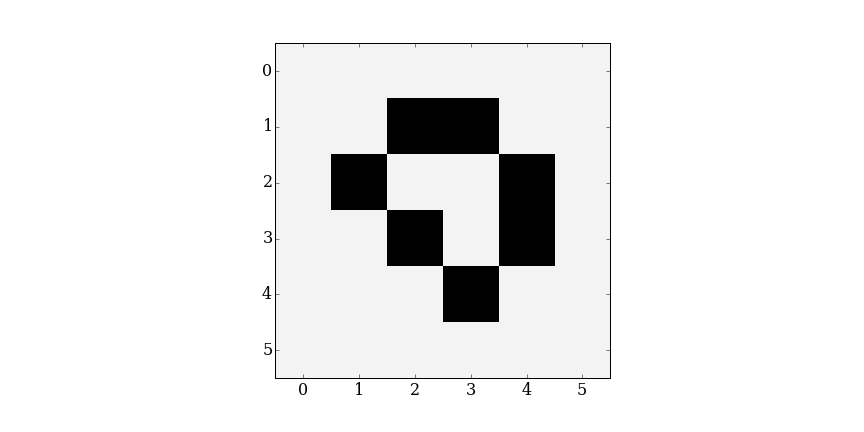
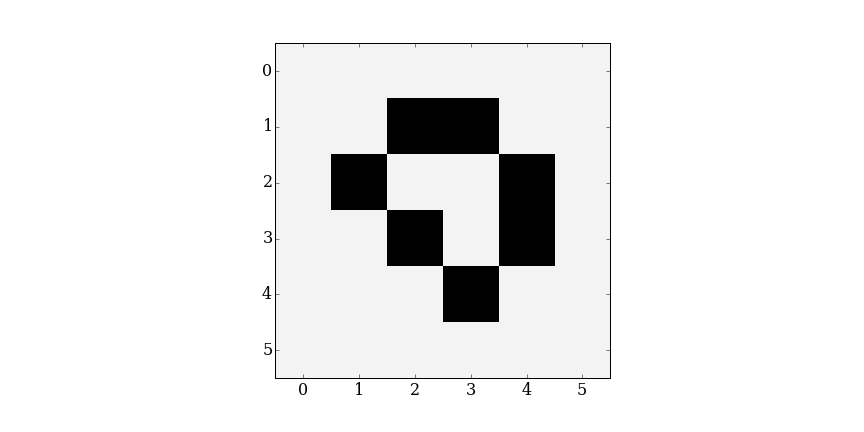
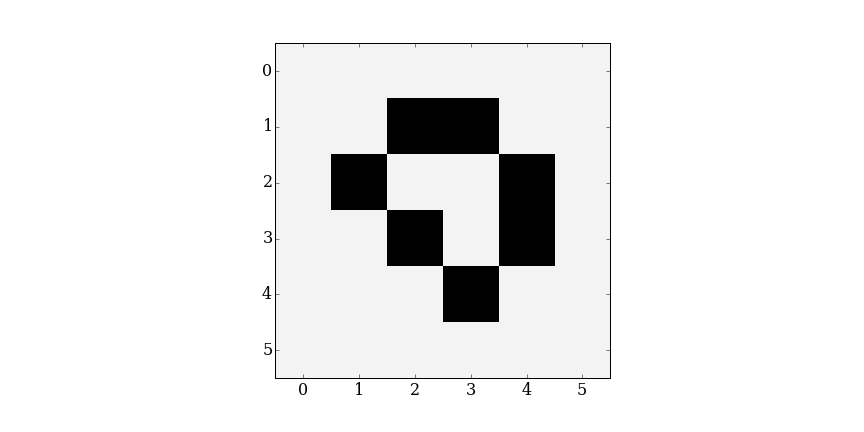
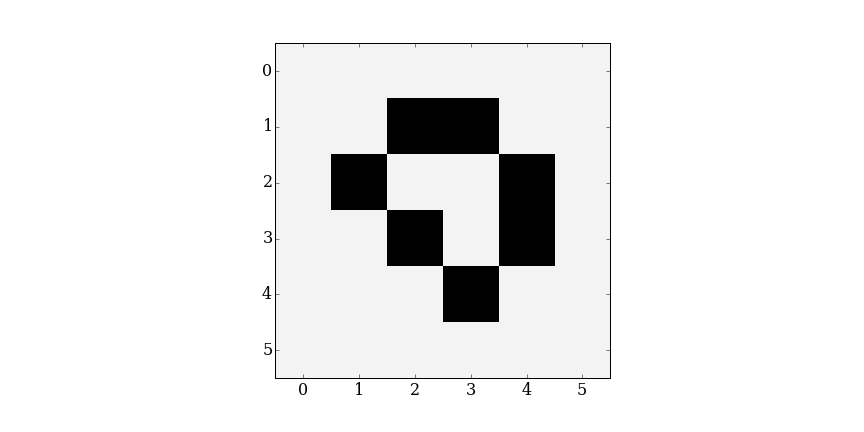
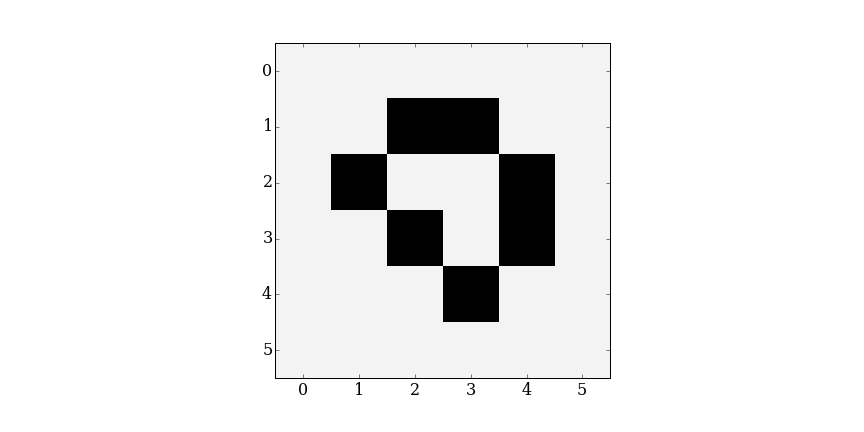
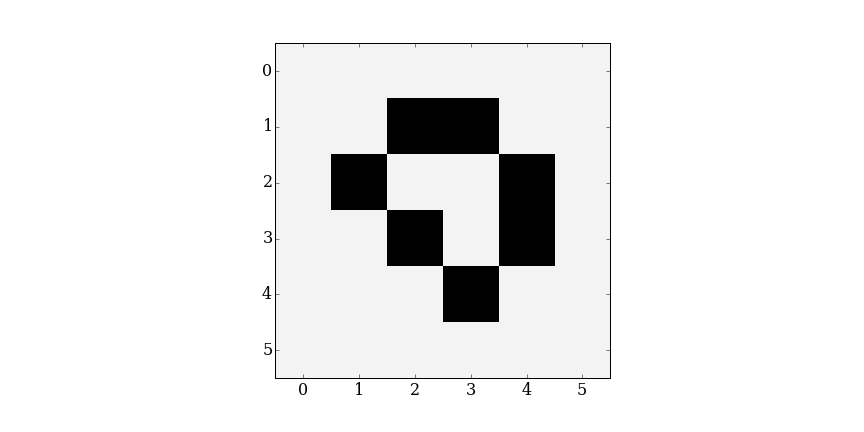
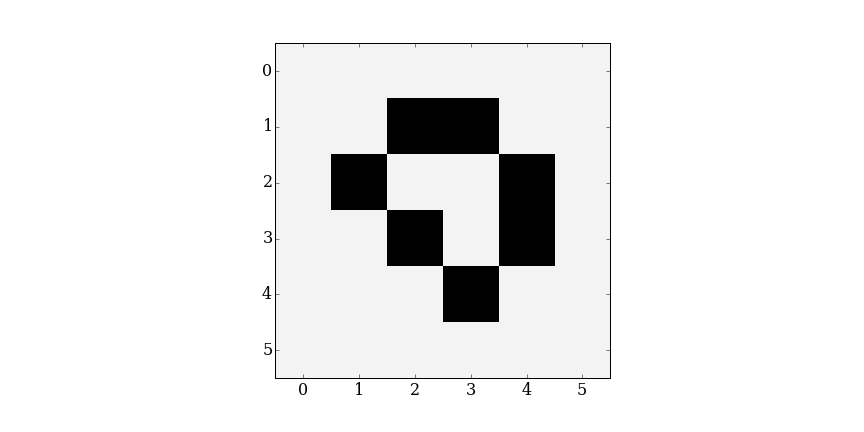

In [6]:
# Try the loaf

grid_loaf = numpy.array([[0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0],
                         [0,0,0,1,1,0,0,0],
                         [0,0,1,0,0,1,0,0],
                         [0,0,0,1,0,1,0,0],
                         [0,0,0,0,1,0,0,0],
                         [0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0]])

life_animation(grid_loaf)


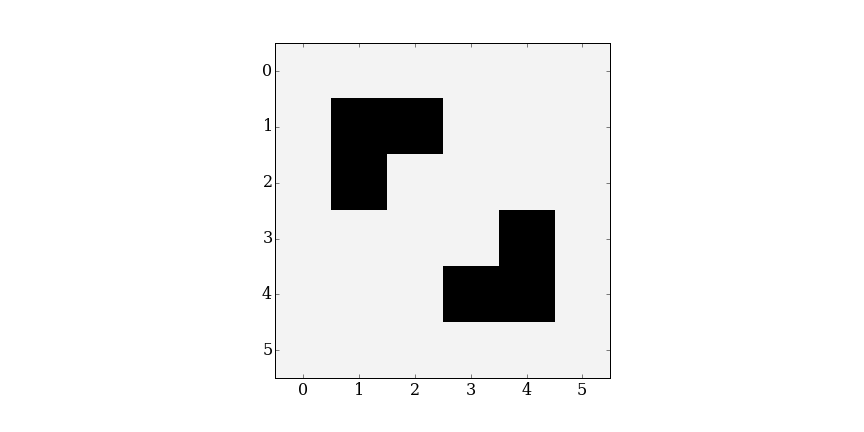
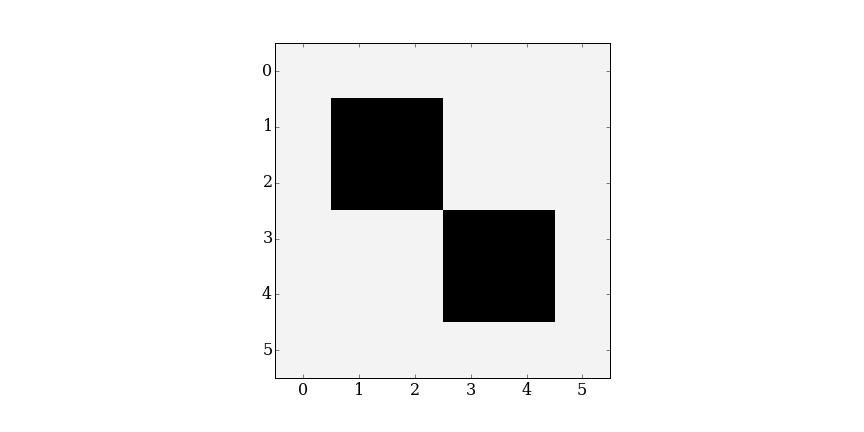
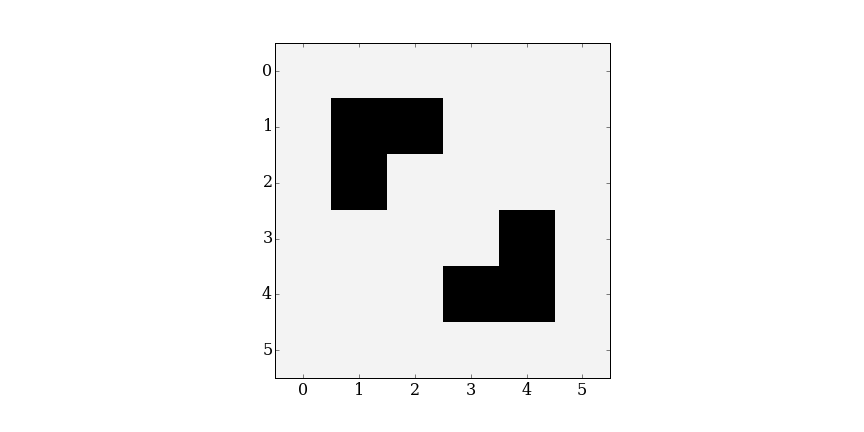
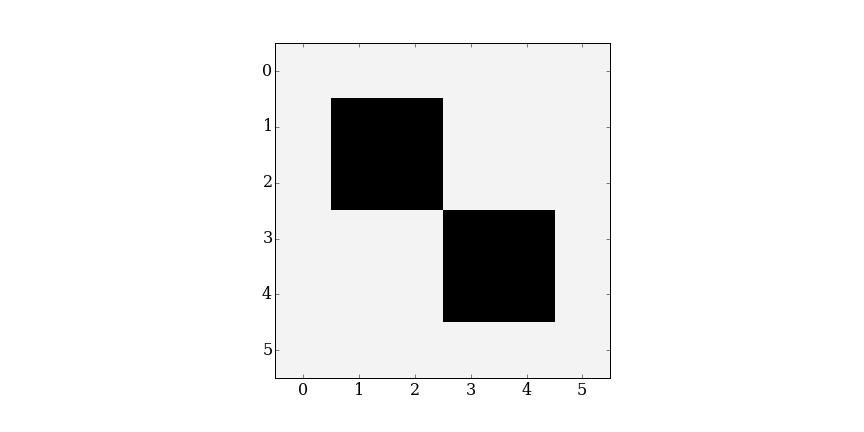
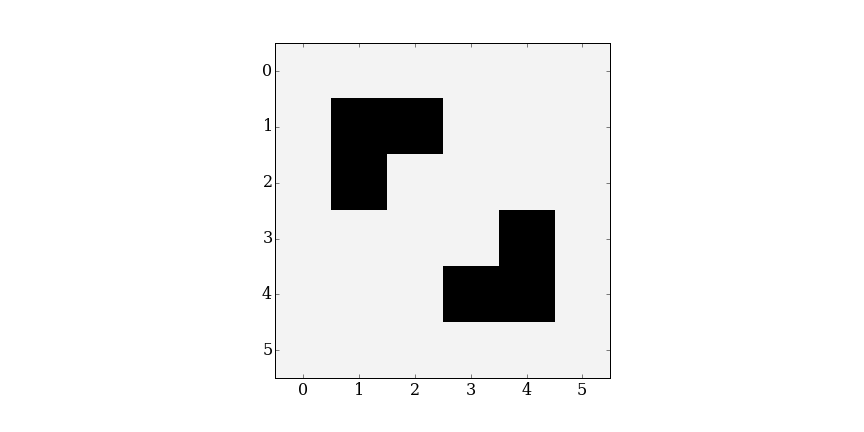
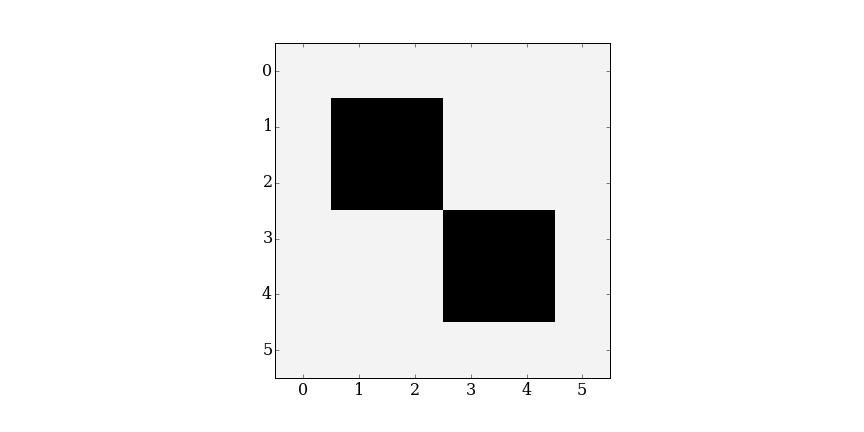
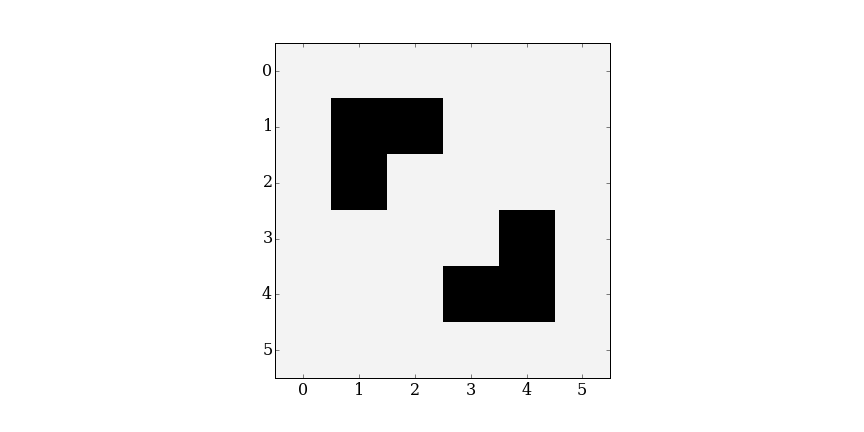
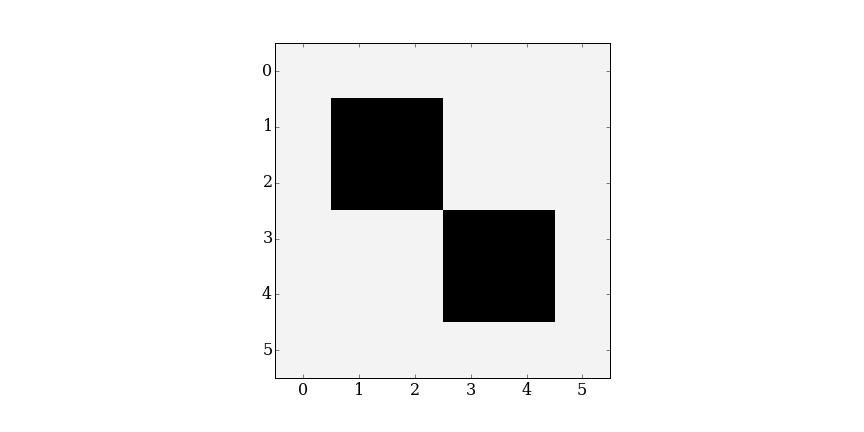
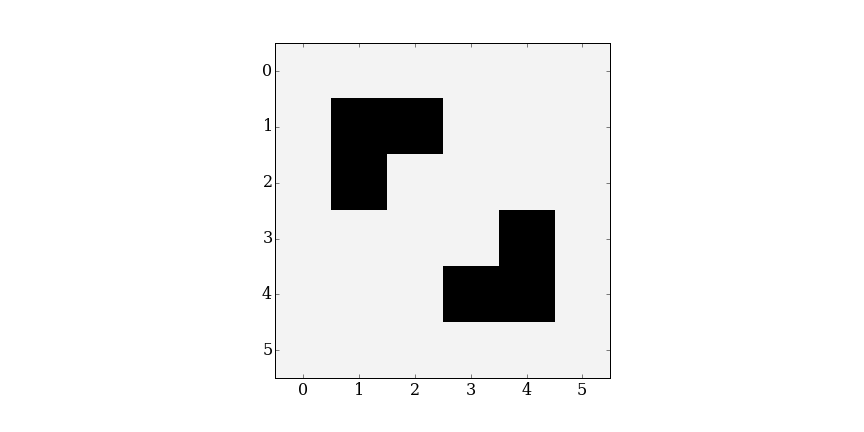
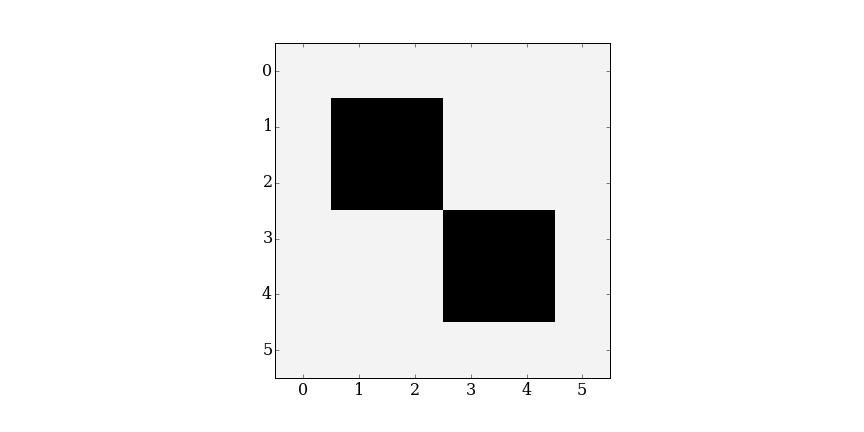

In [7]:
# Try the beacon

grid_beacon = numpy.array([[0,0,0,0,0,0,0,0],
                           [0,0,0,0,0,0,0,0],
                           [0,0,1,1,0,0,0,0],
                           [0,0,1,1,0,0,0,0],
                           [0,0,0,0,1,1,0,0],
                           [0,0,0,0,1,1,0,0],
                           [0,0,0,0,0,0,0,0],
                           [0,0,0,0,0,0,0,0]])

life_animation(grid_beacon)

Create some random $256 \times 256$ grids and see what behaviour results.


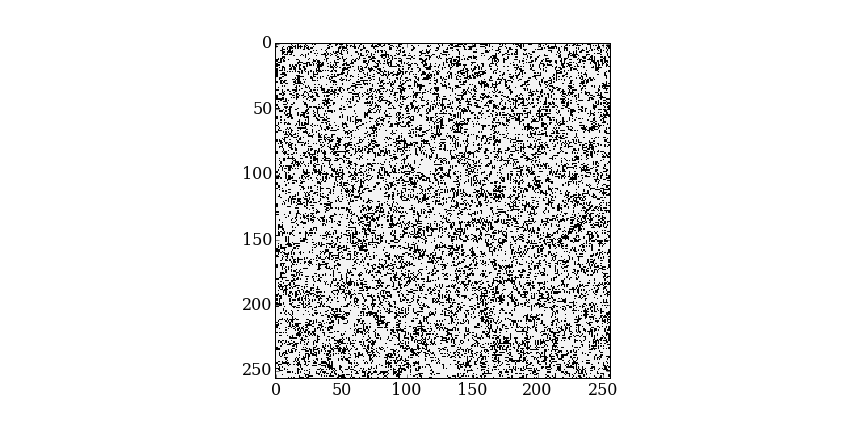
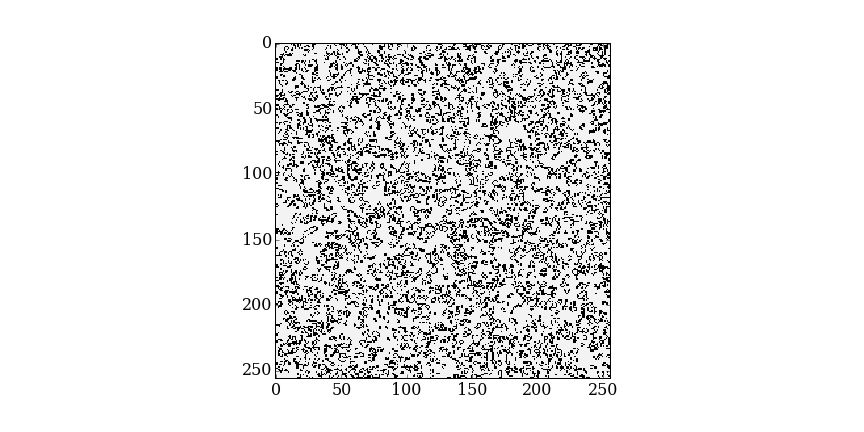
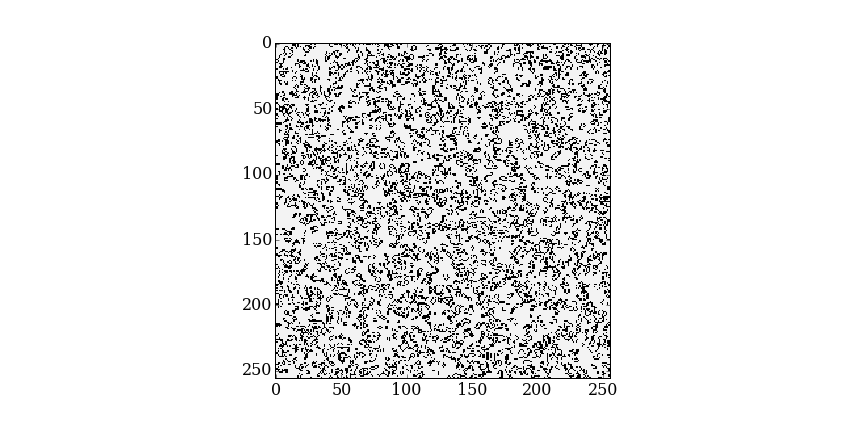
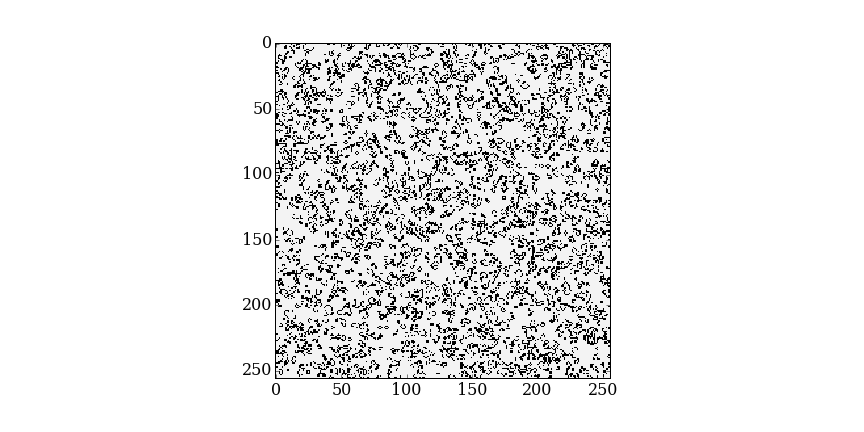
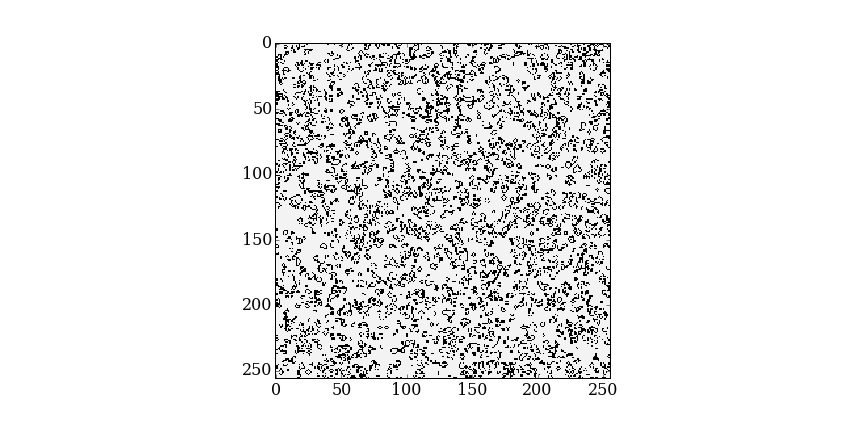
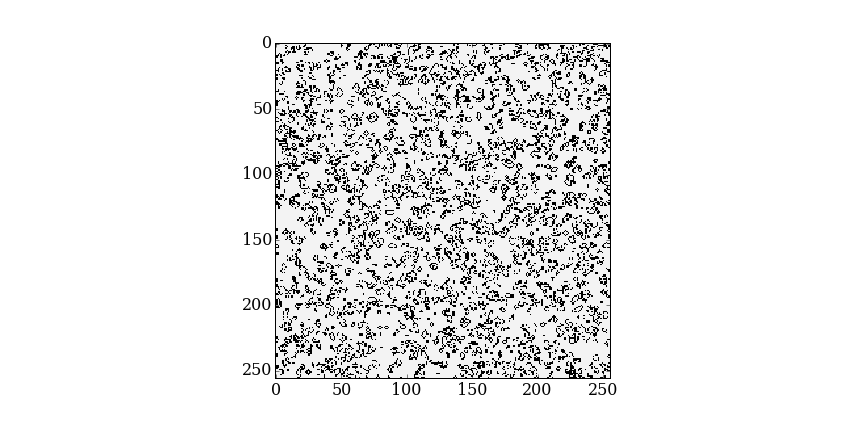
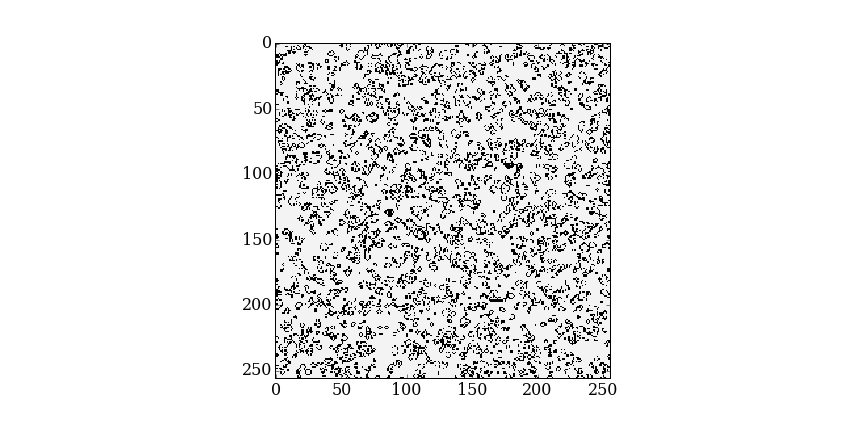
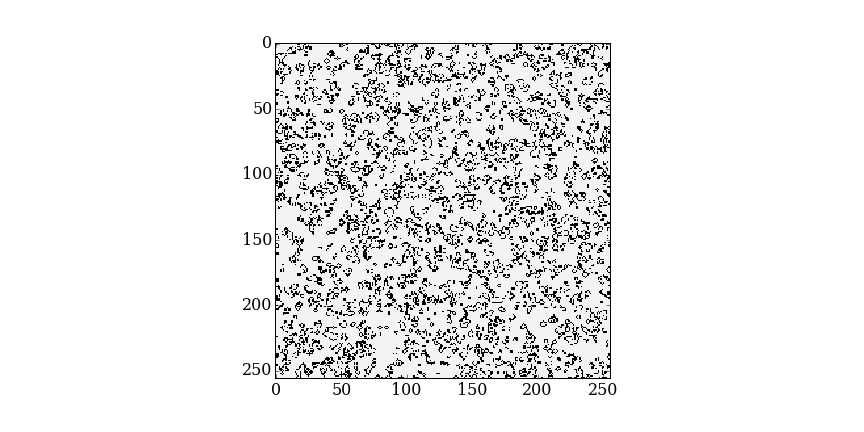
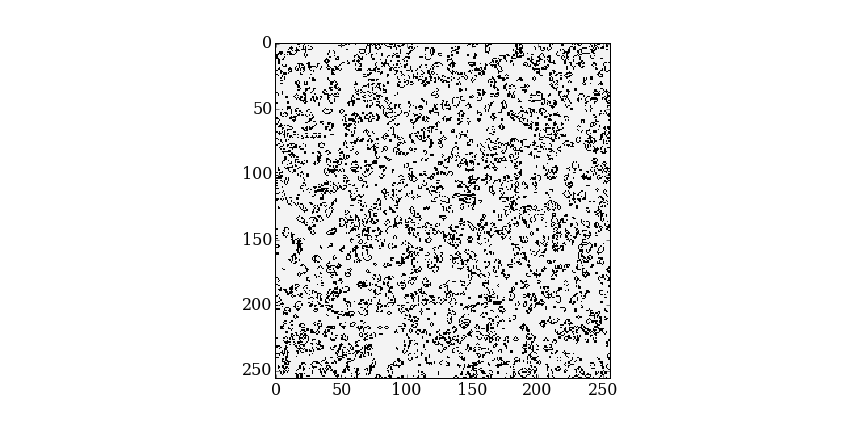
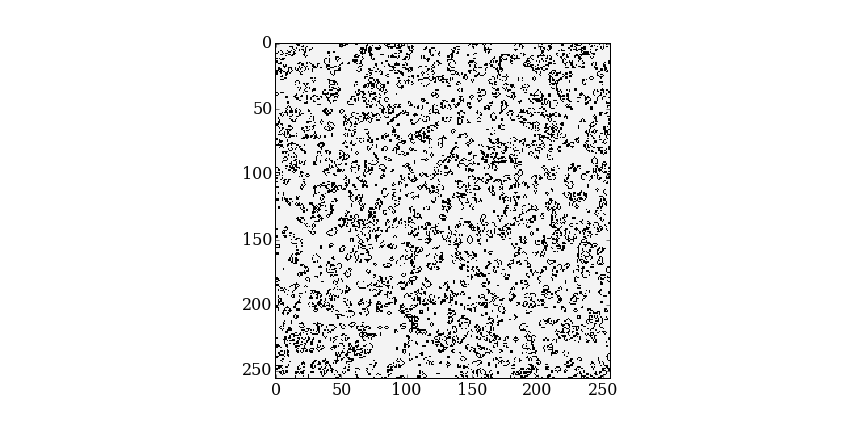
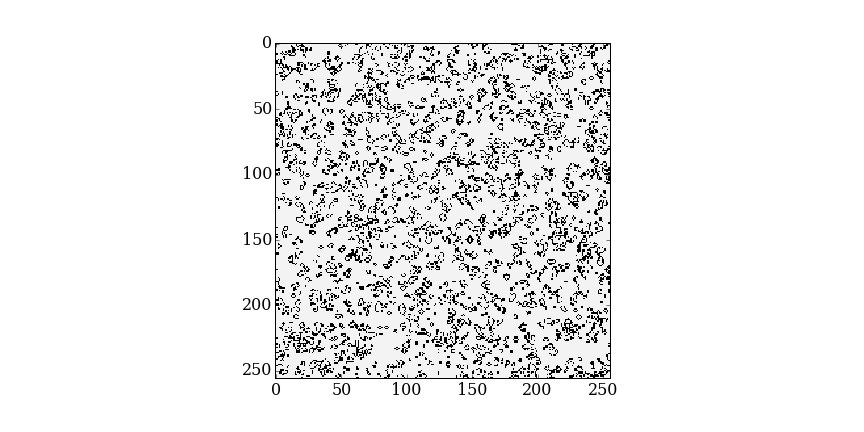
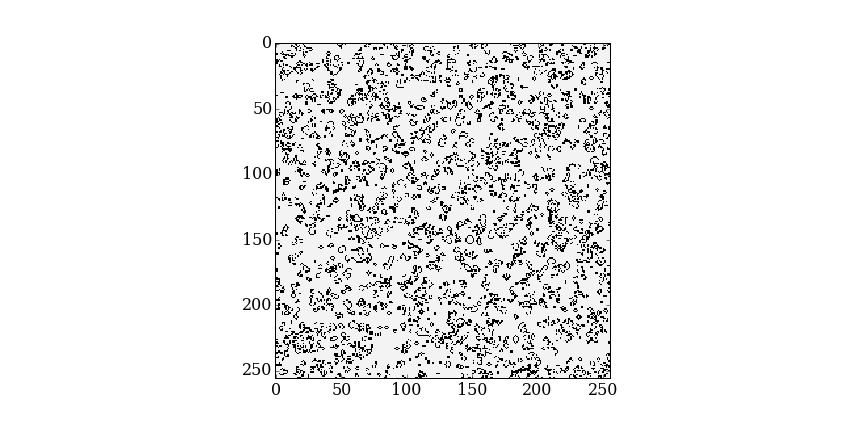
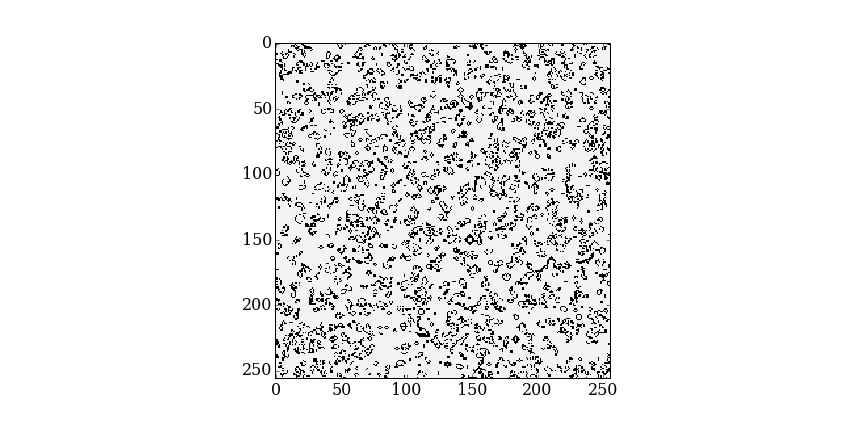
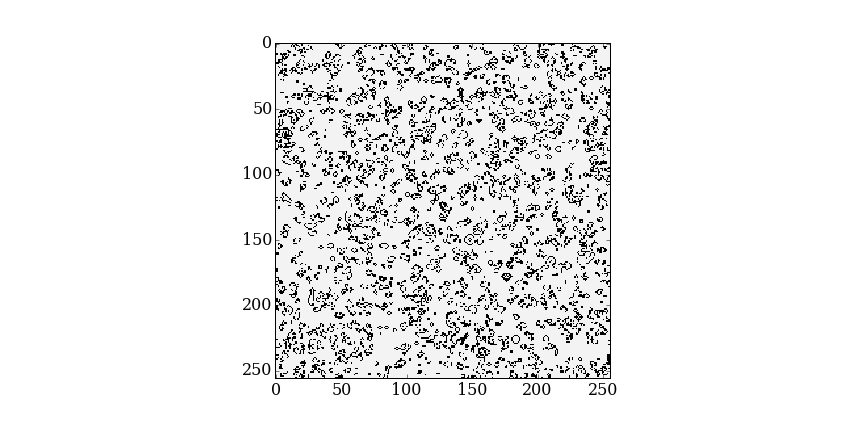
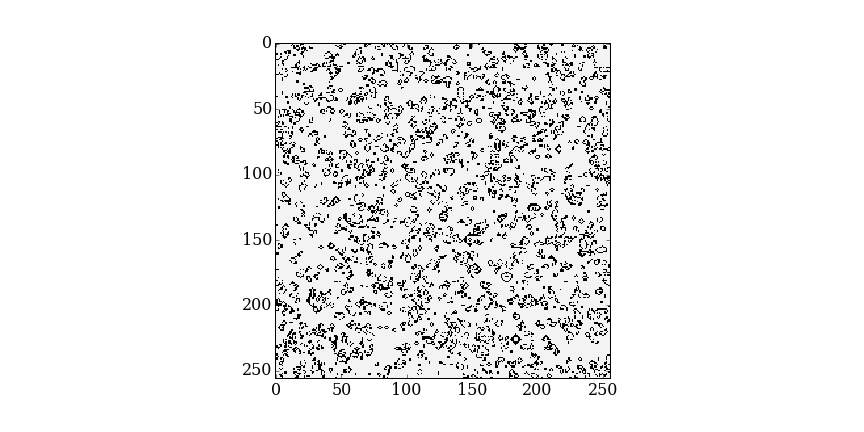
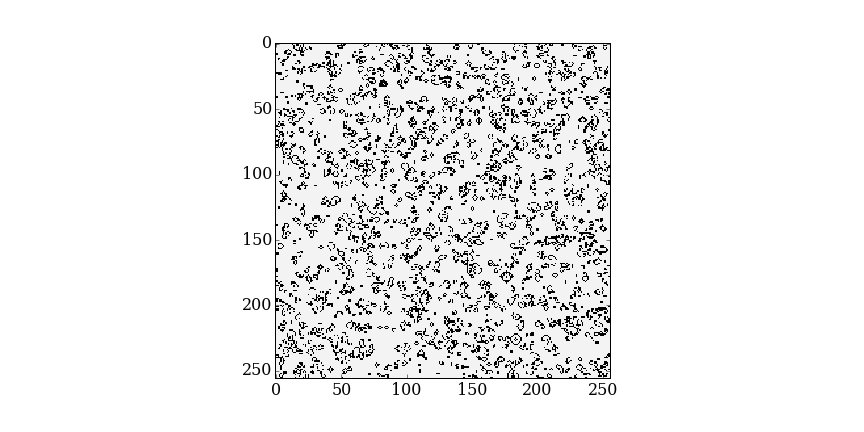
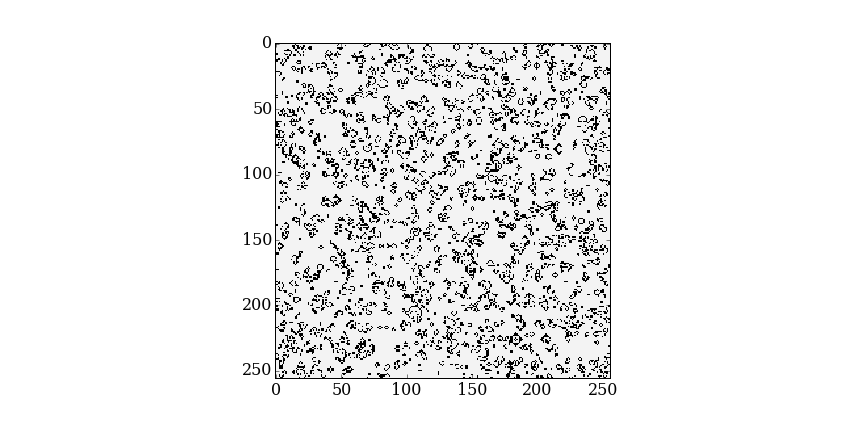
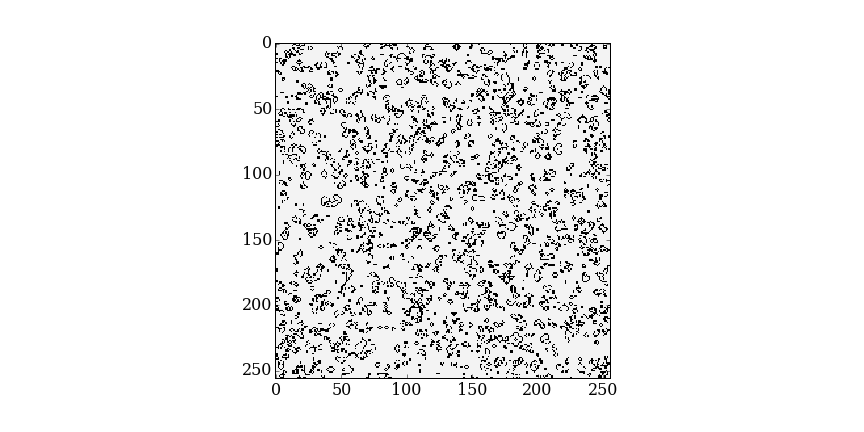
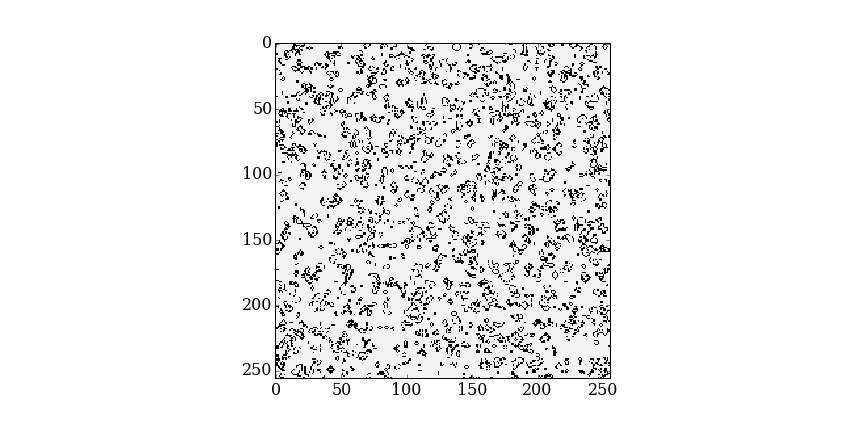
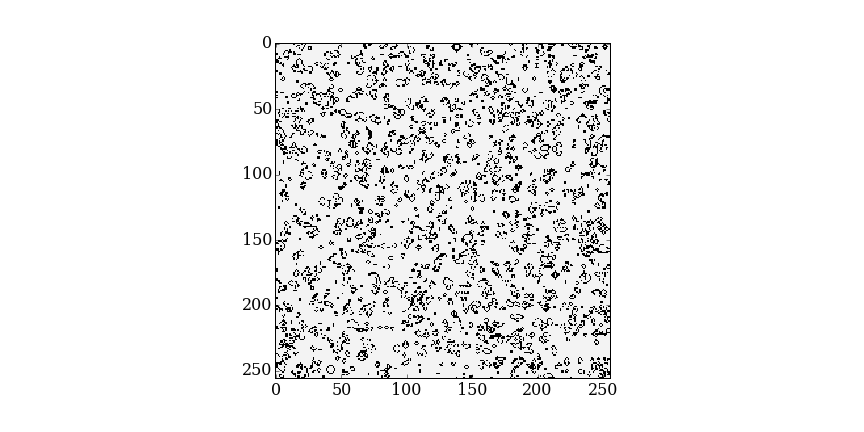
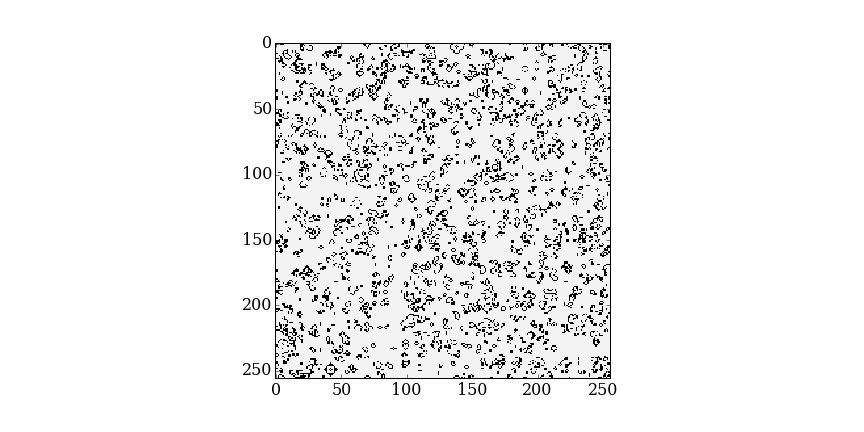
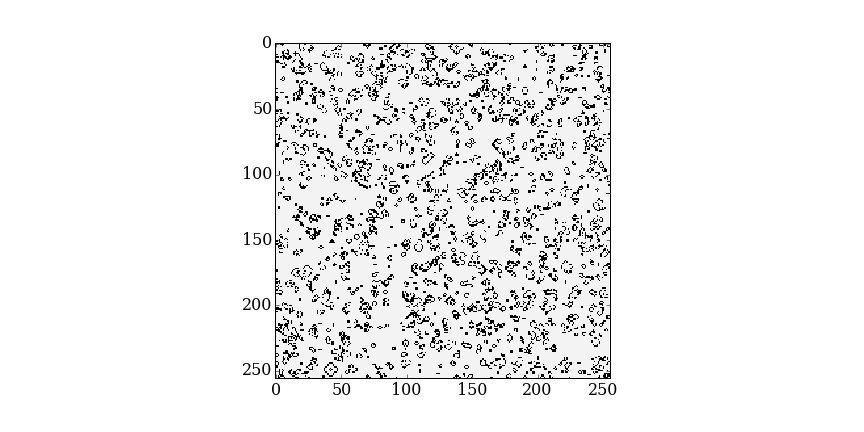
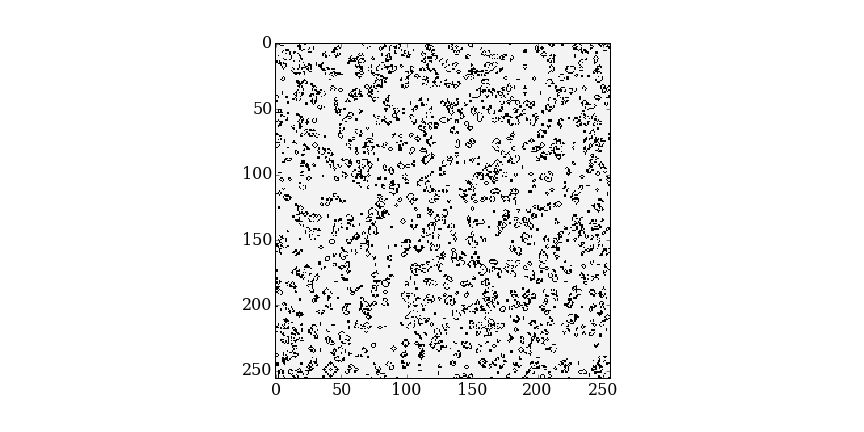
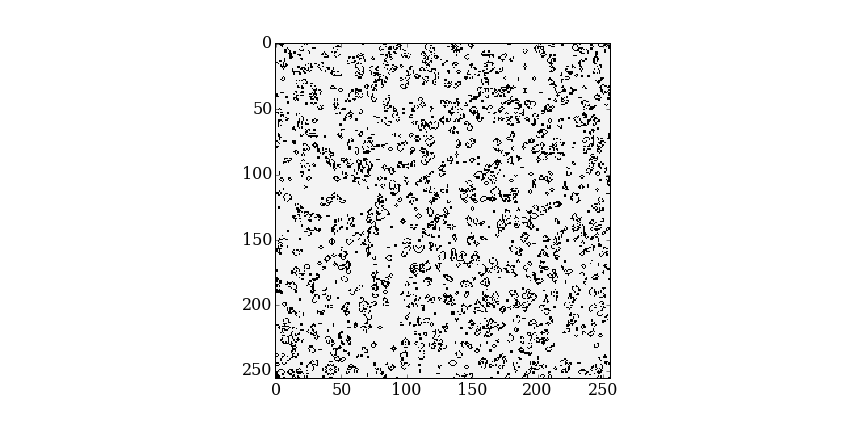
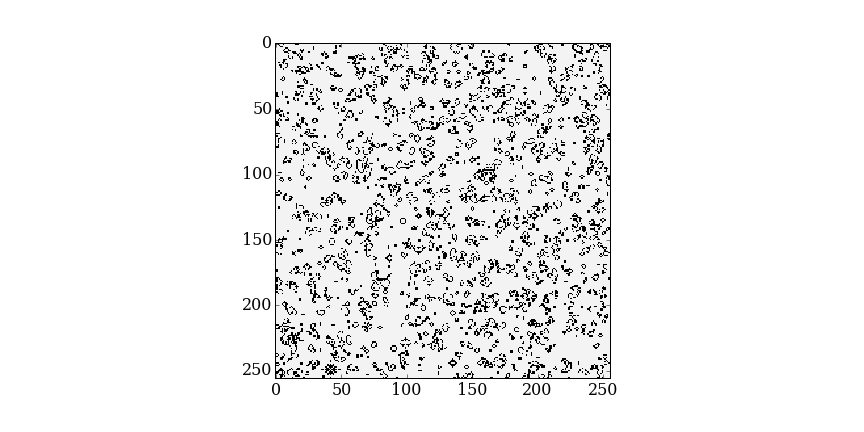
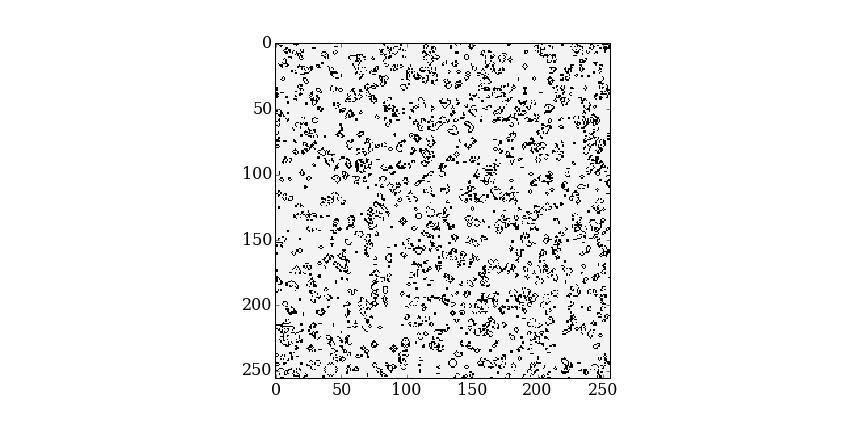
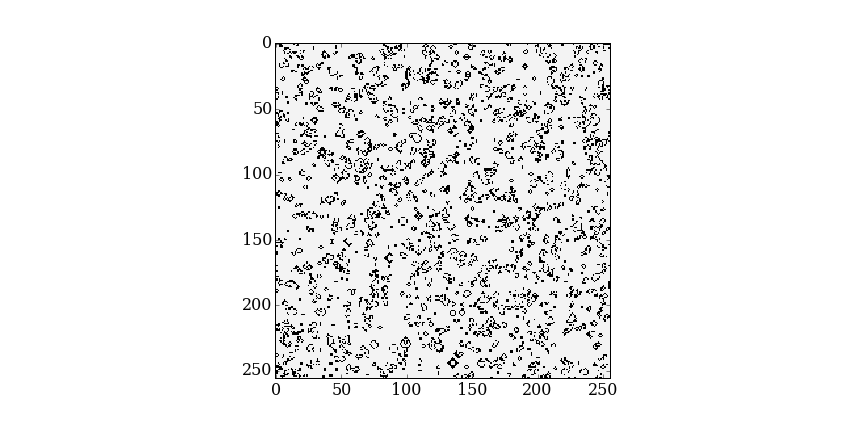
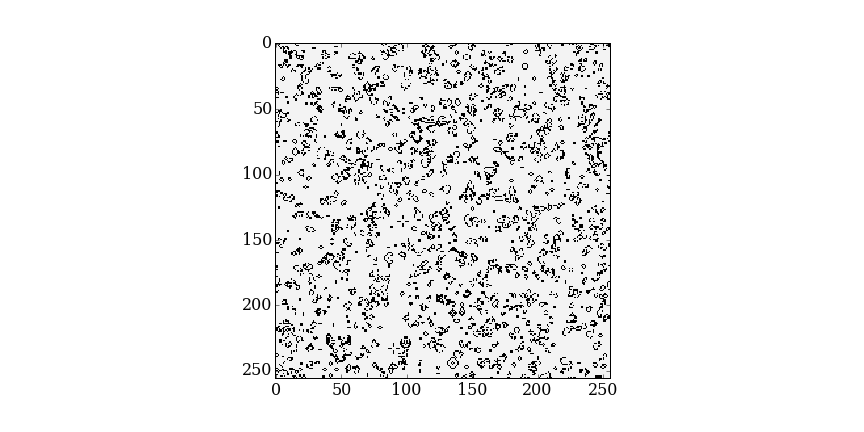
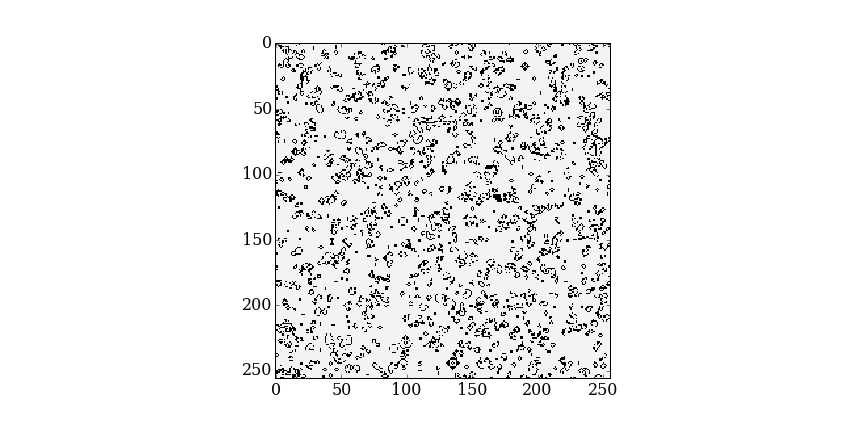
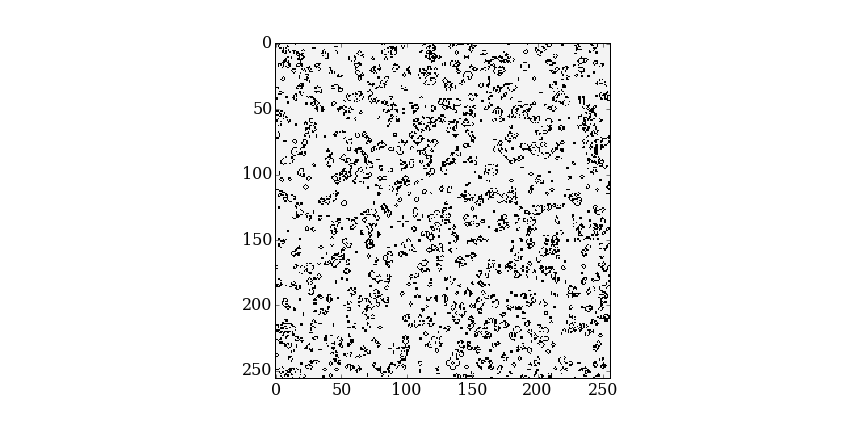
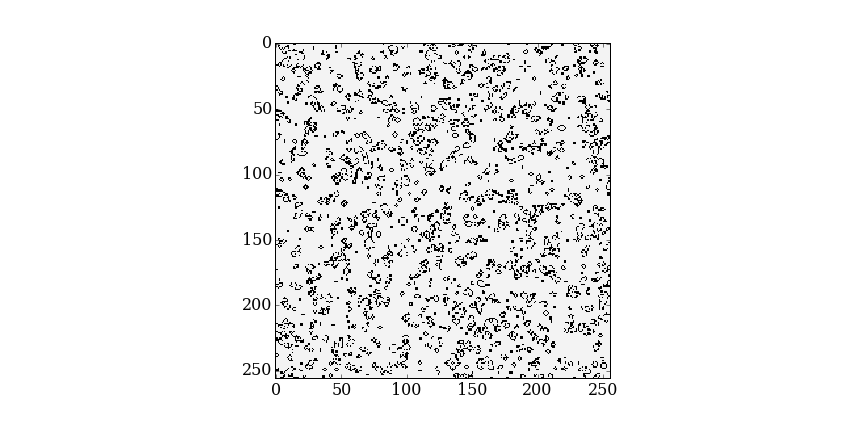
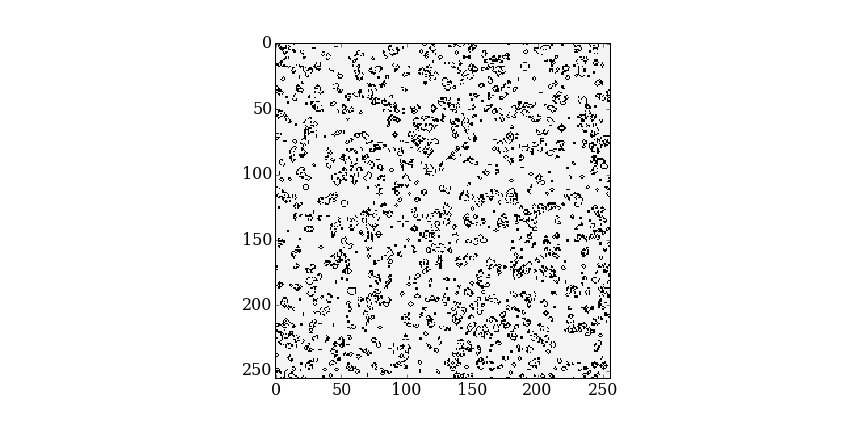
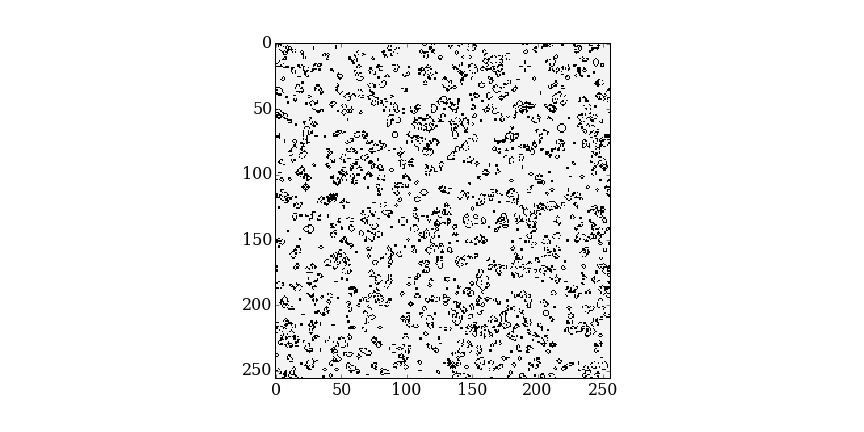
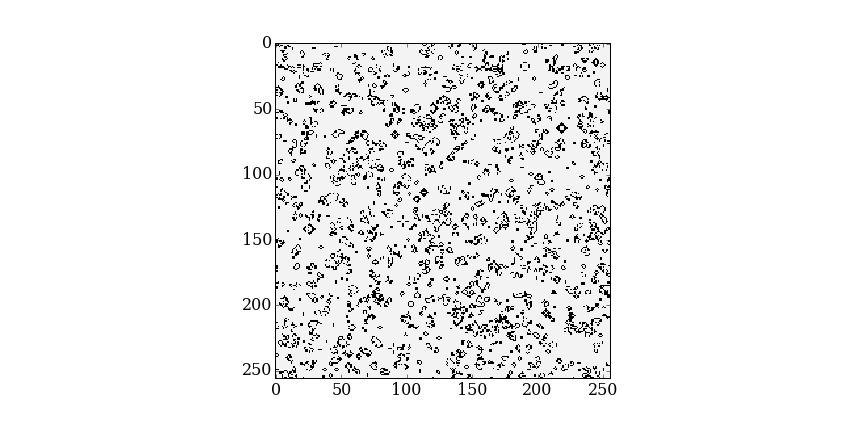
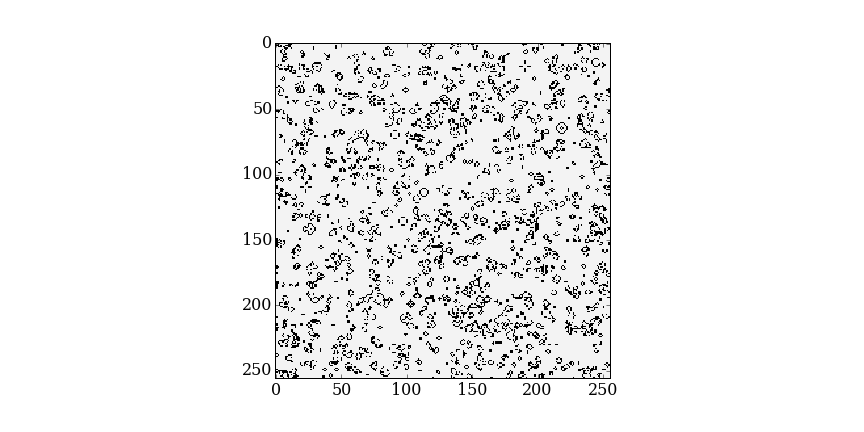
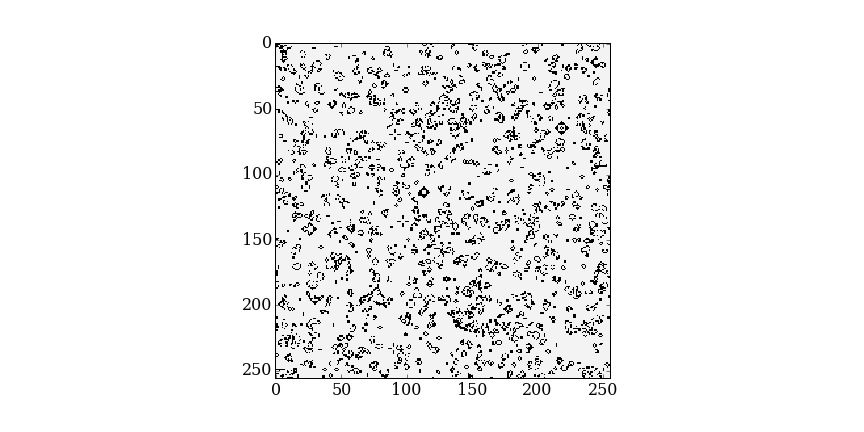
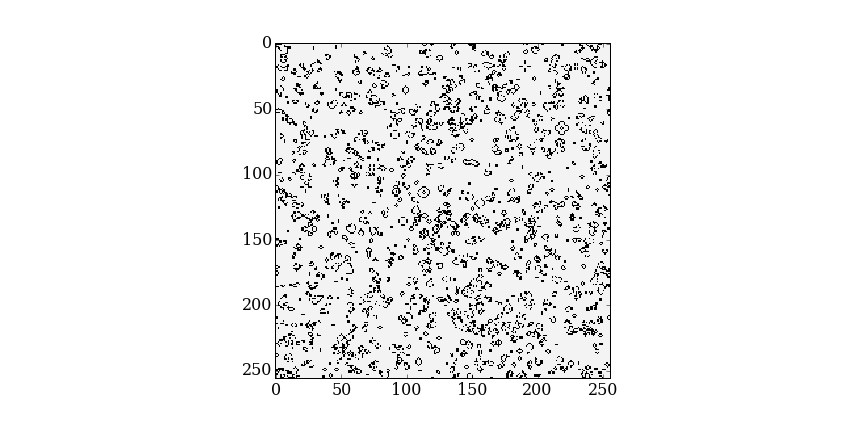
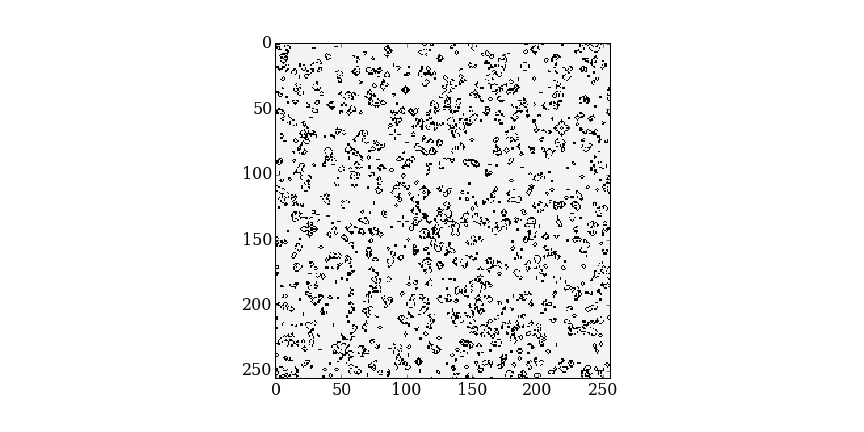
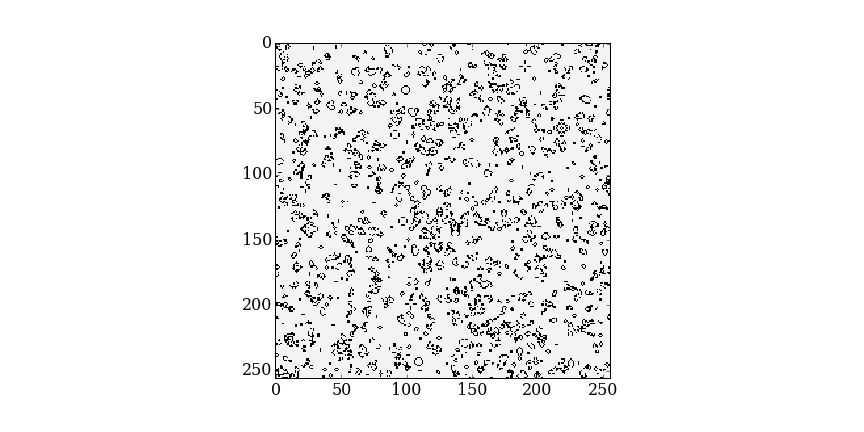
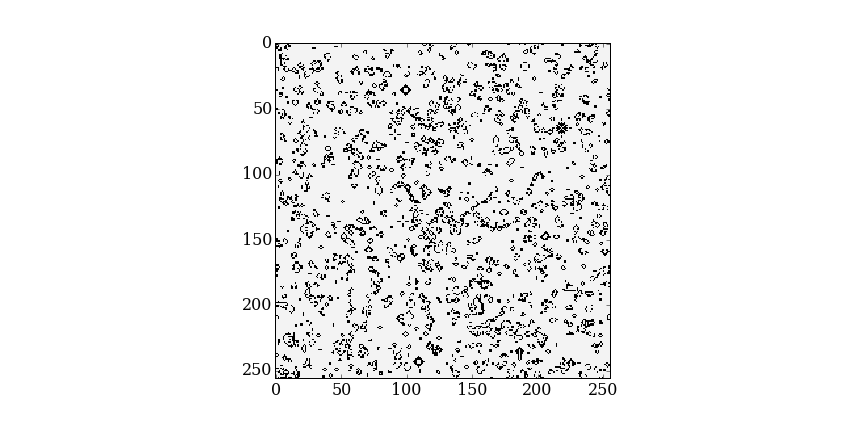
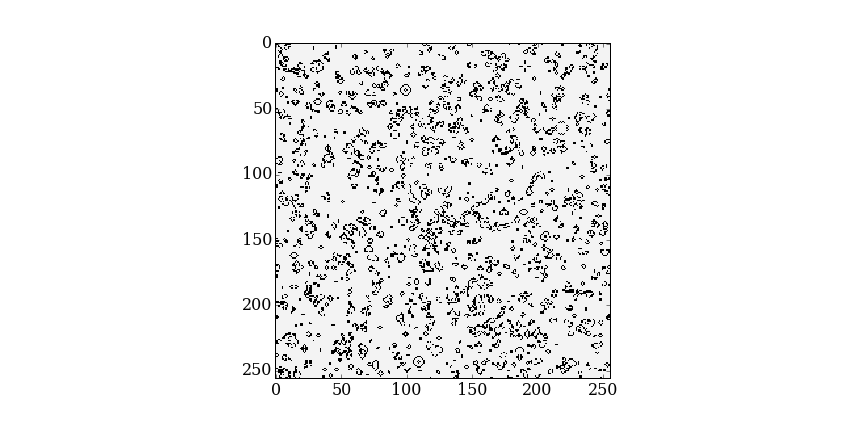
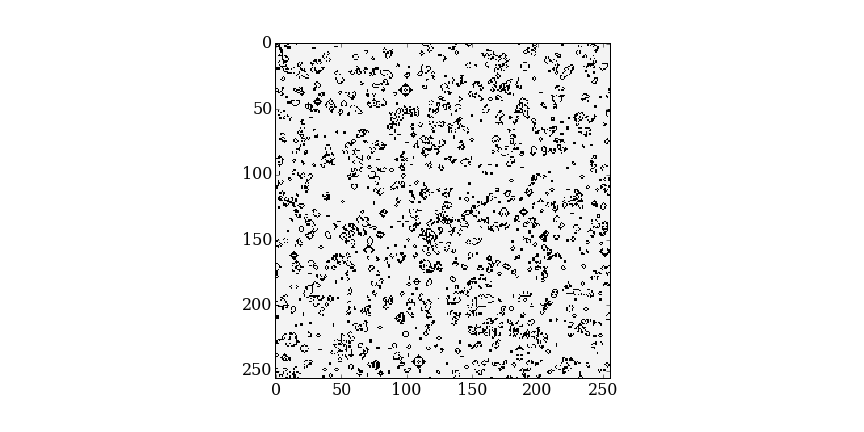
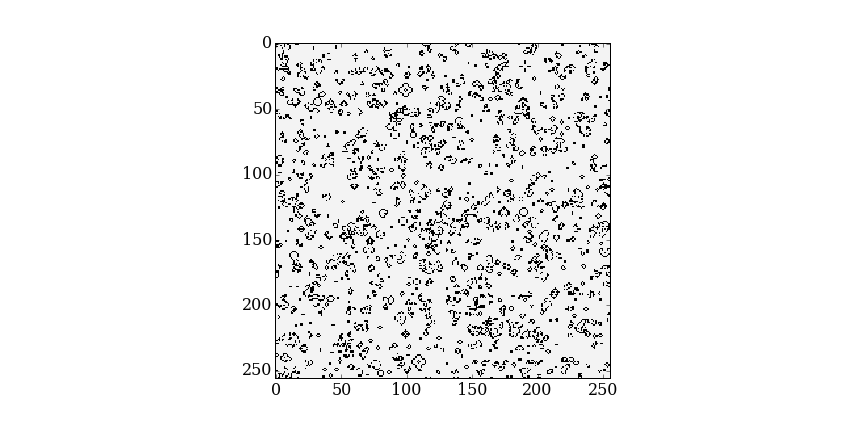
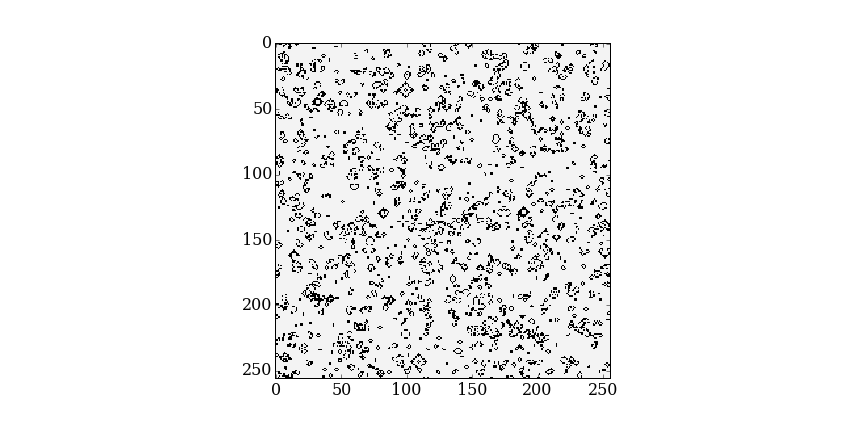
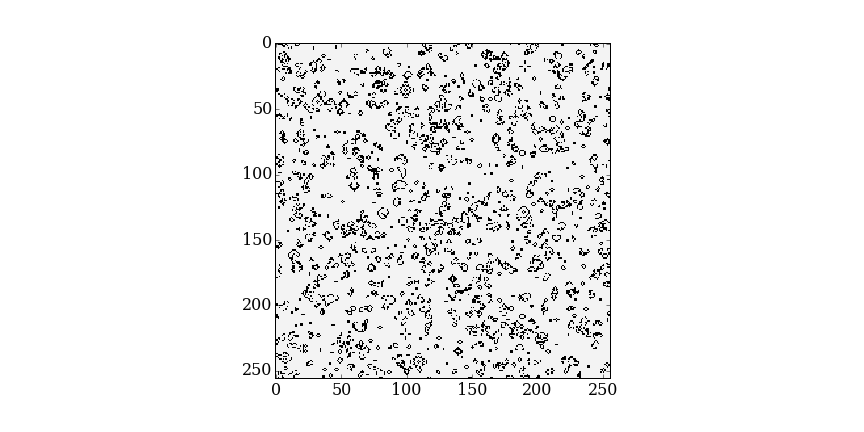
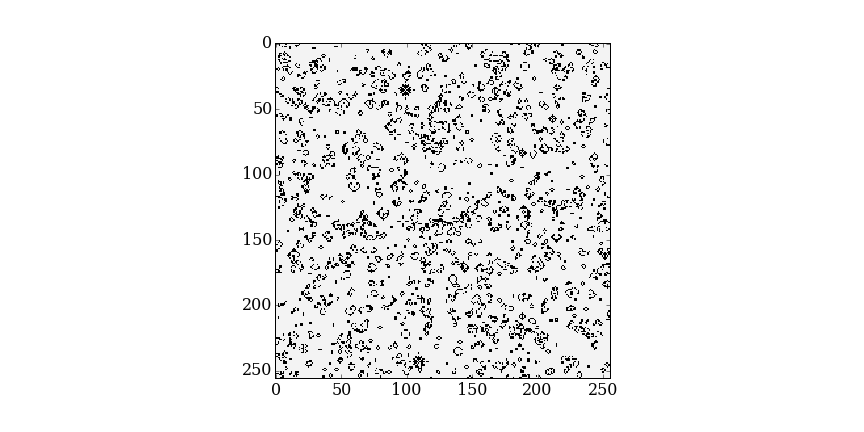
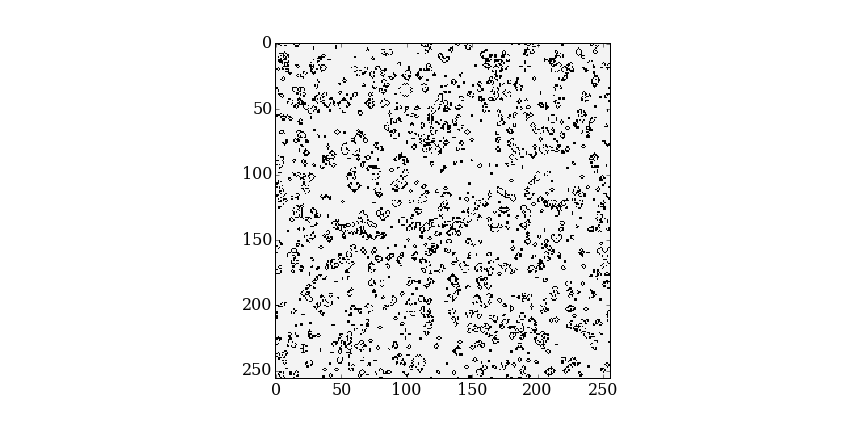
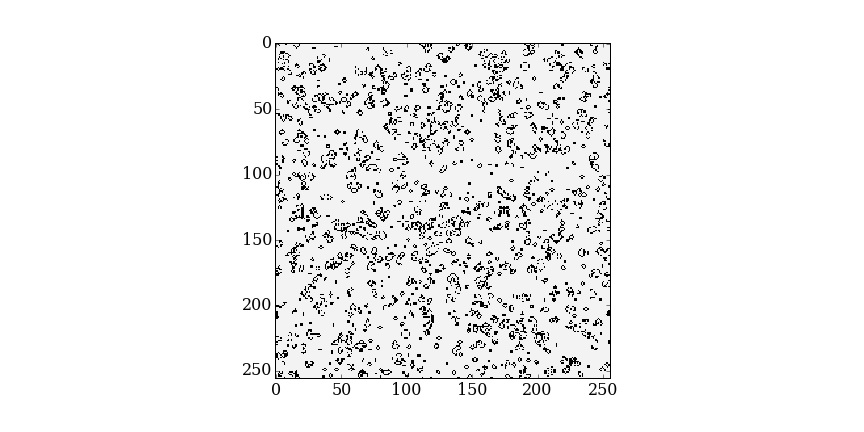
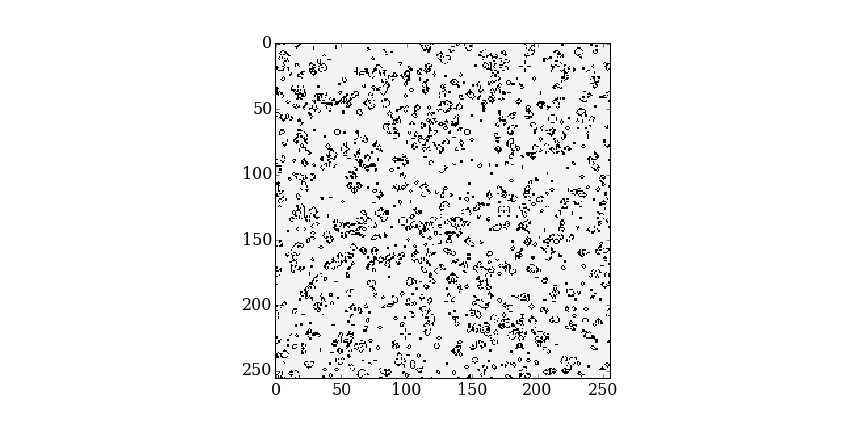
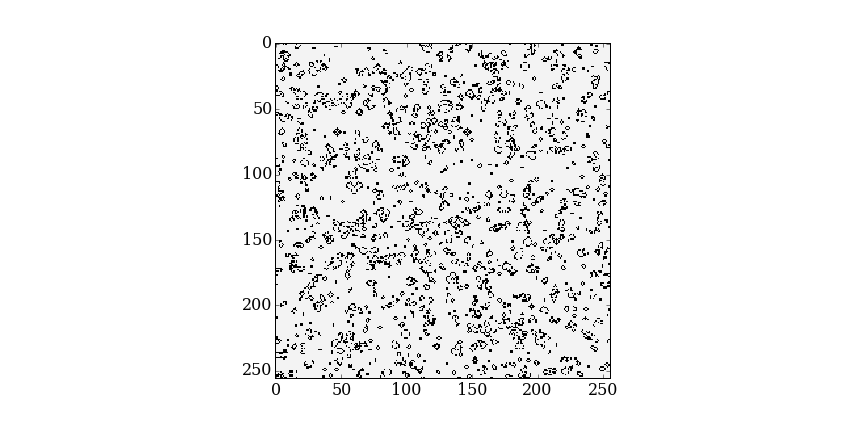
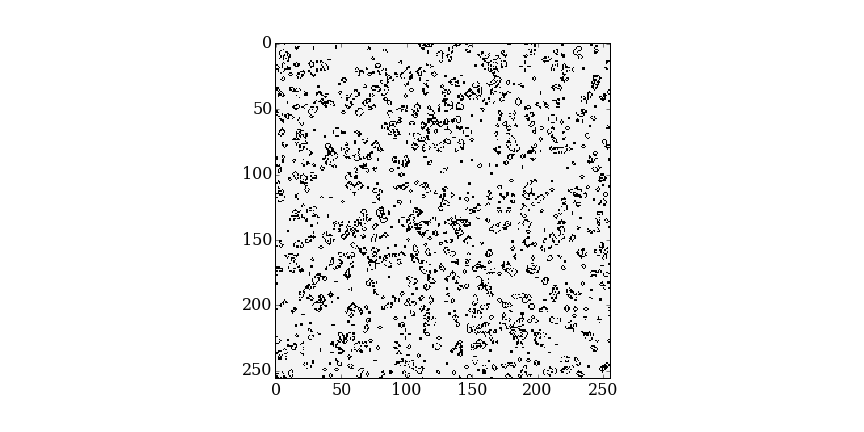
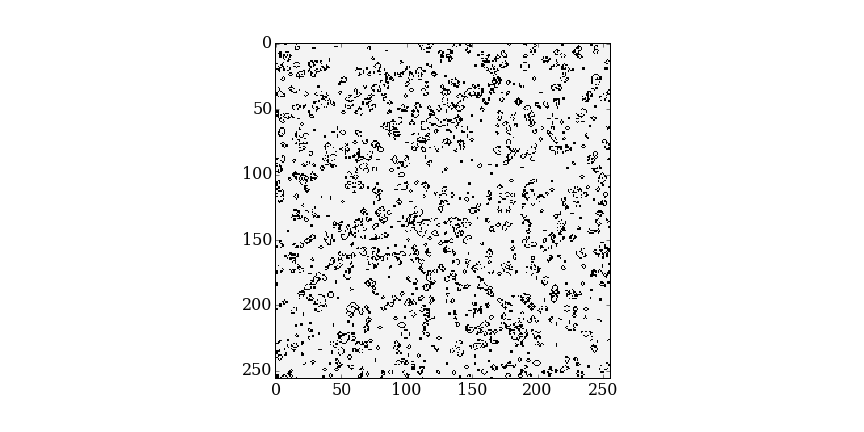
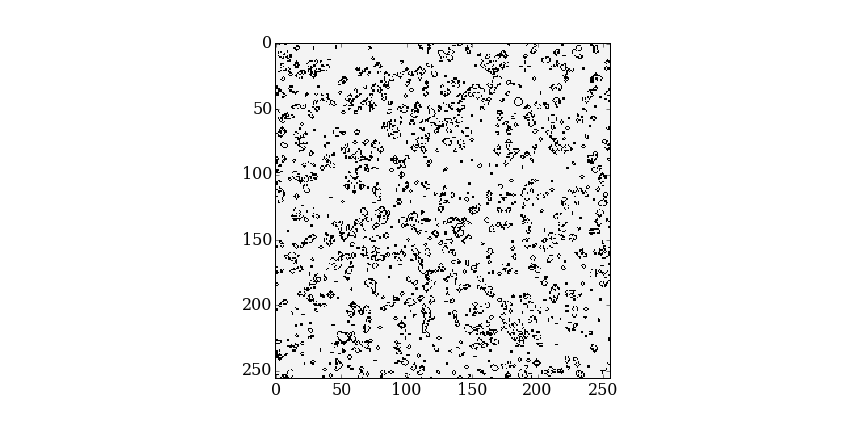
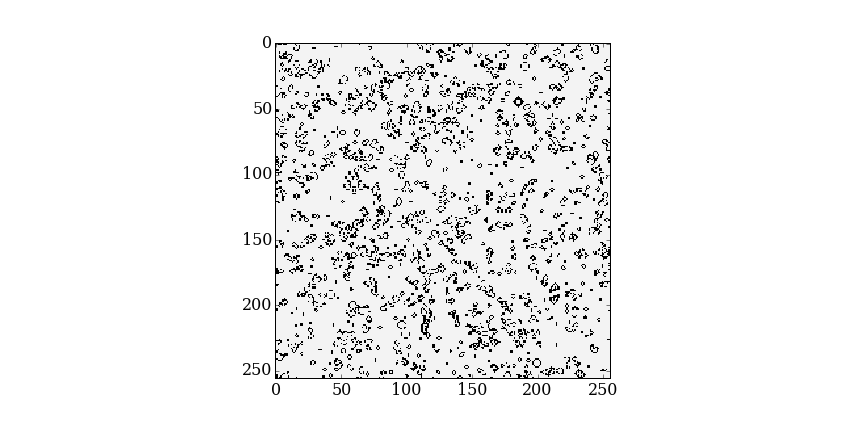
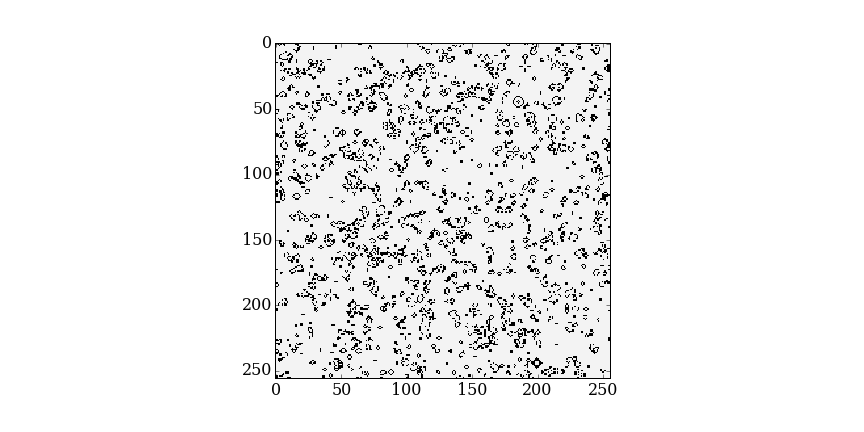
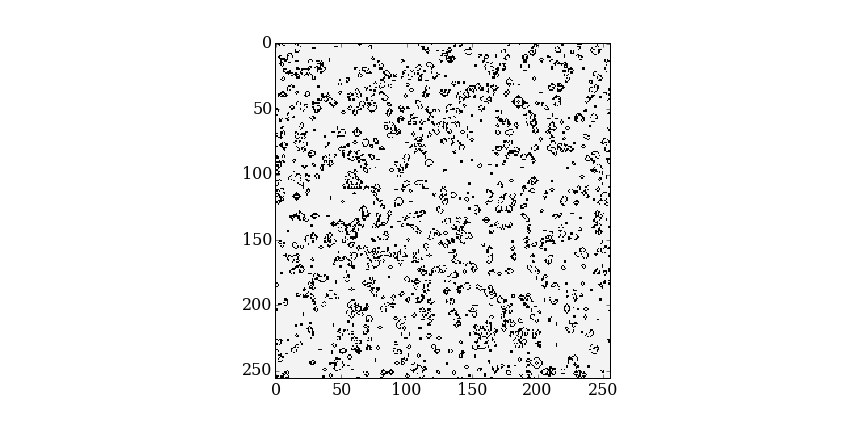
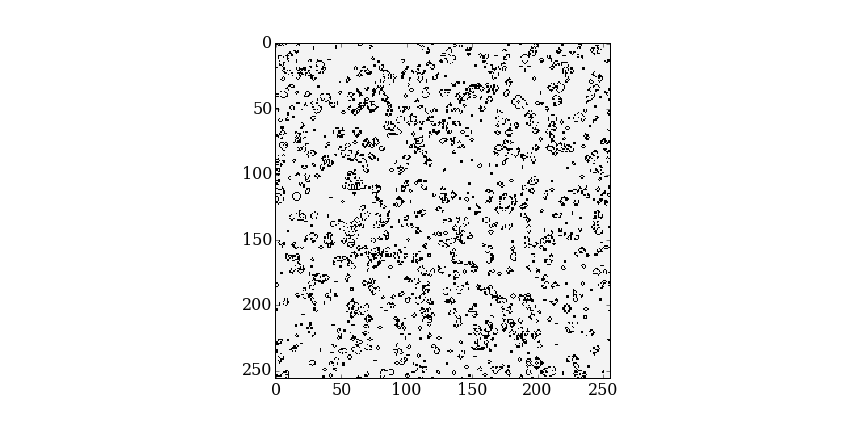
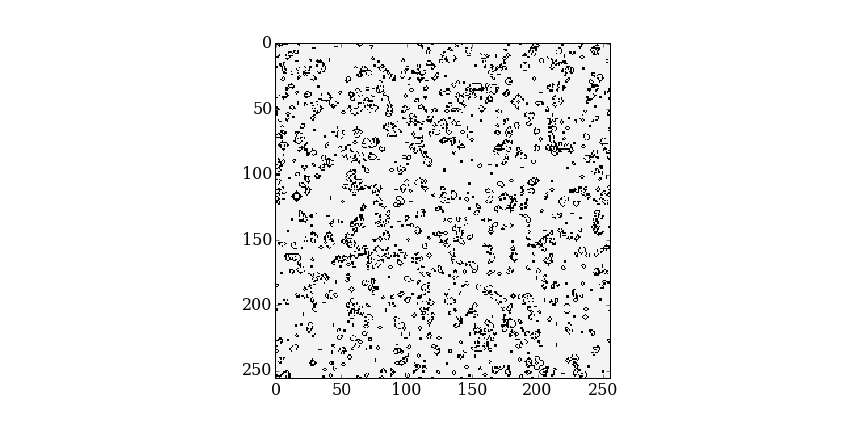
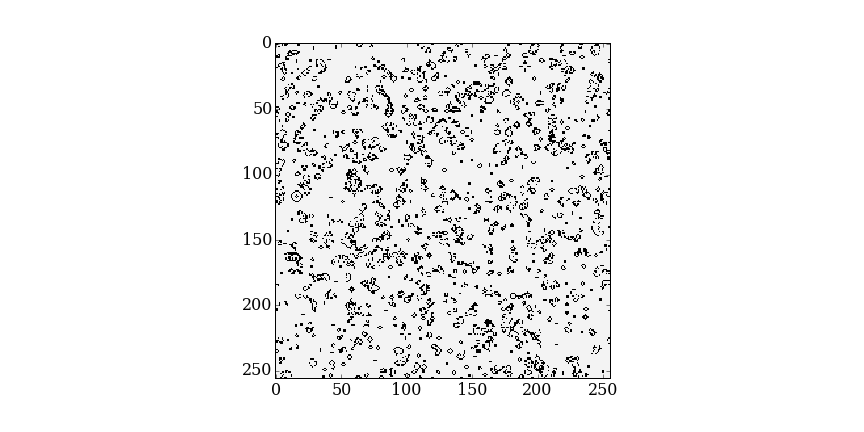
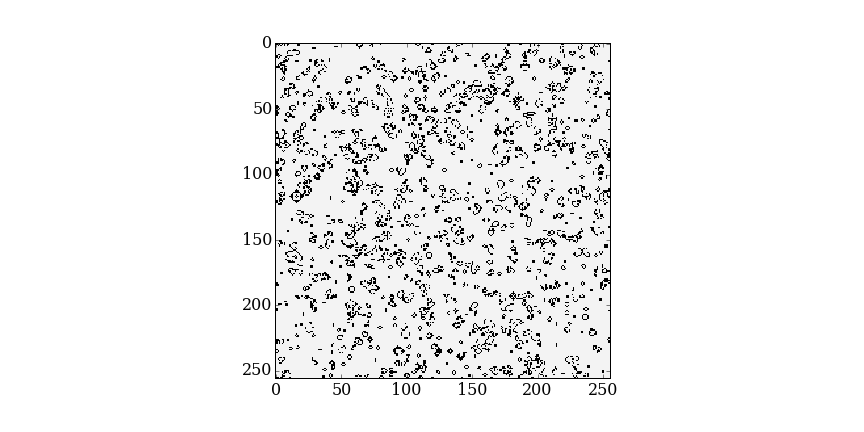
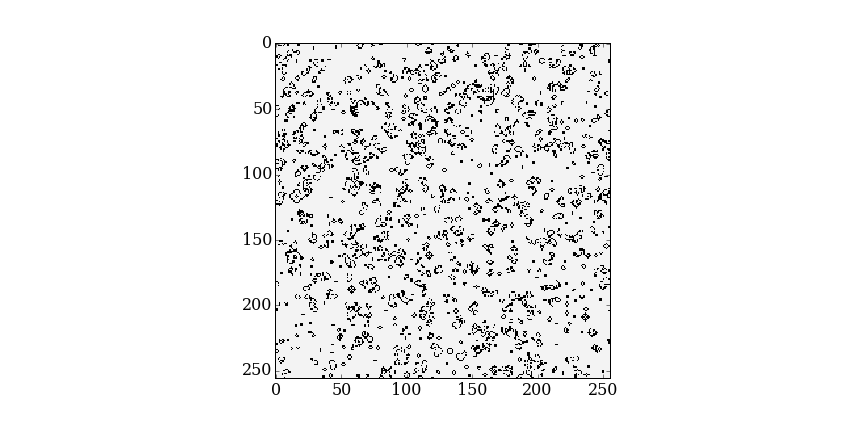
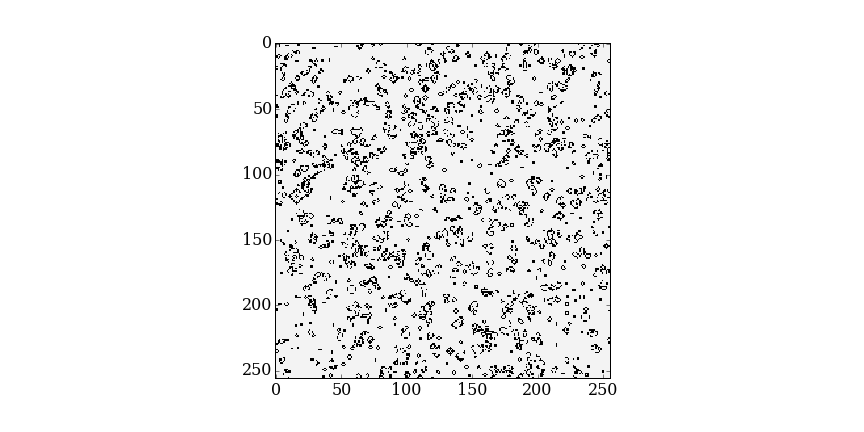
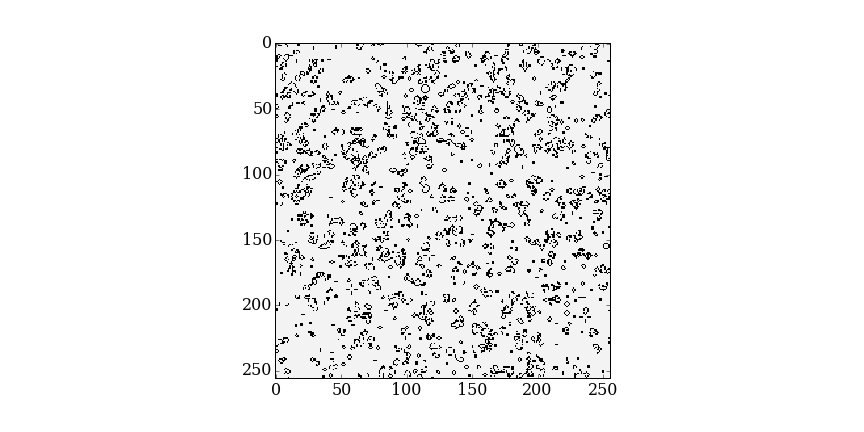
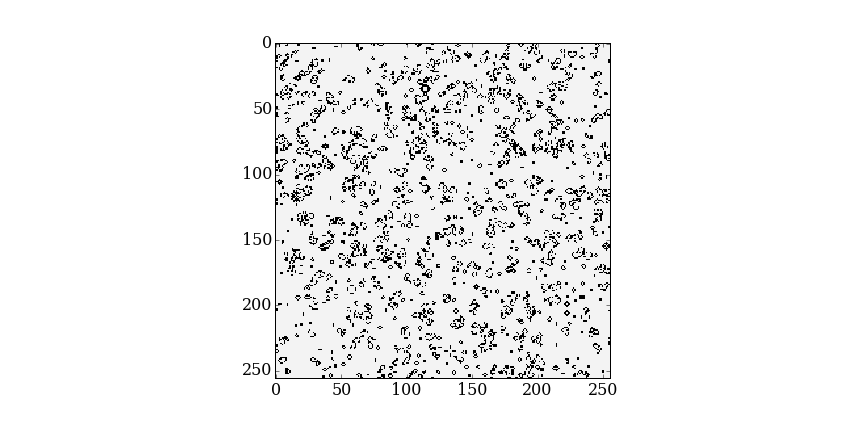
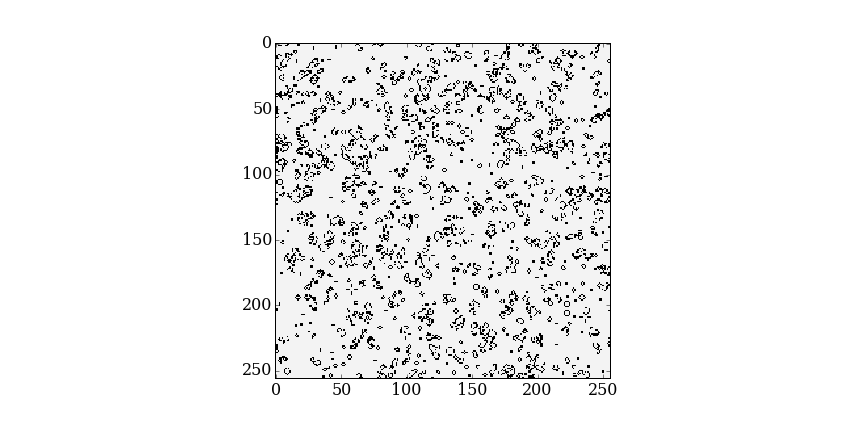
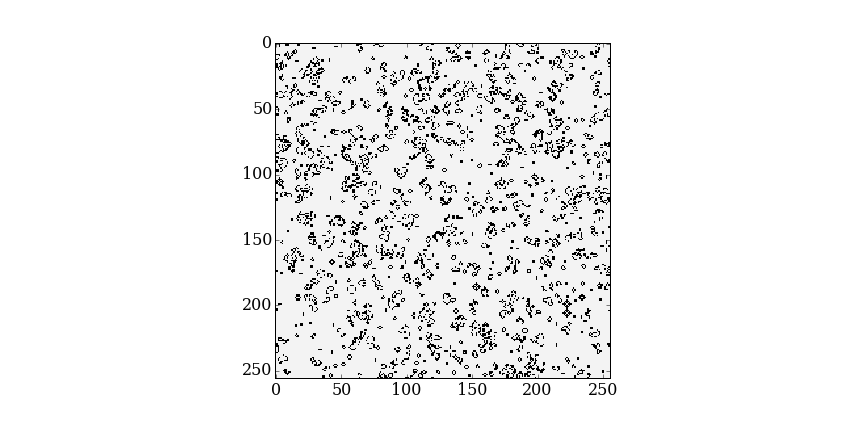
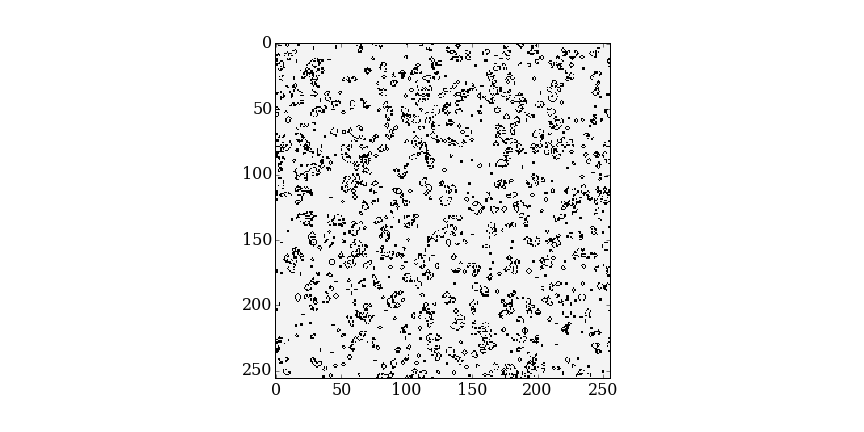
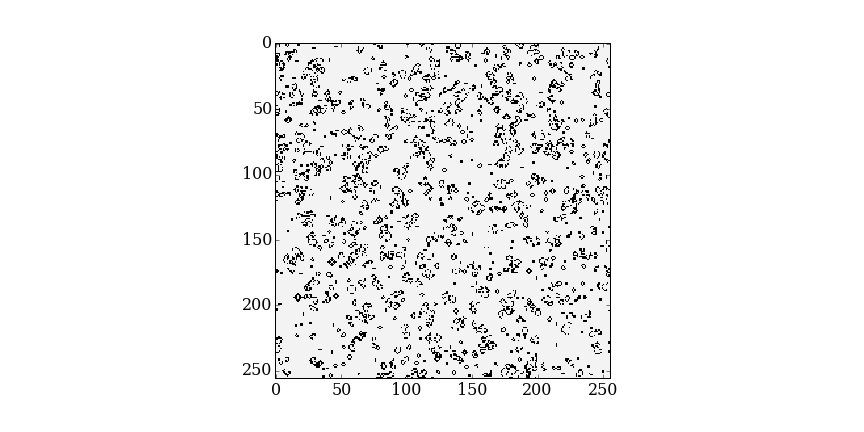
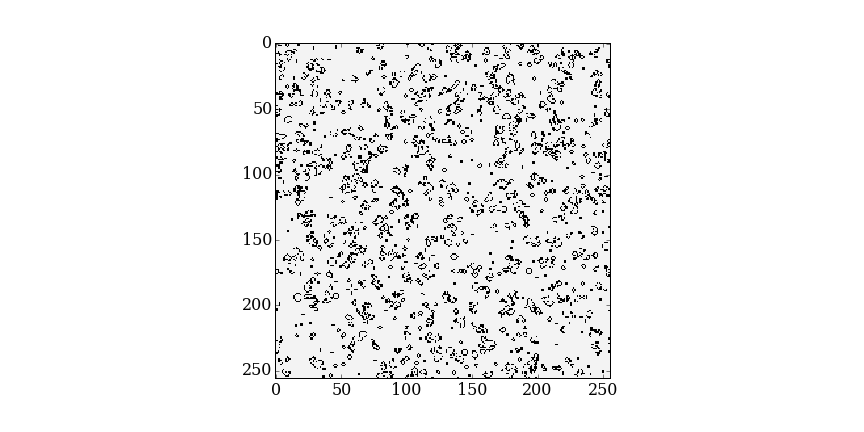
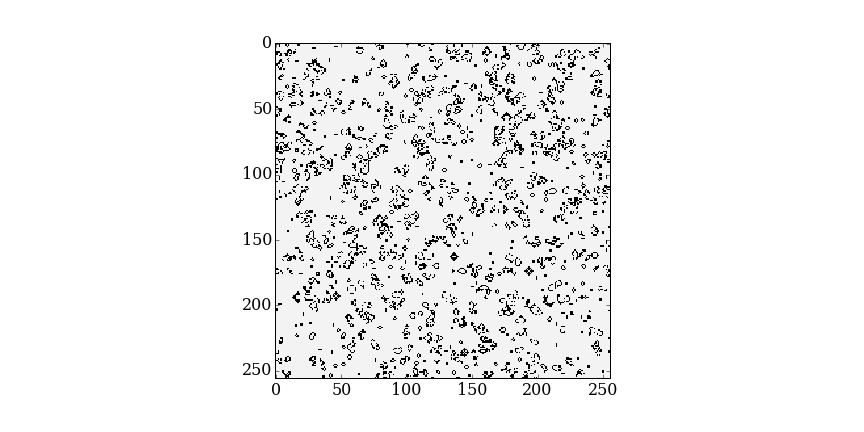
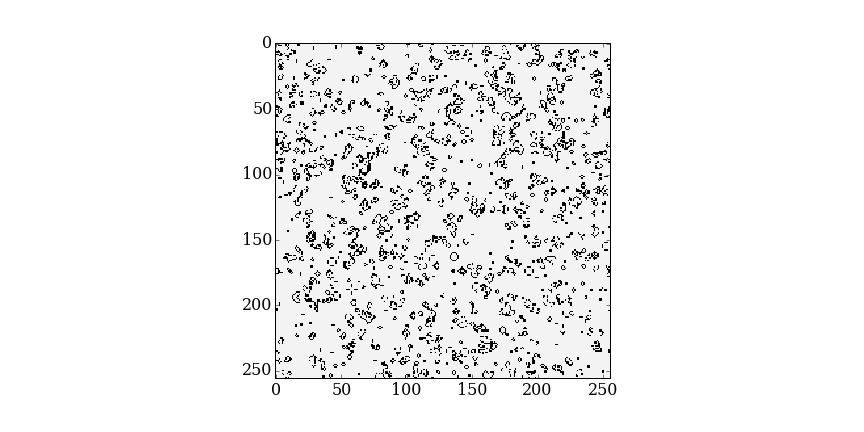
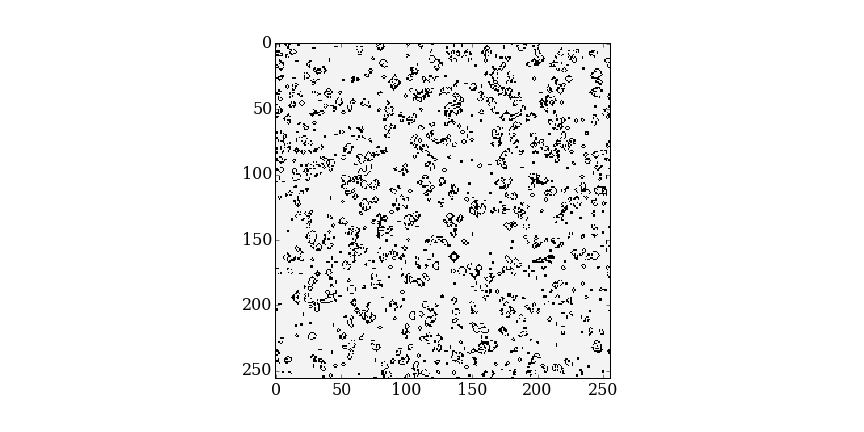
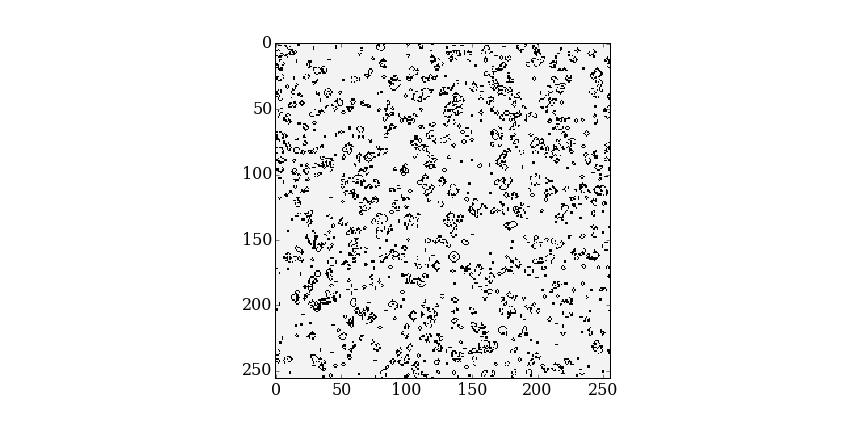
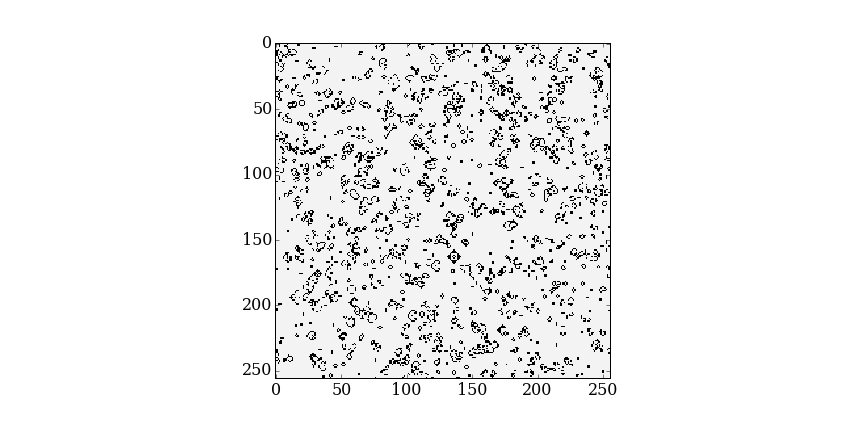
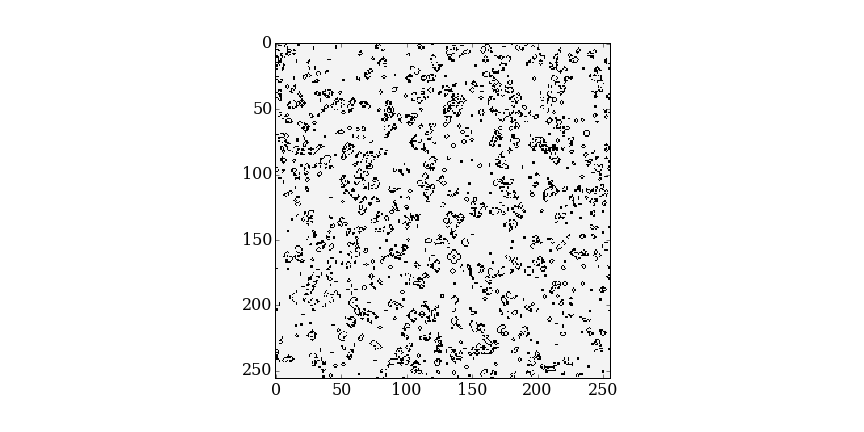
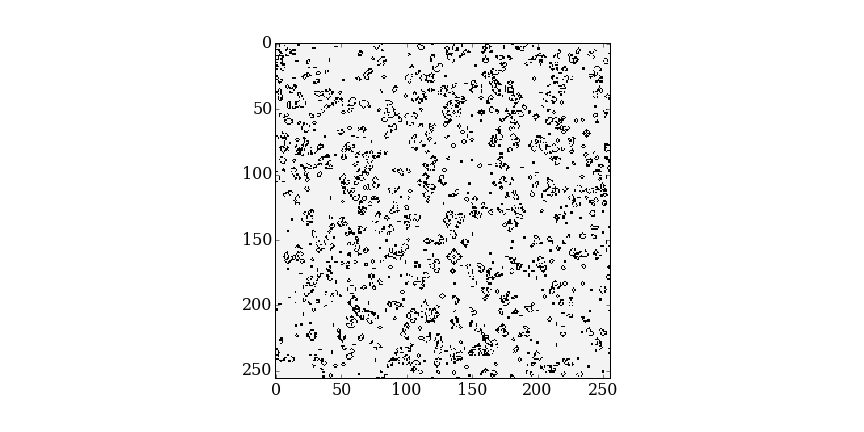
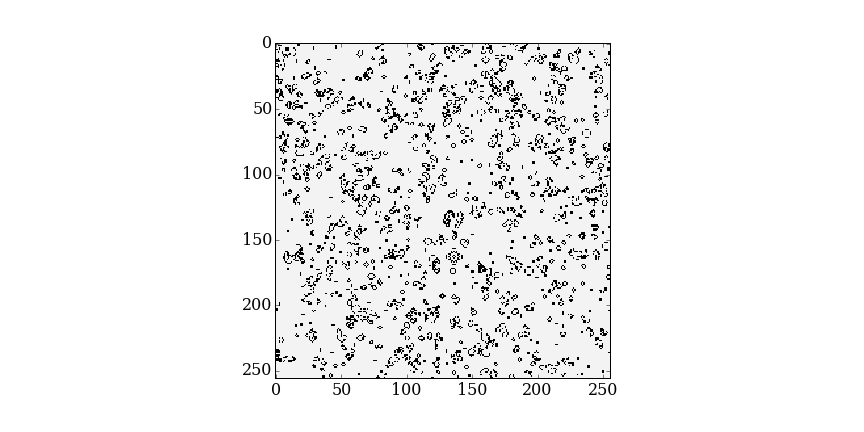
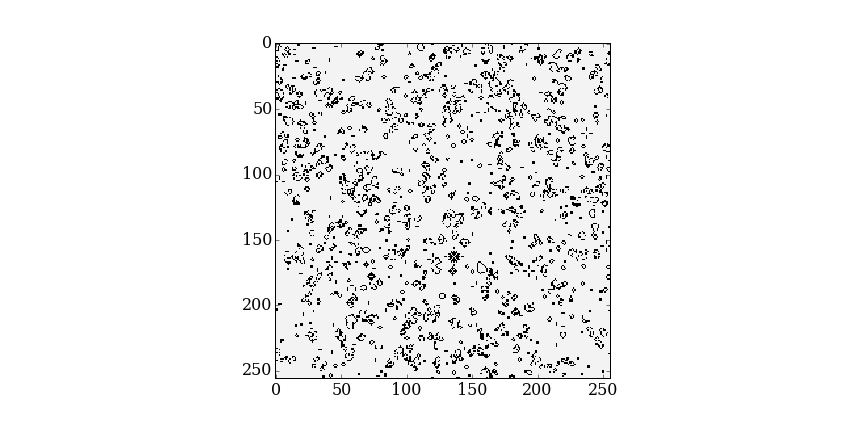
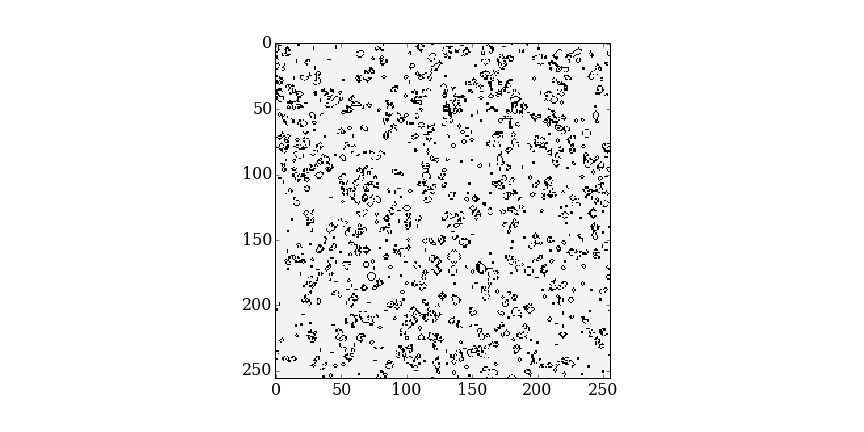
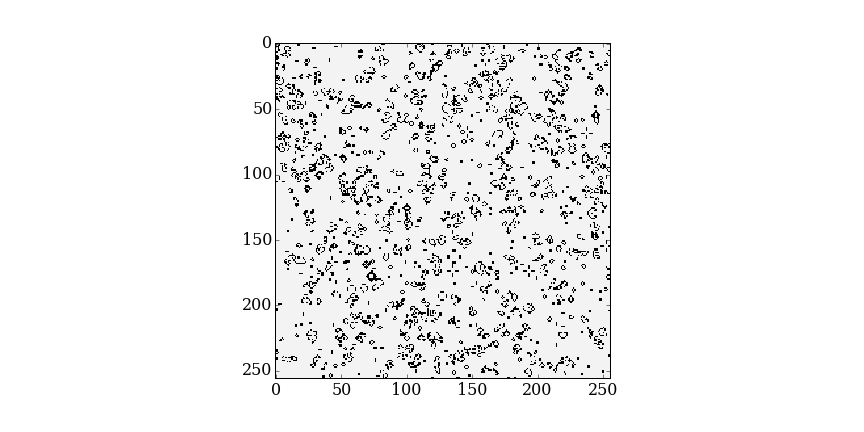
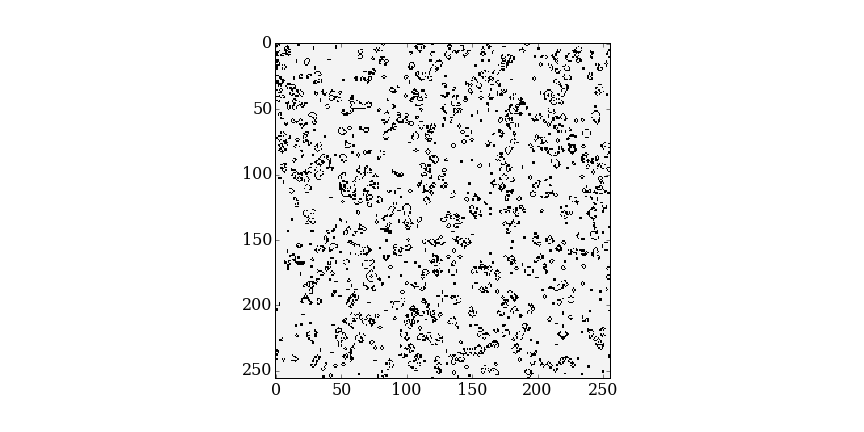
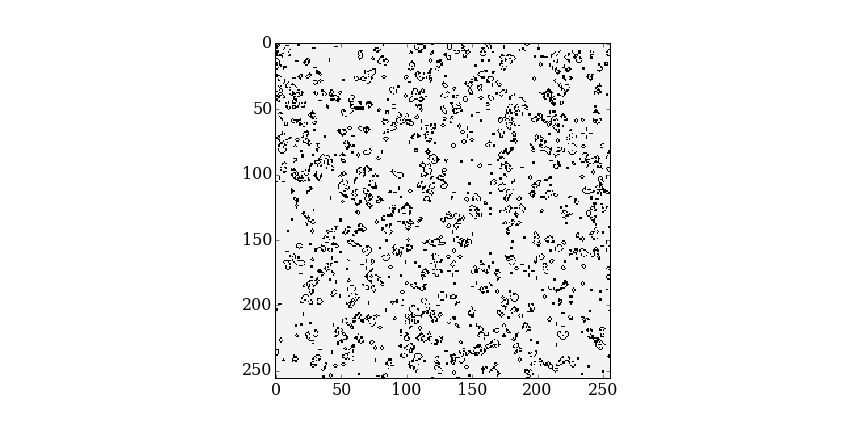
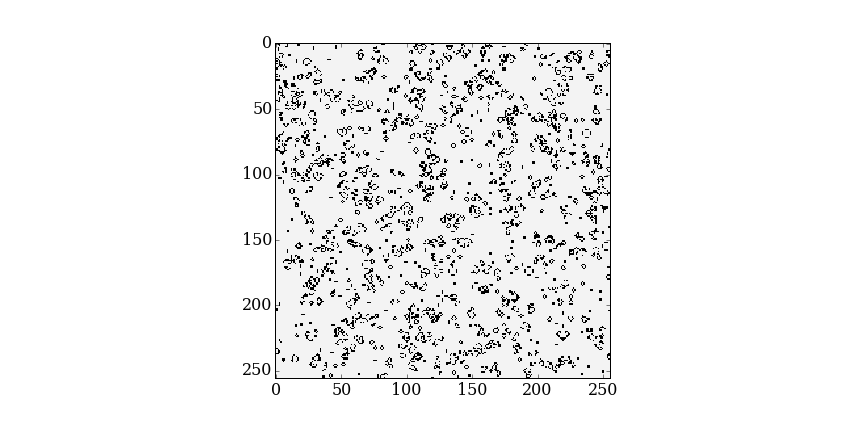
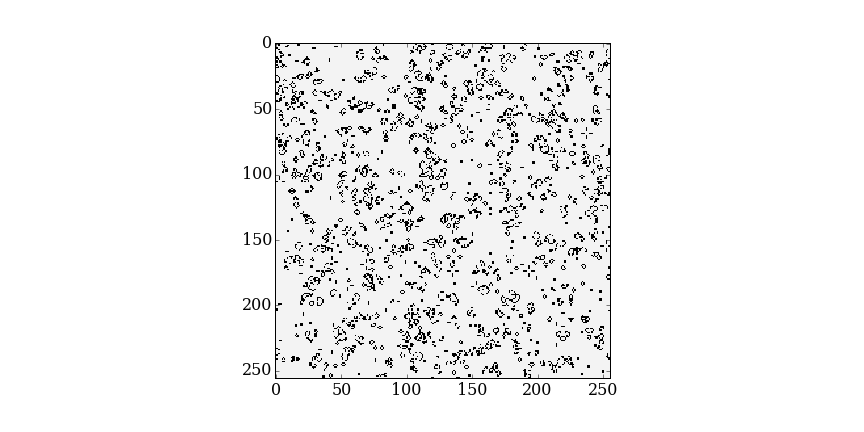
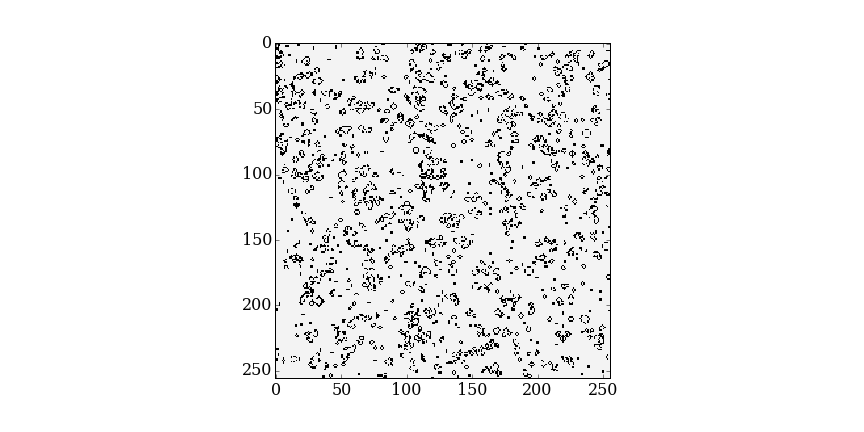
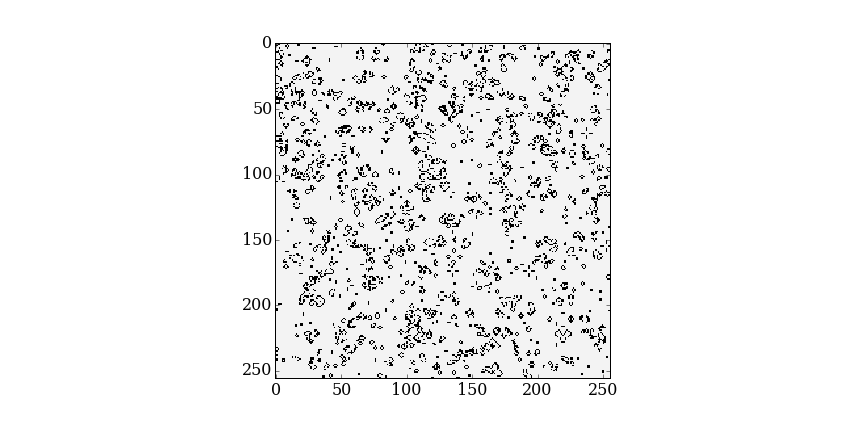
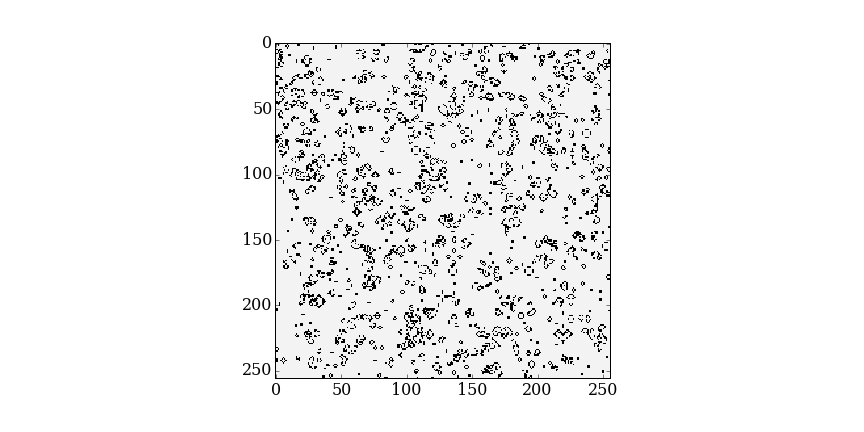
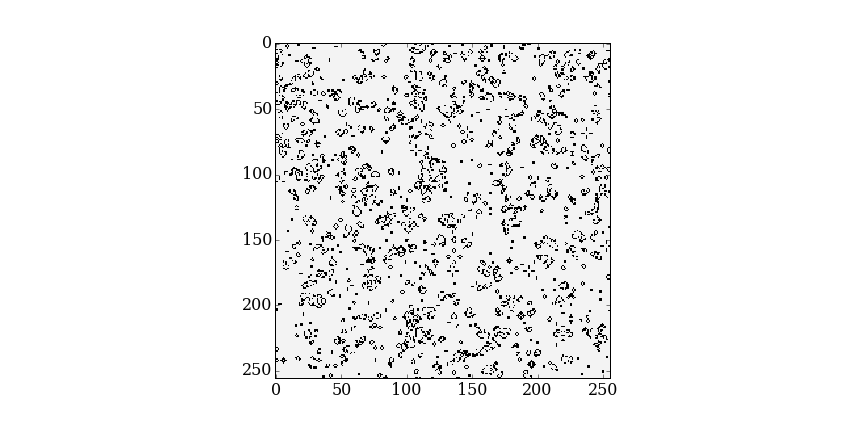
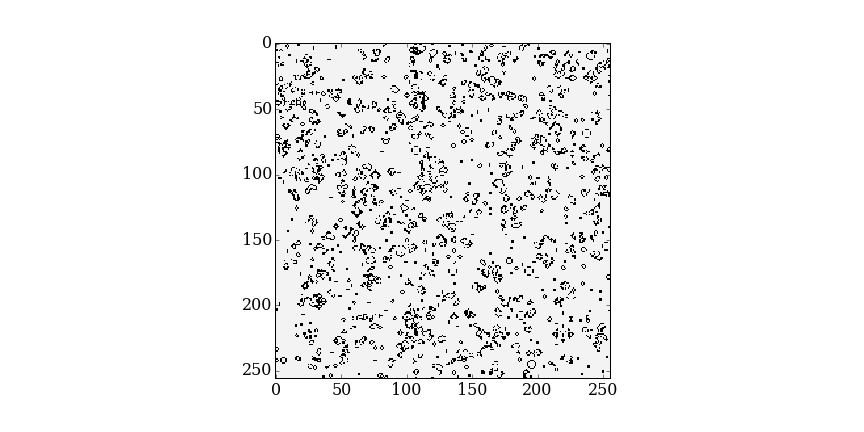
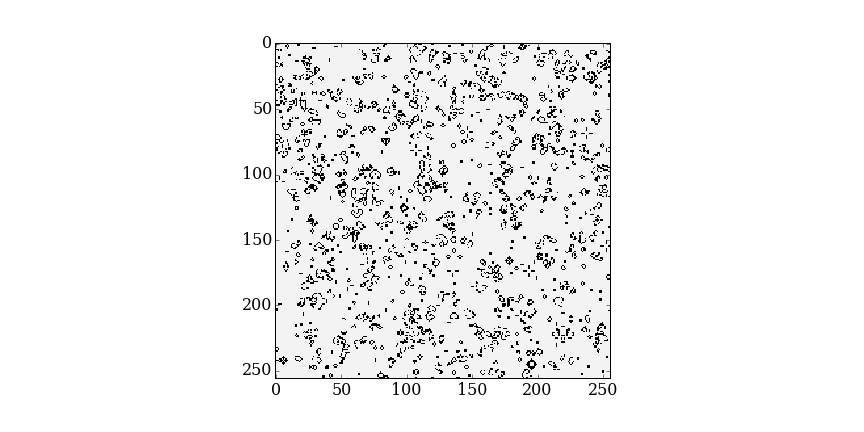
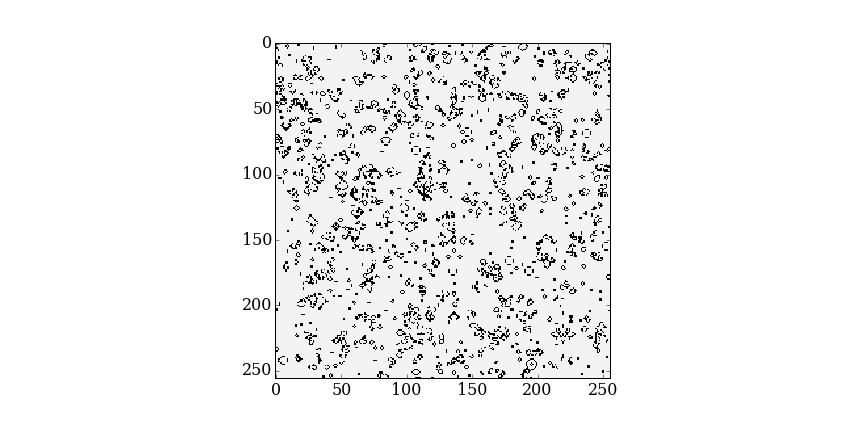
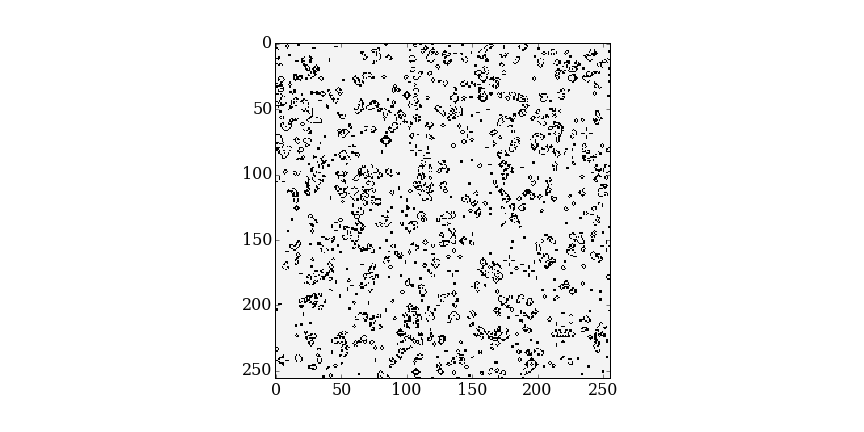
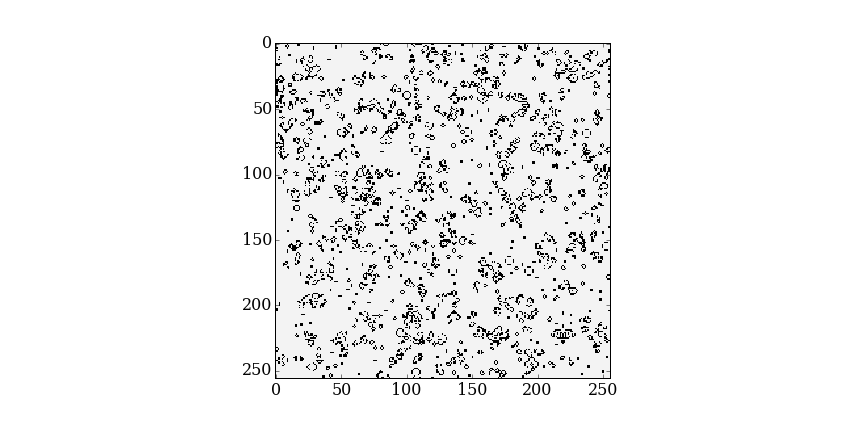
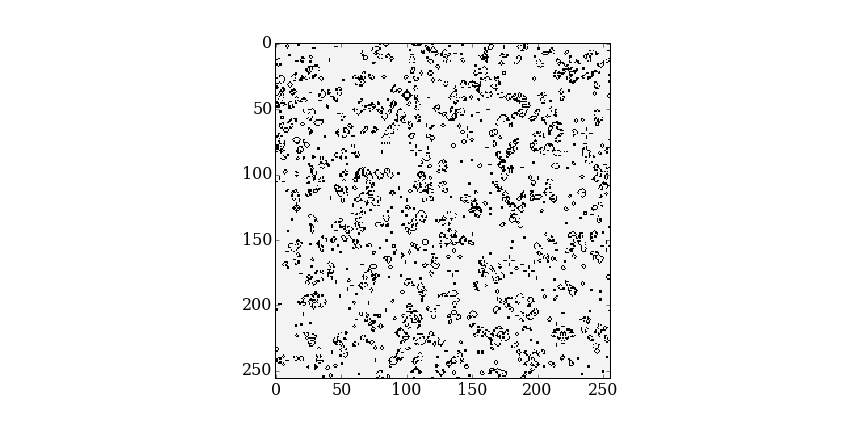
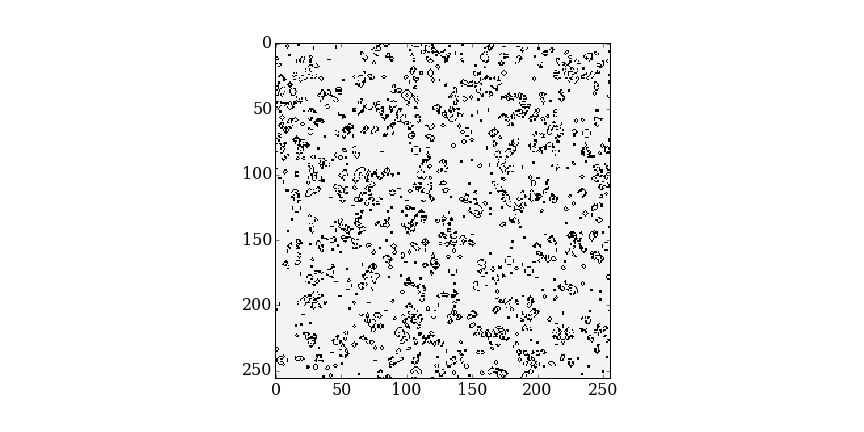
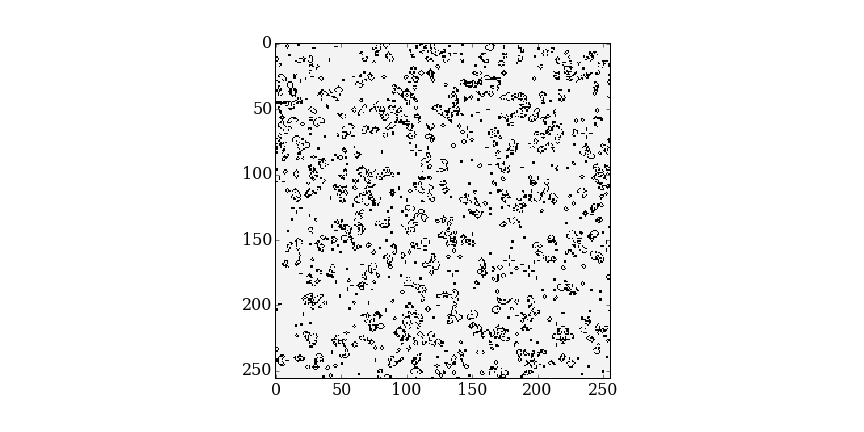
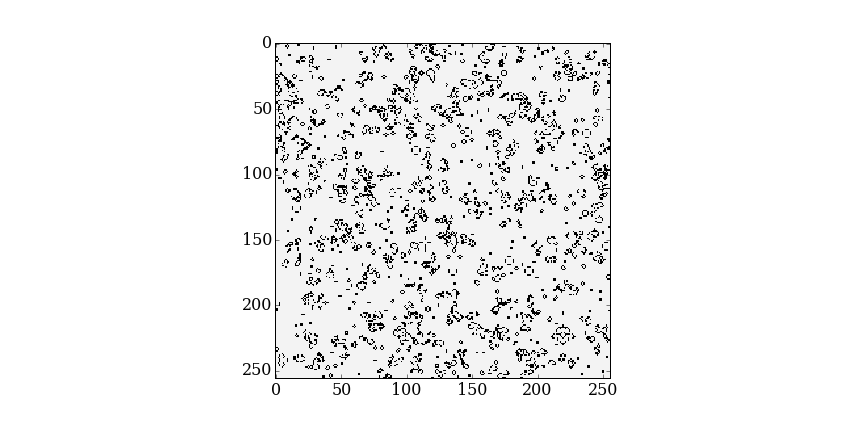
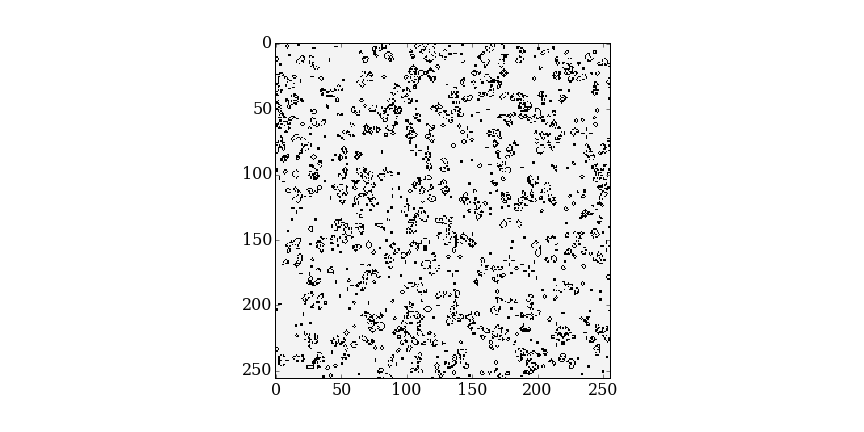
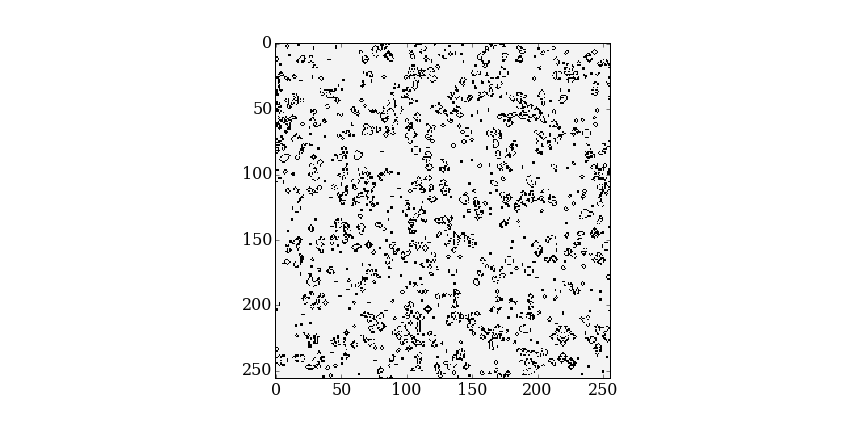
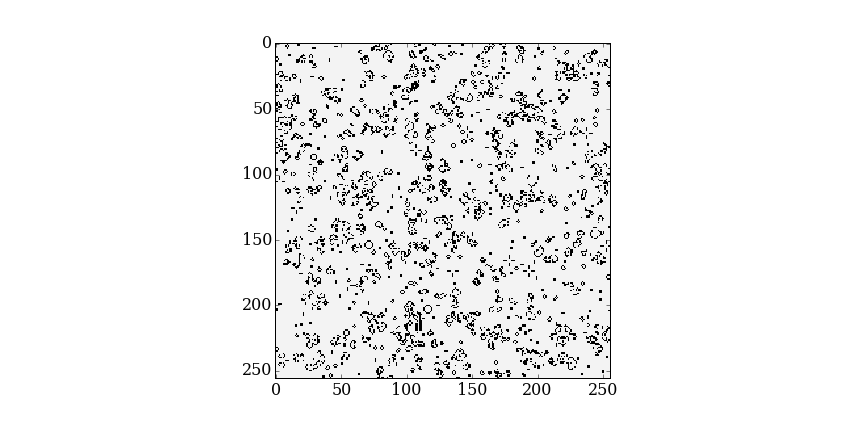
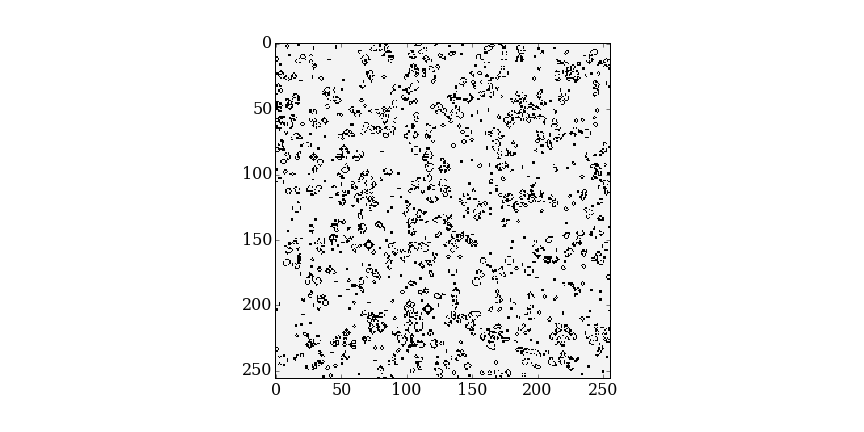
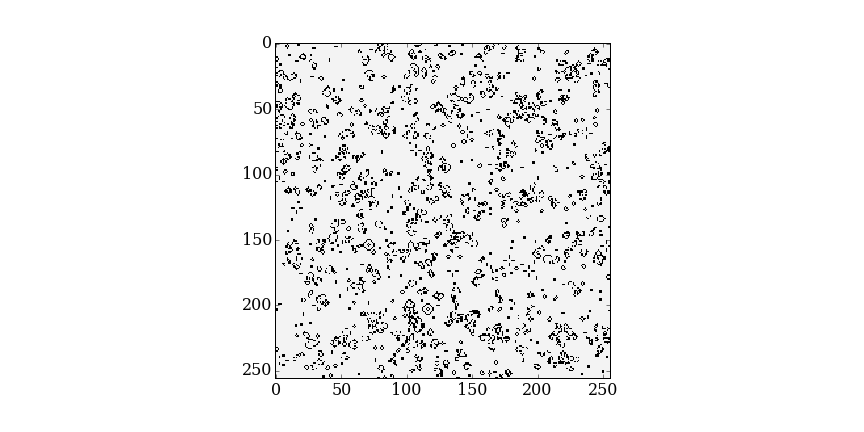
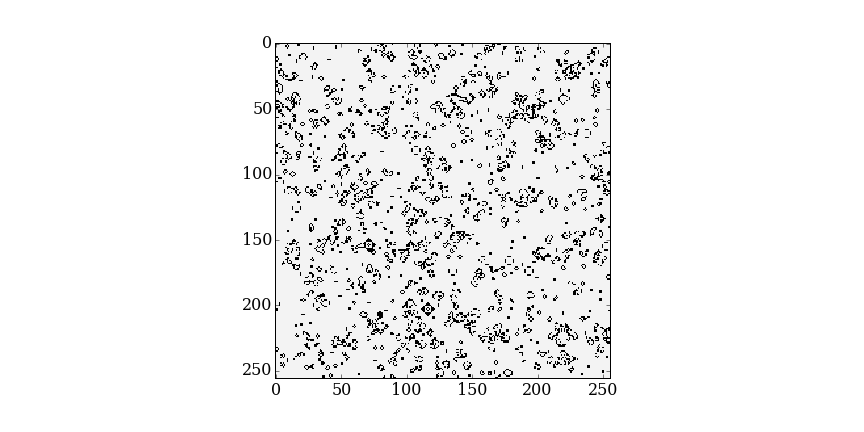
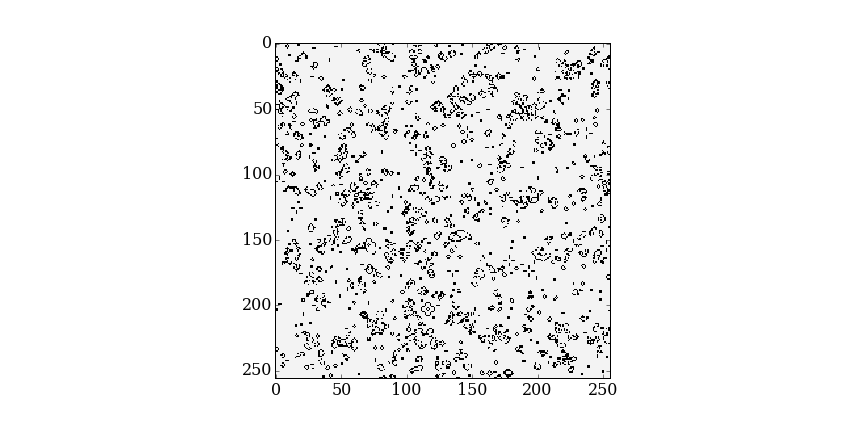
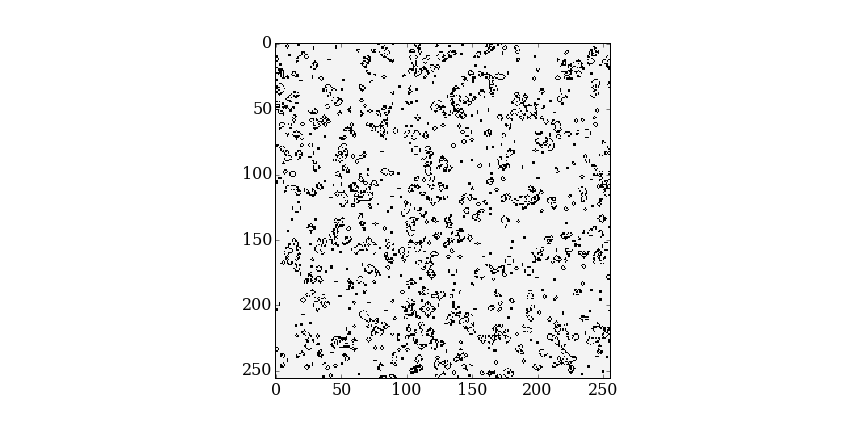
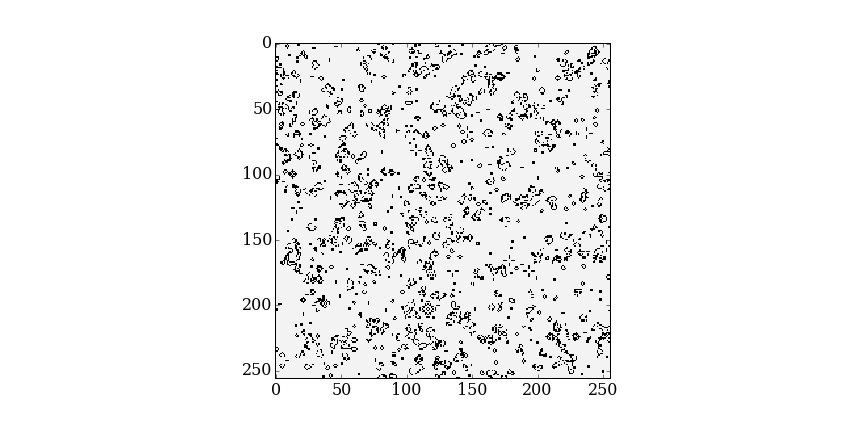
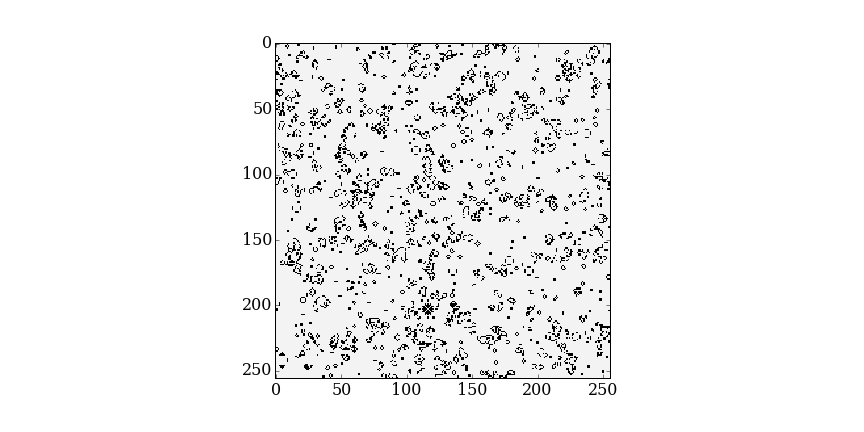
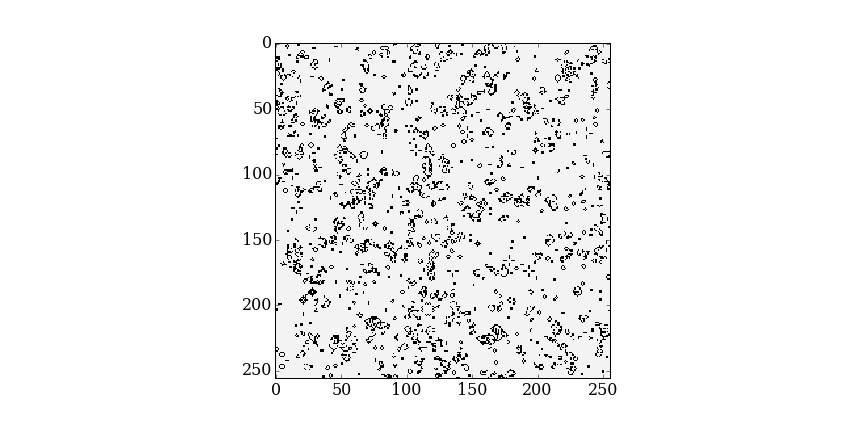
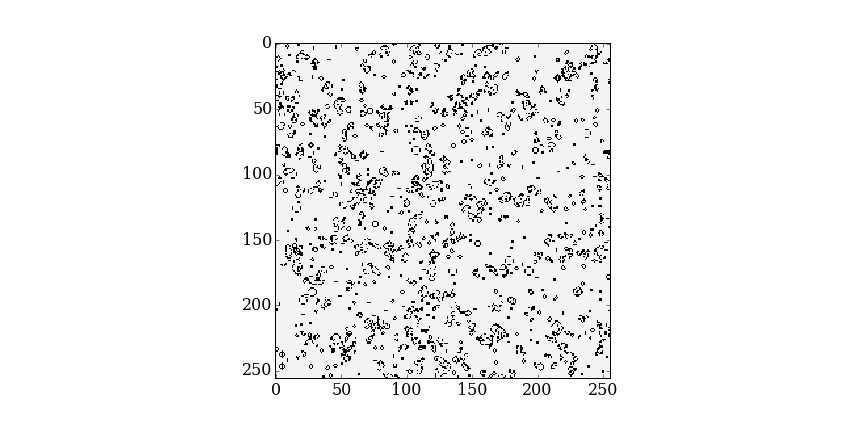
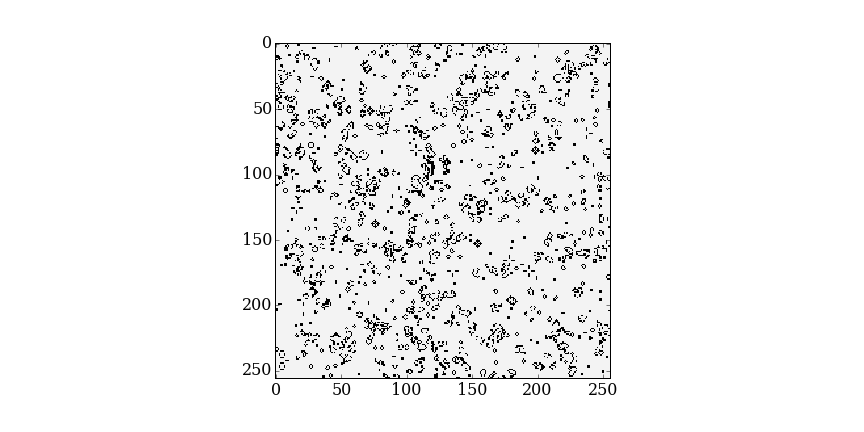
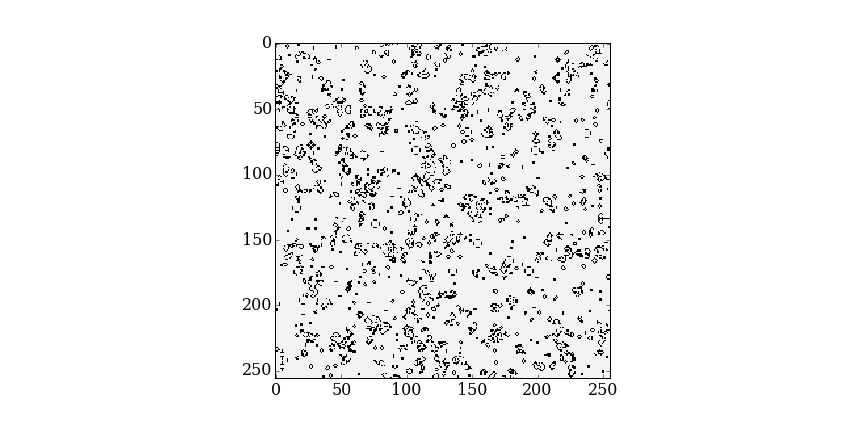
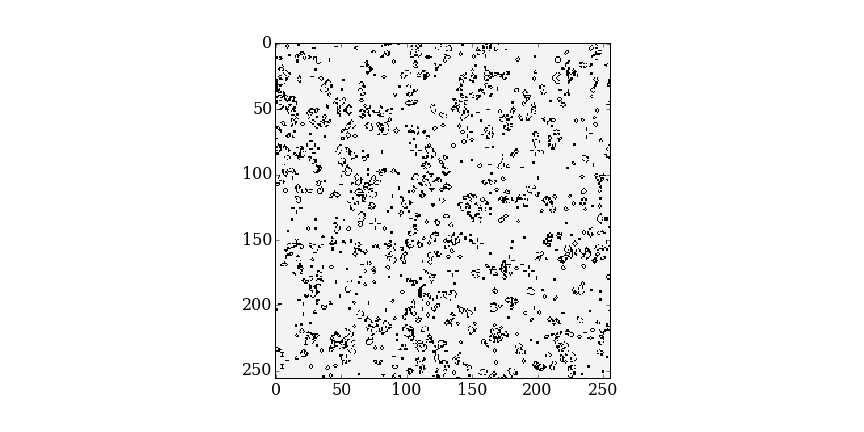
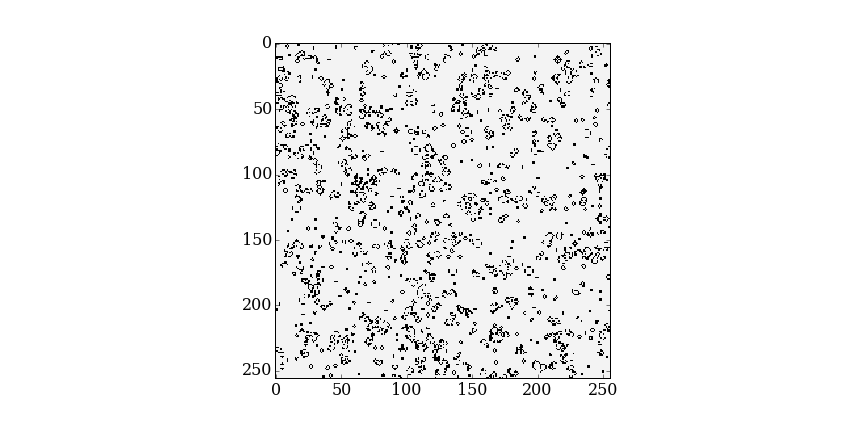
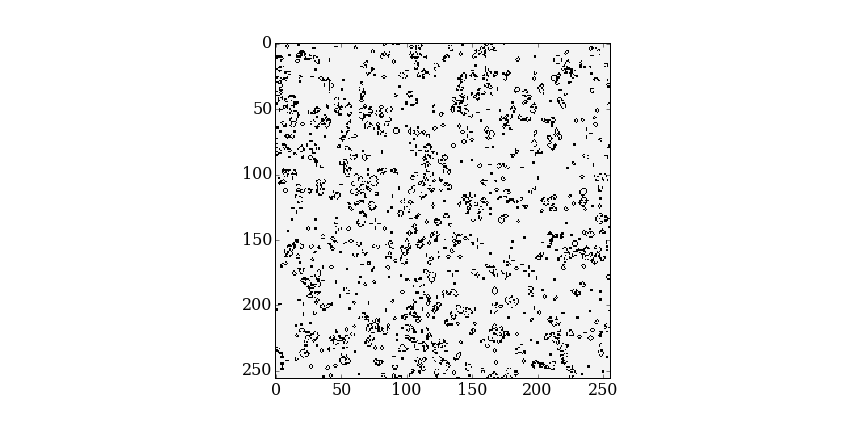
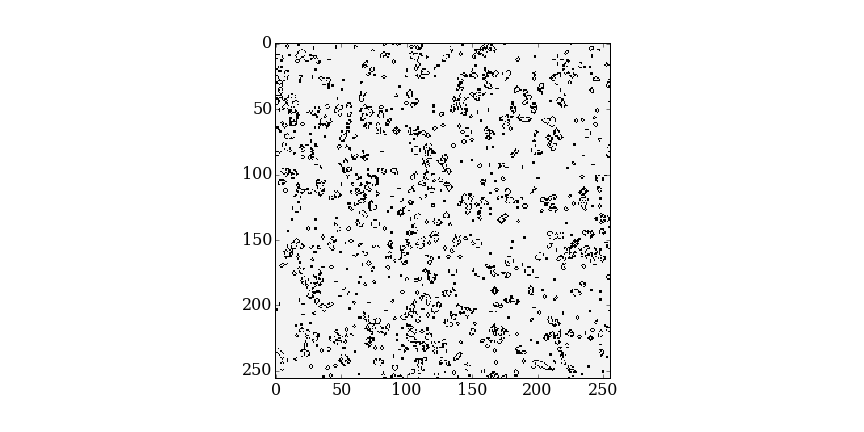
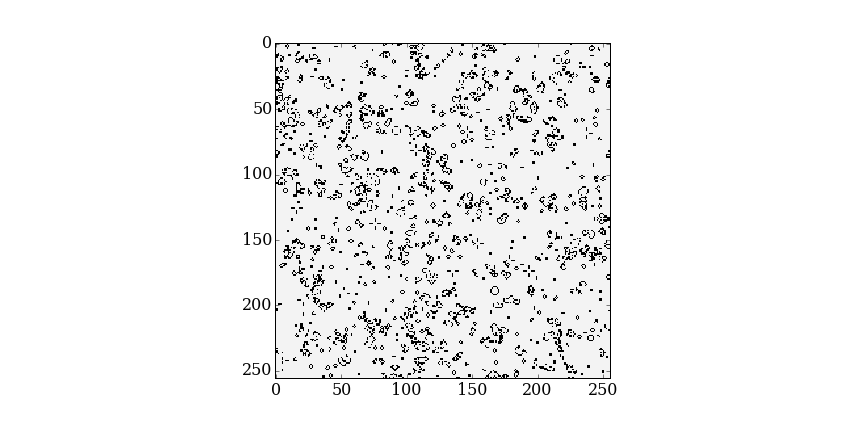
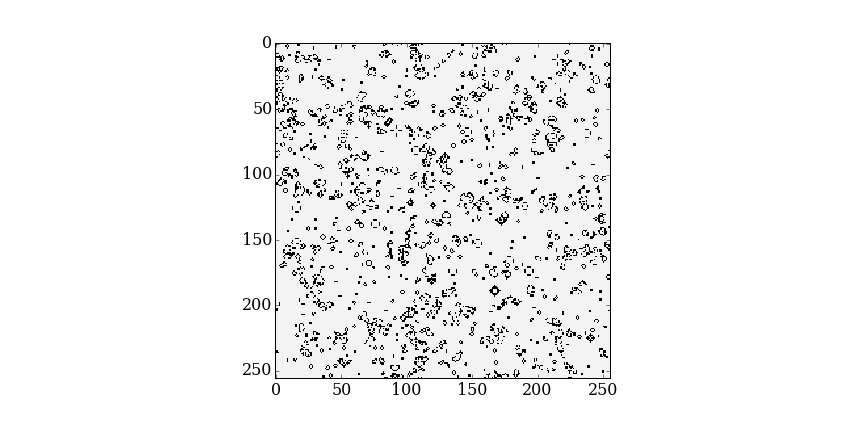
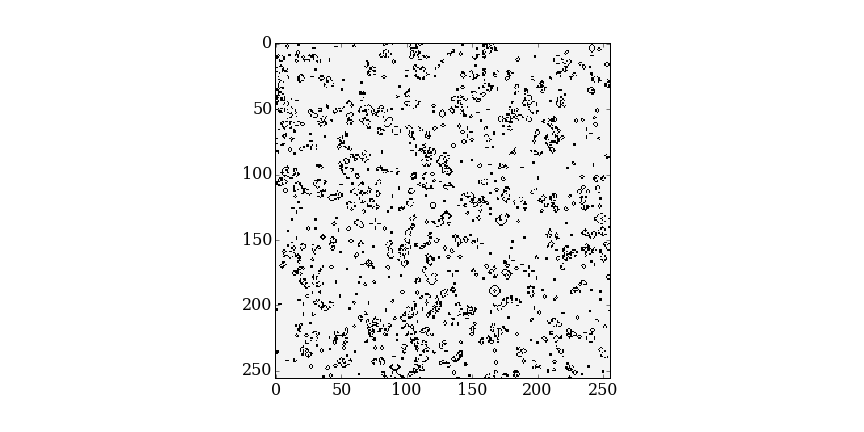
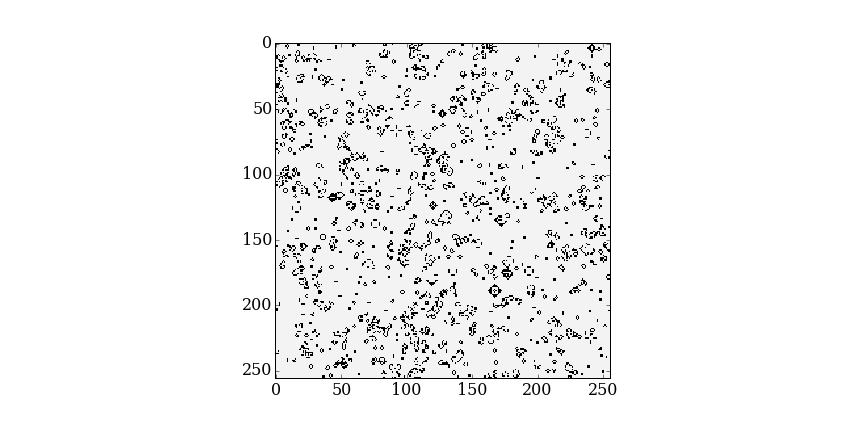
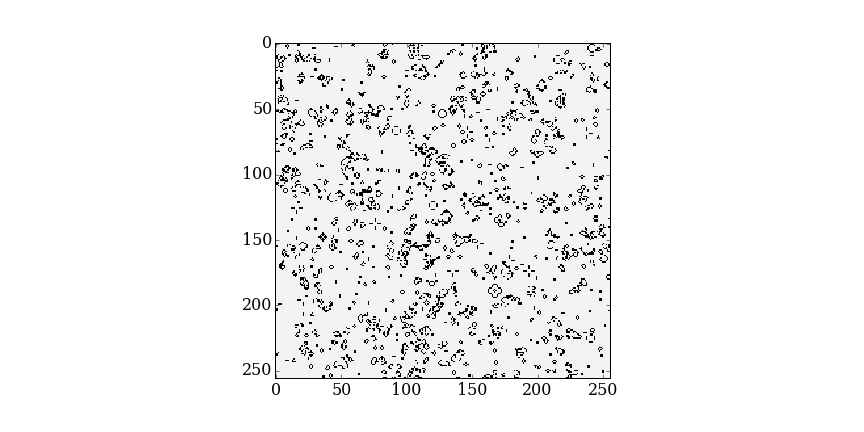
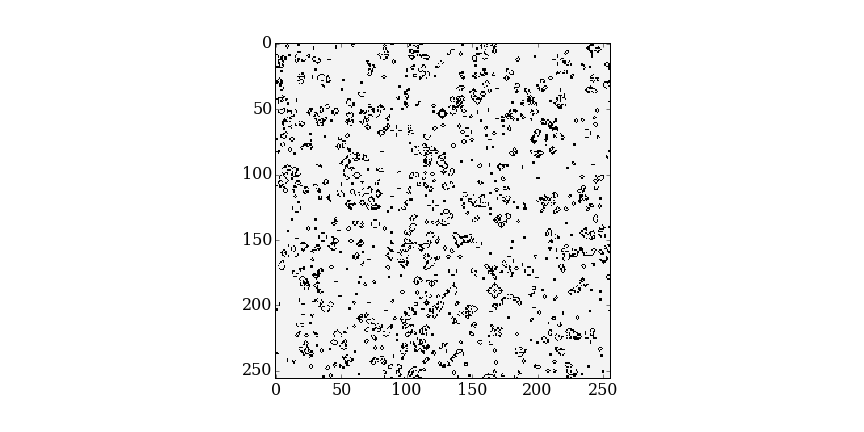
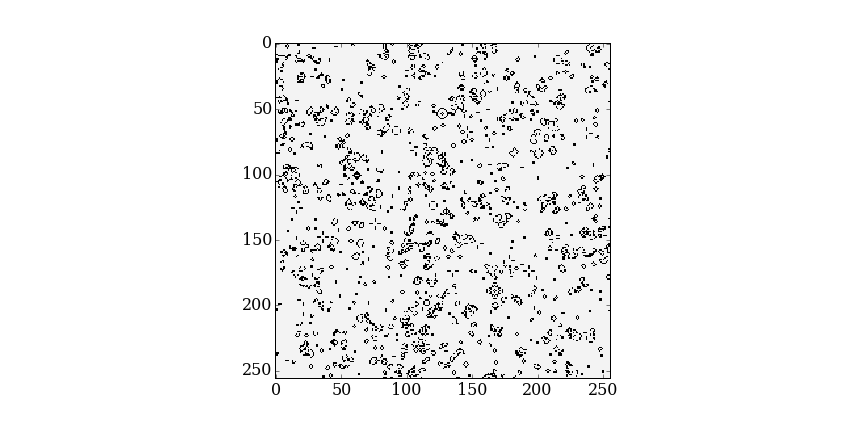
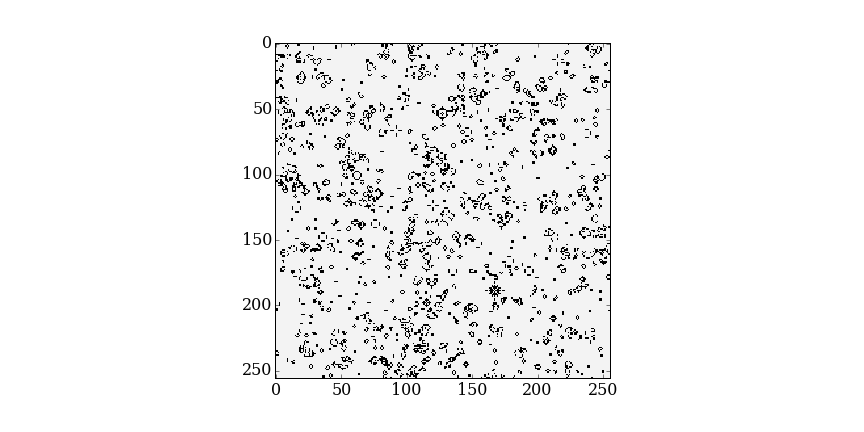
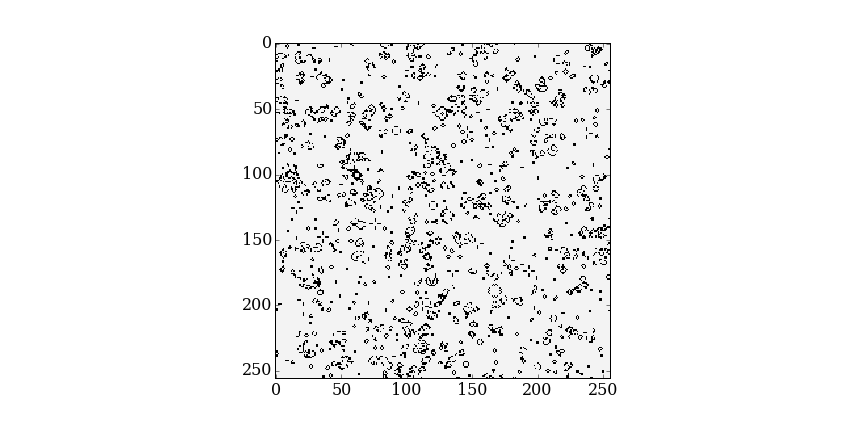
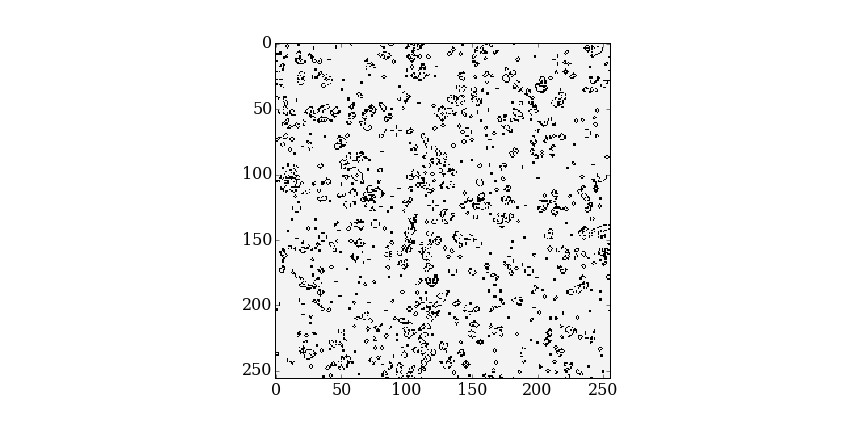
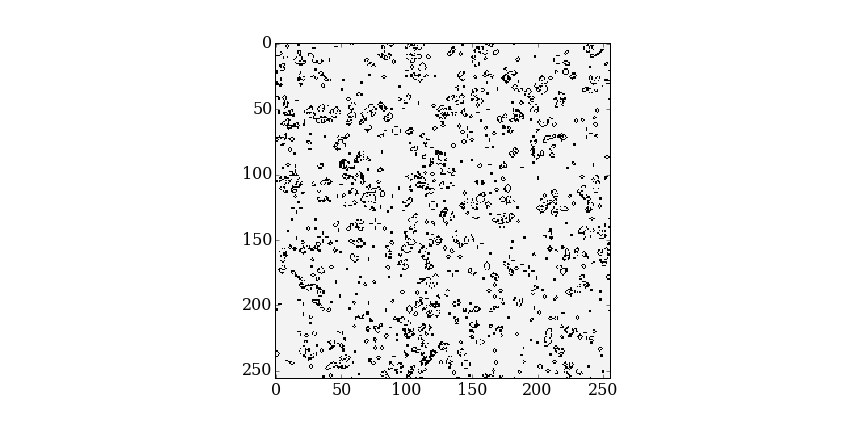
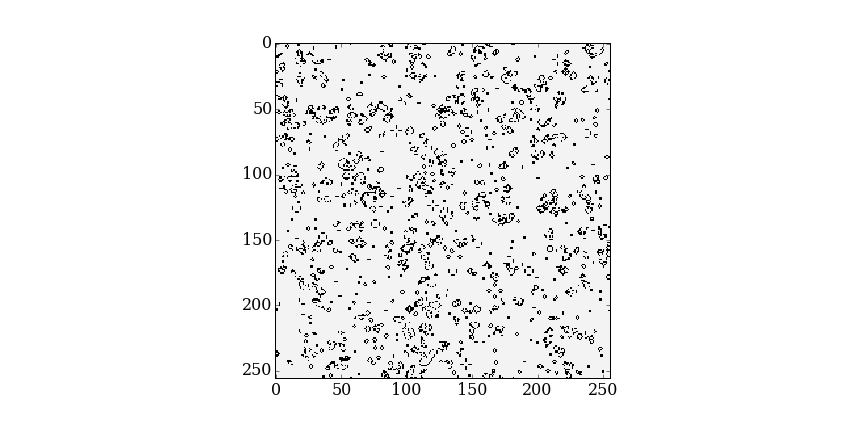
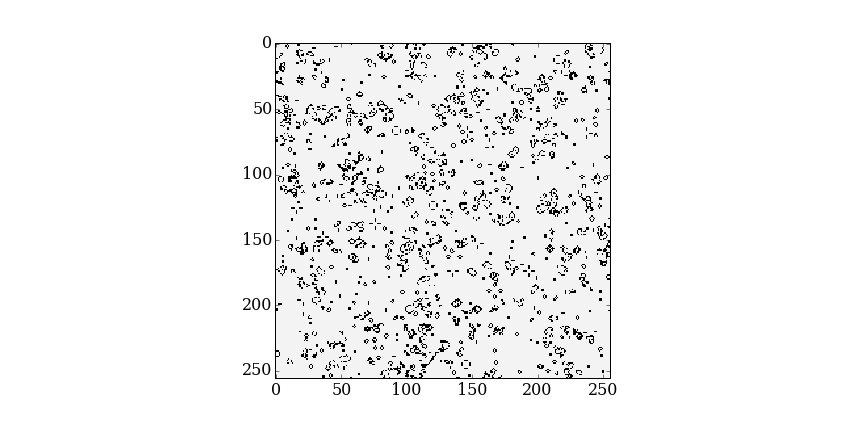
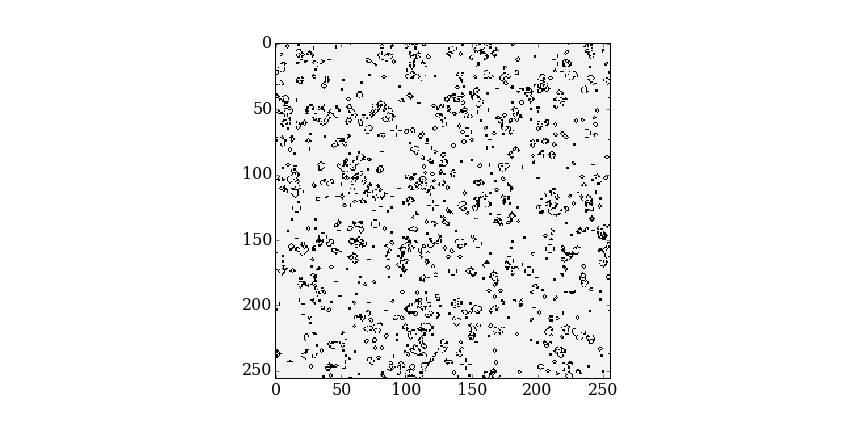
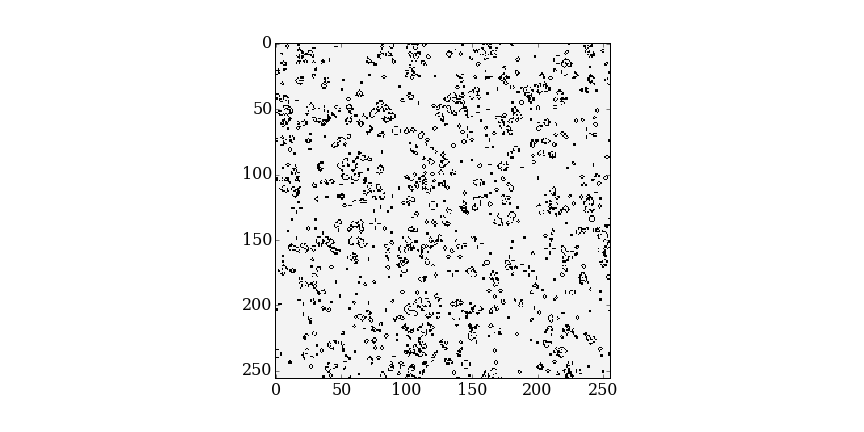
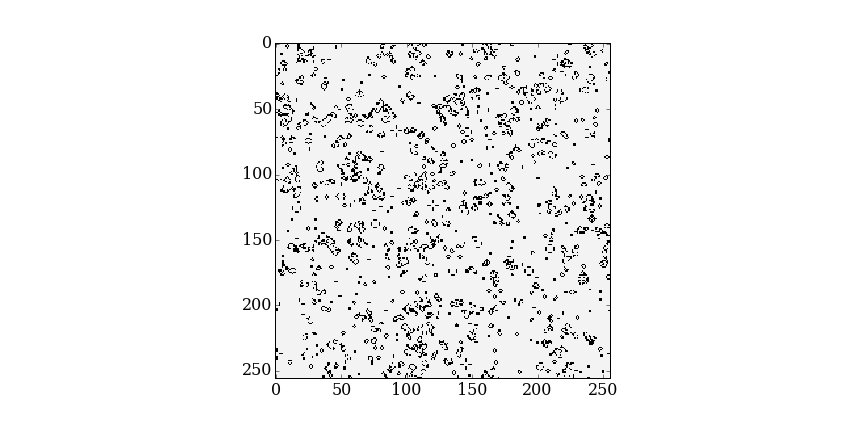
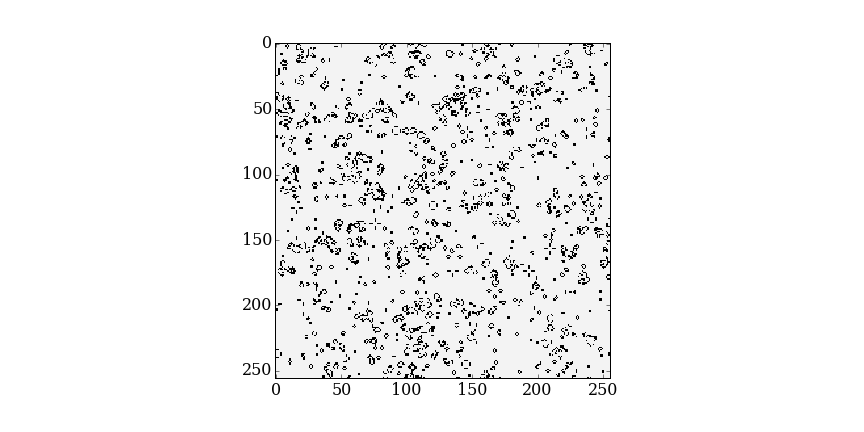
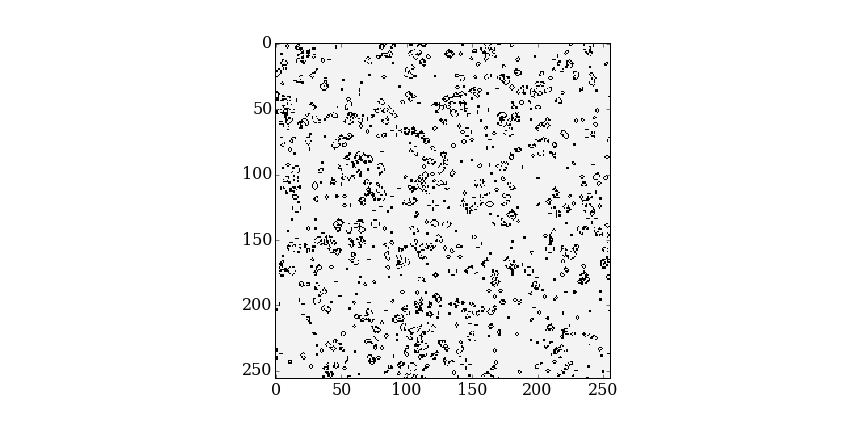
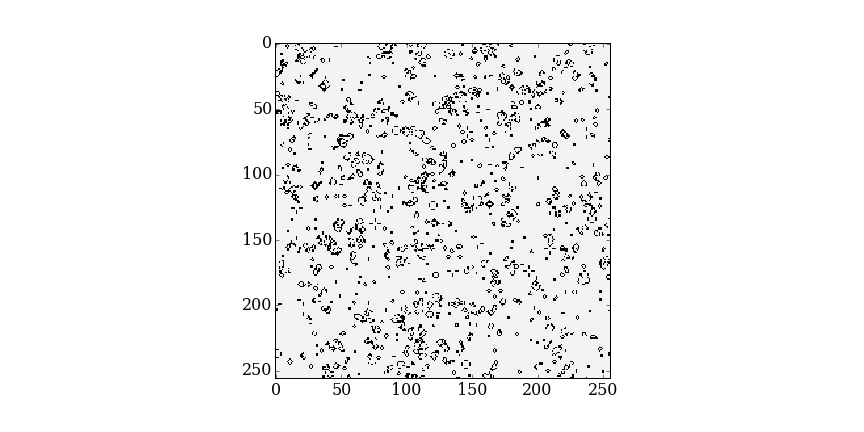
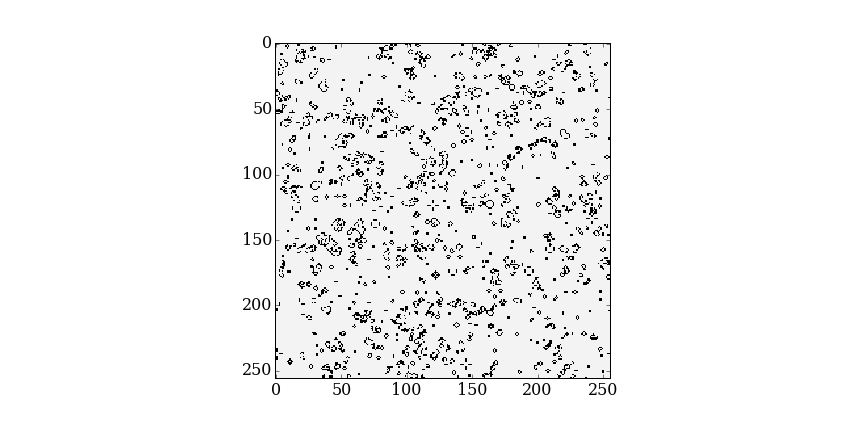
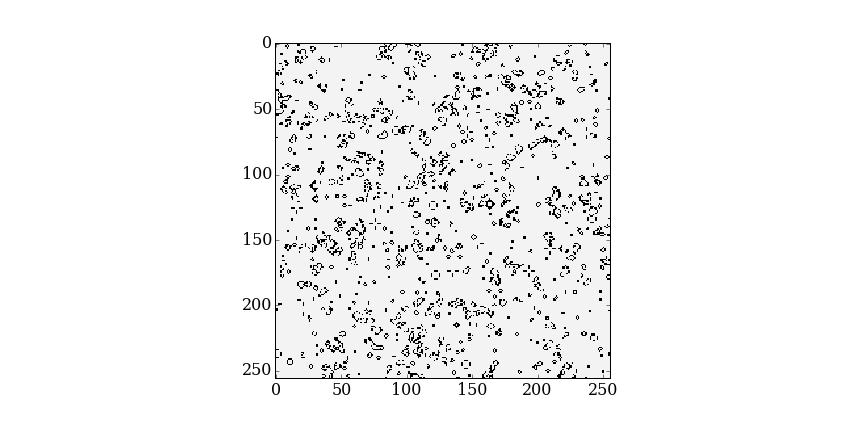
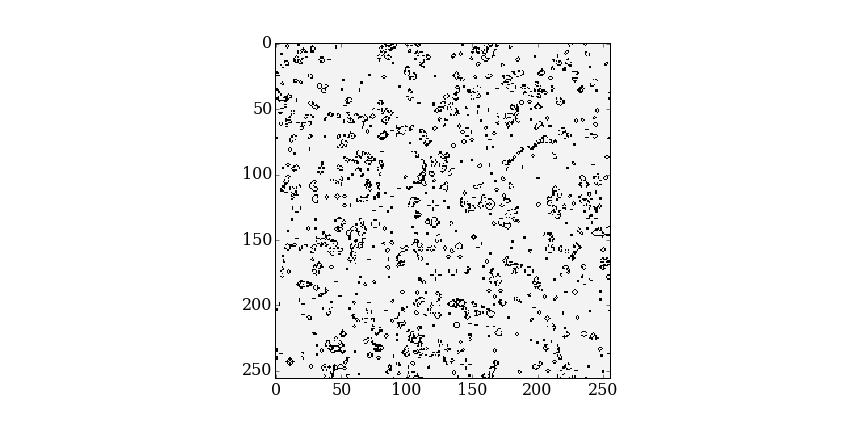
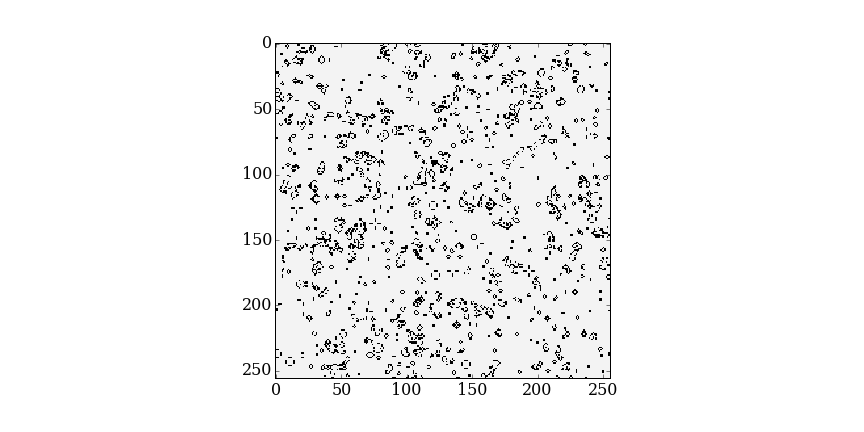
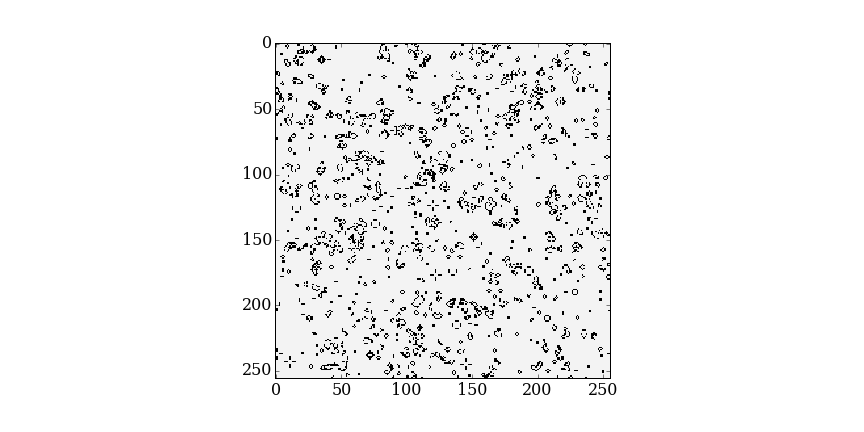
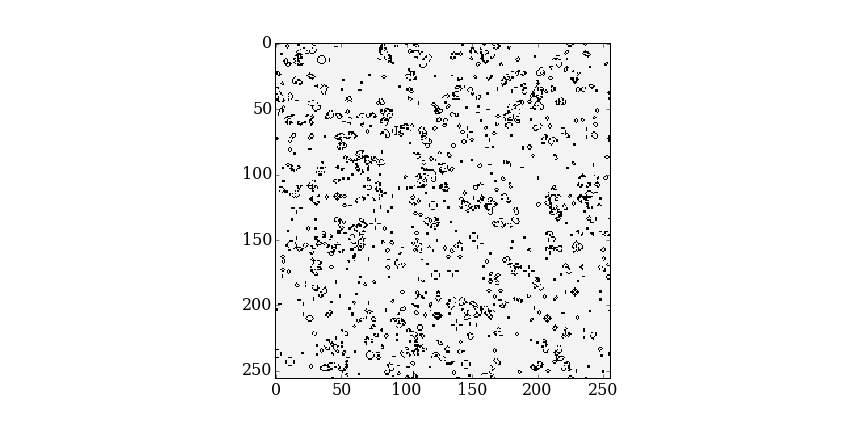
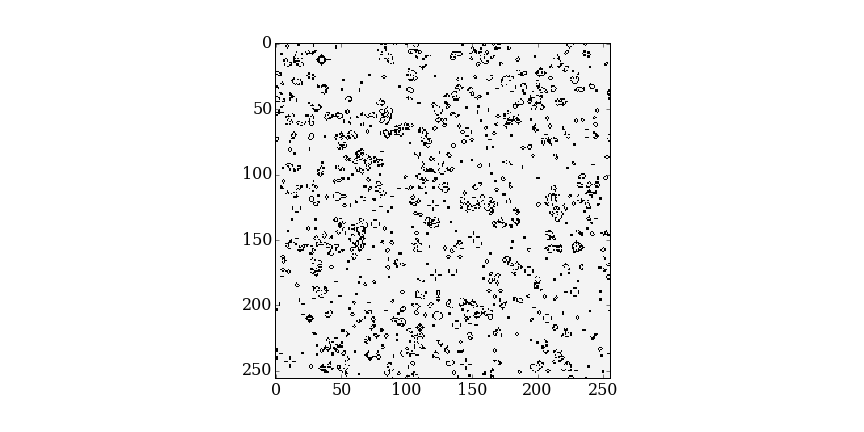
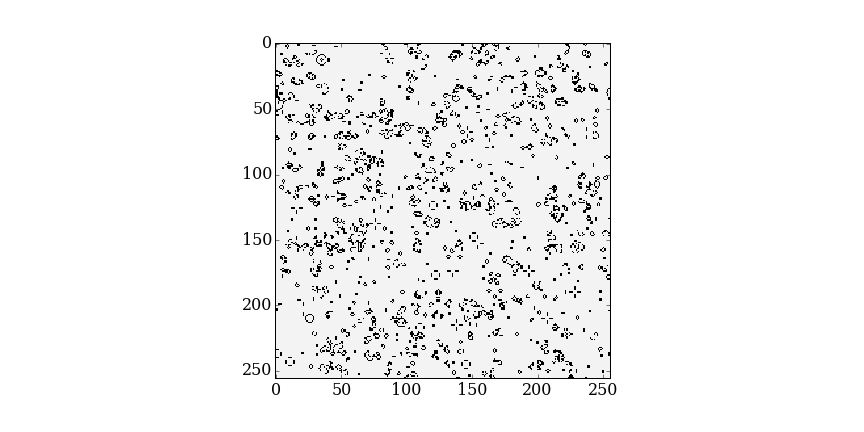
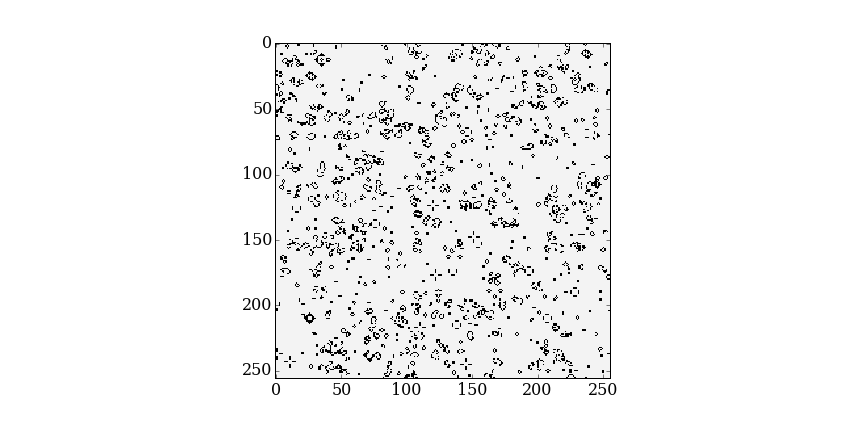
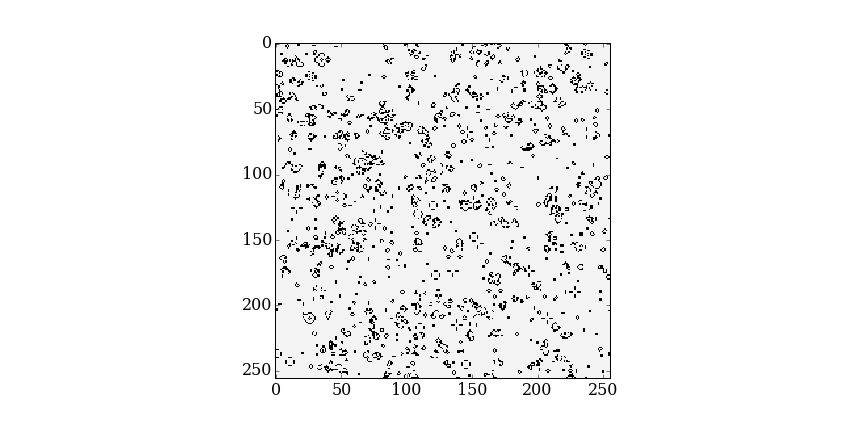
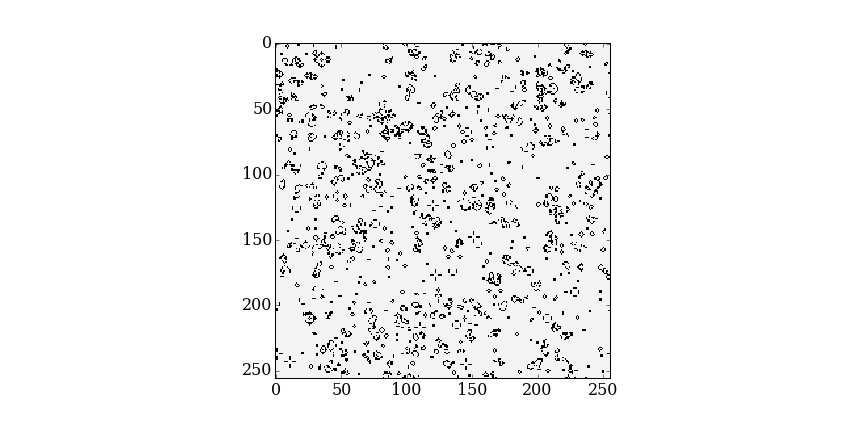
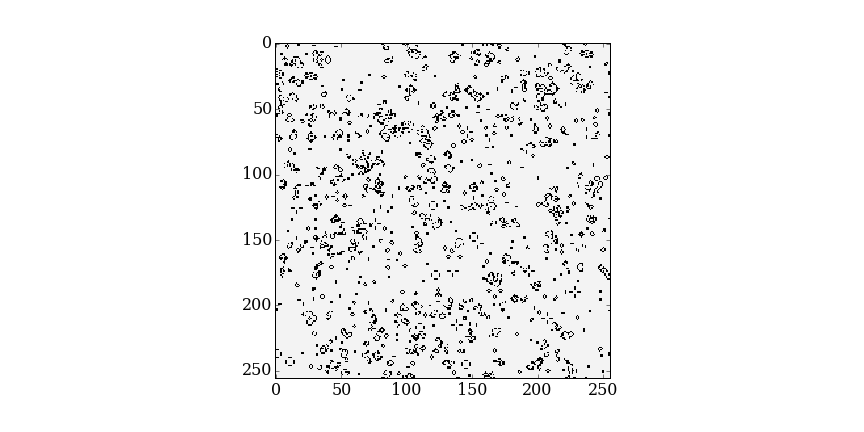
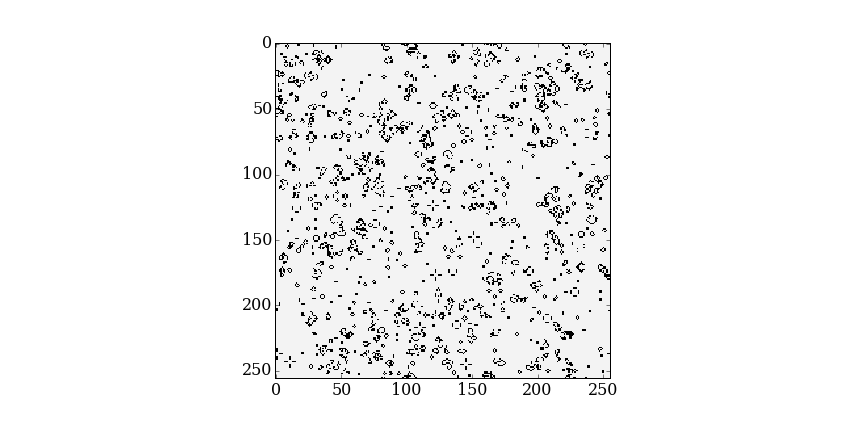
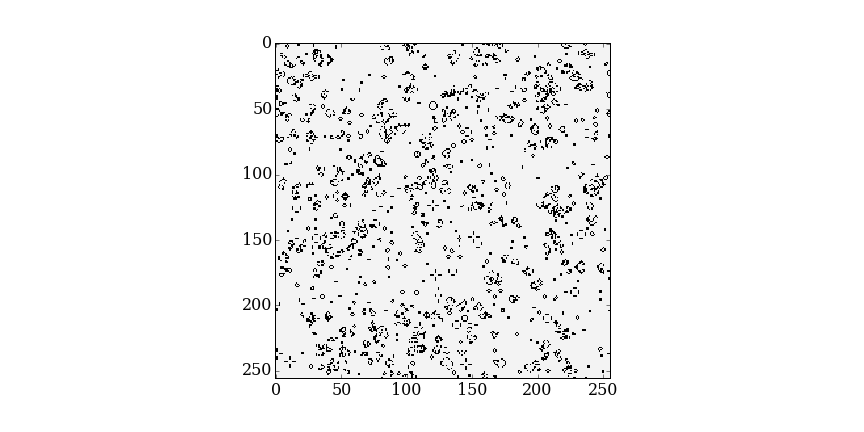
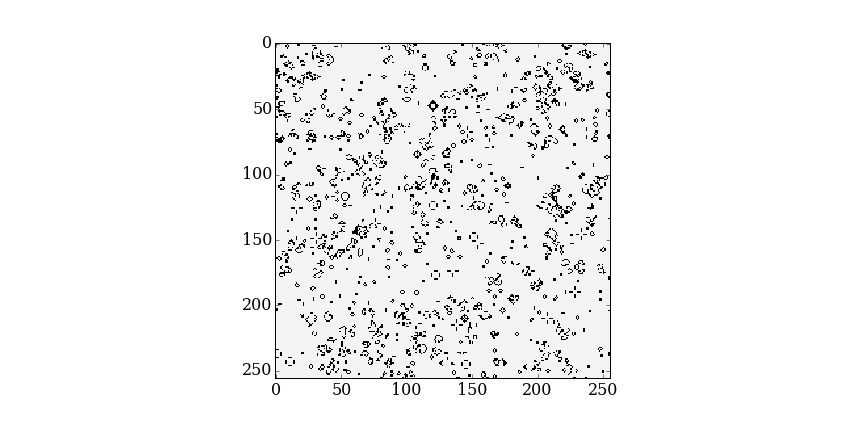
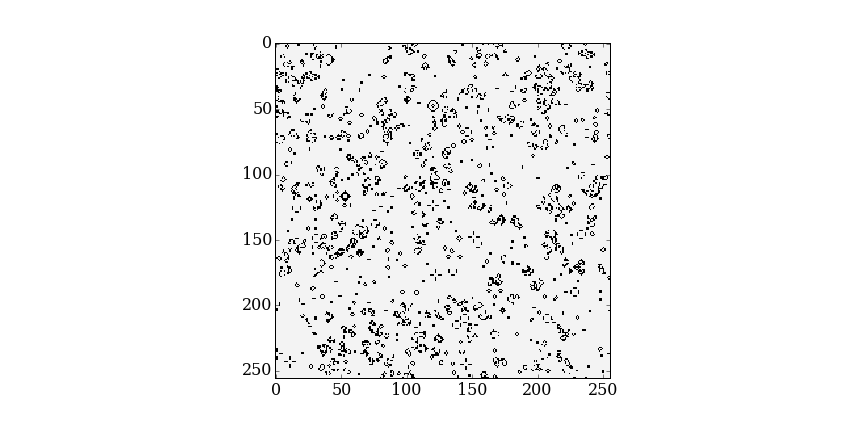
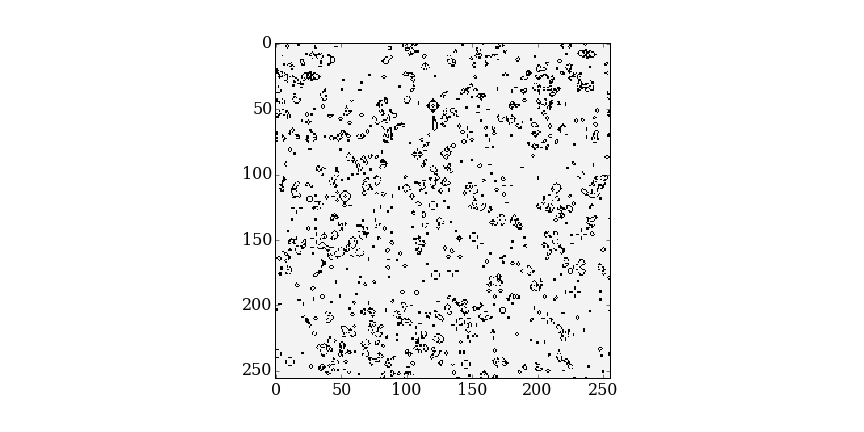
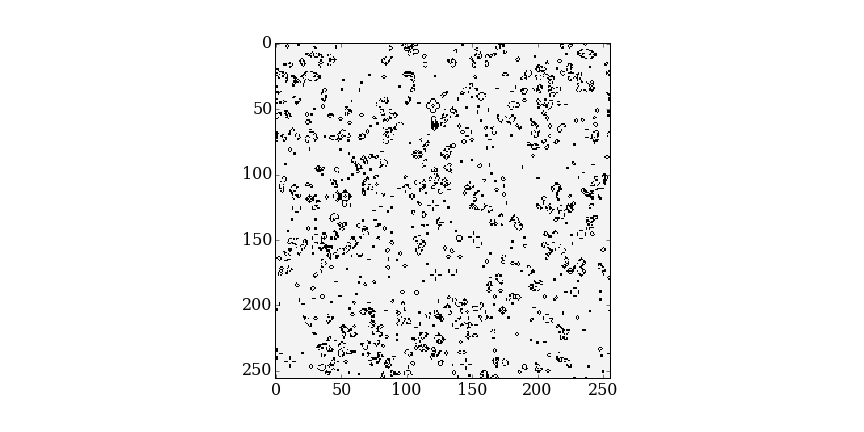
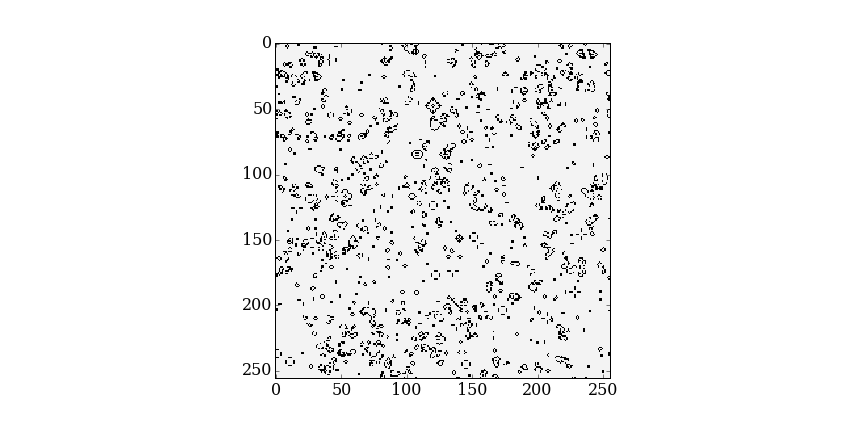
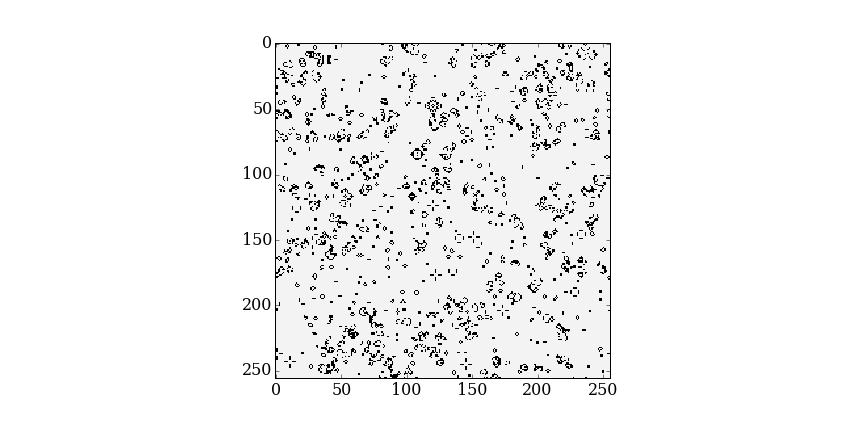
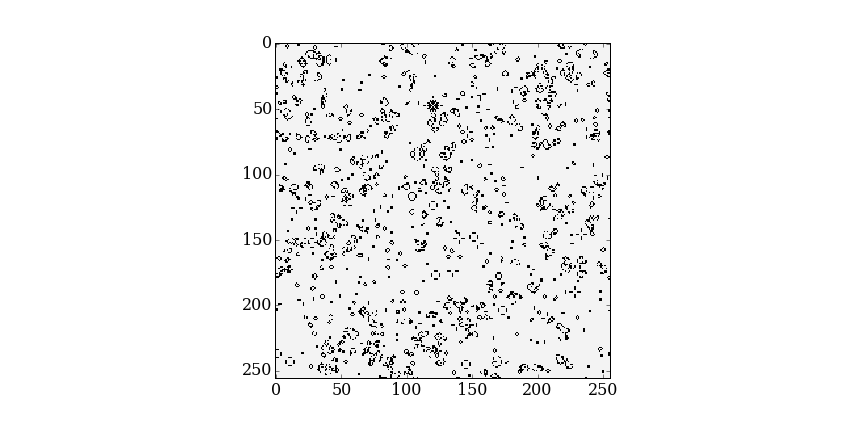
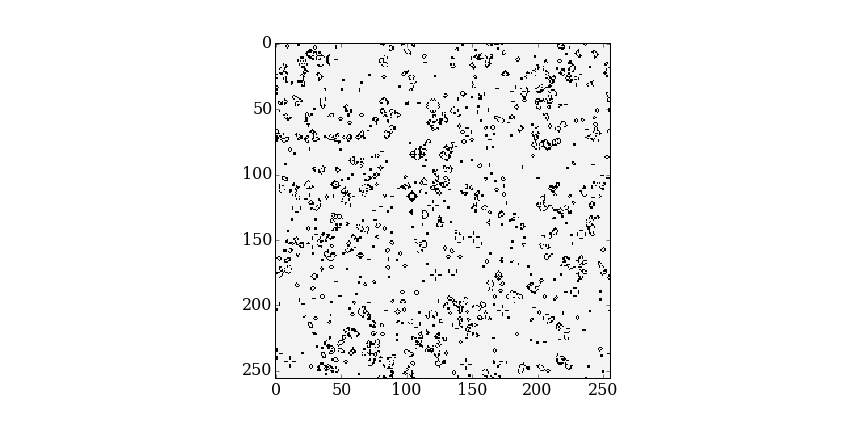
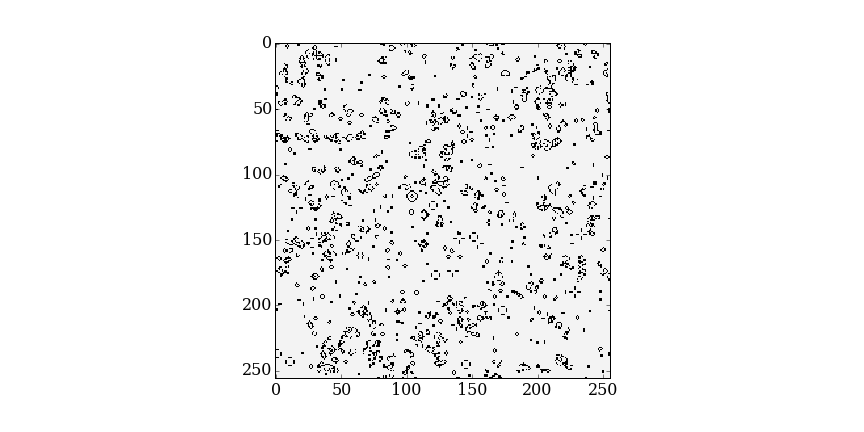
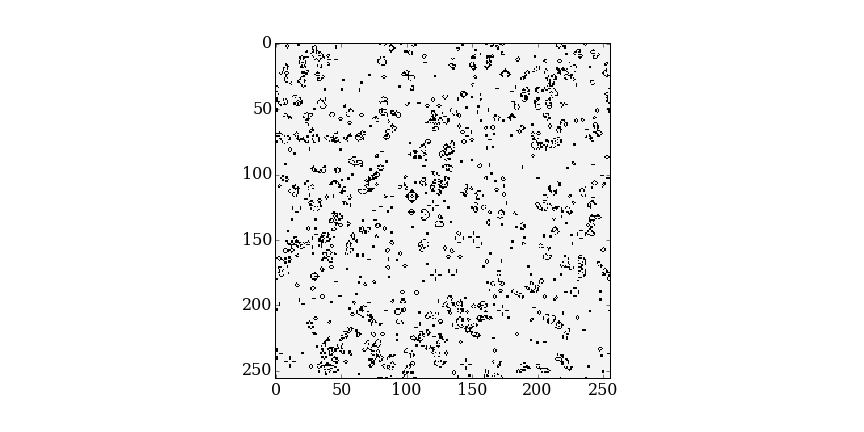
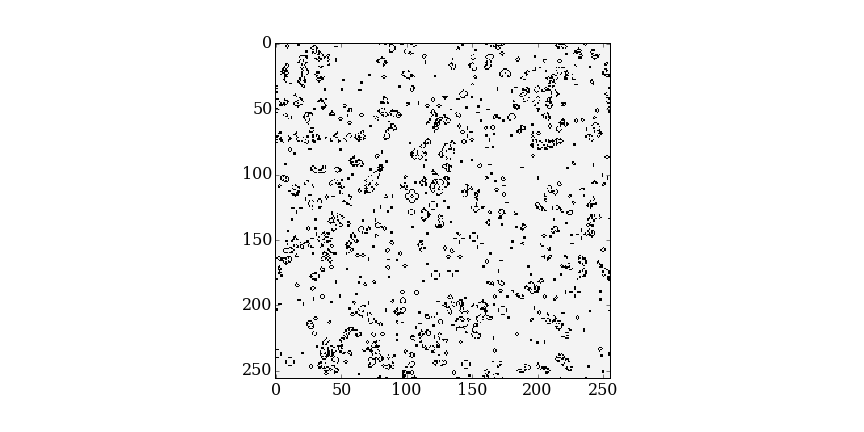
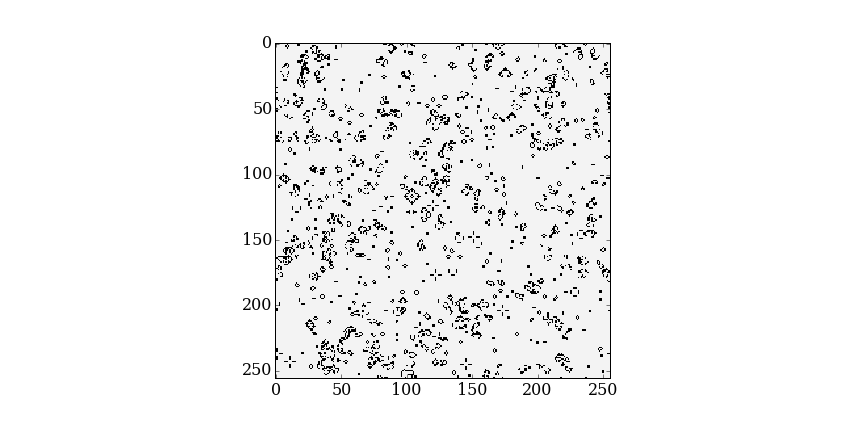
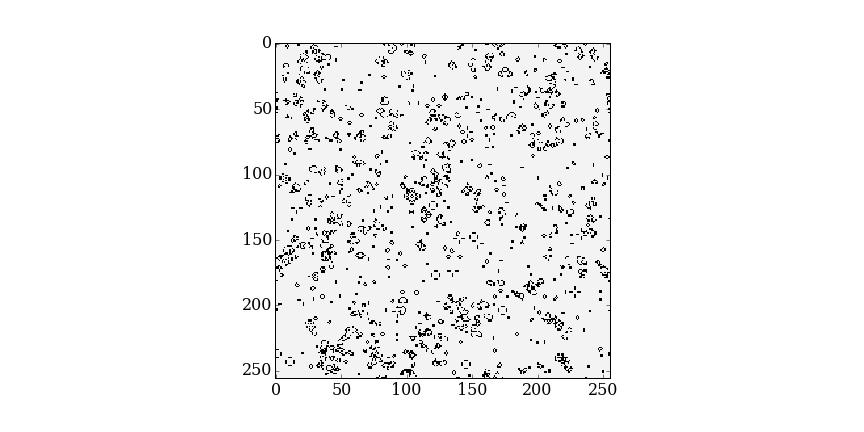
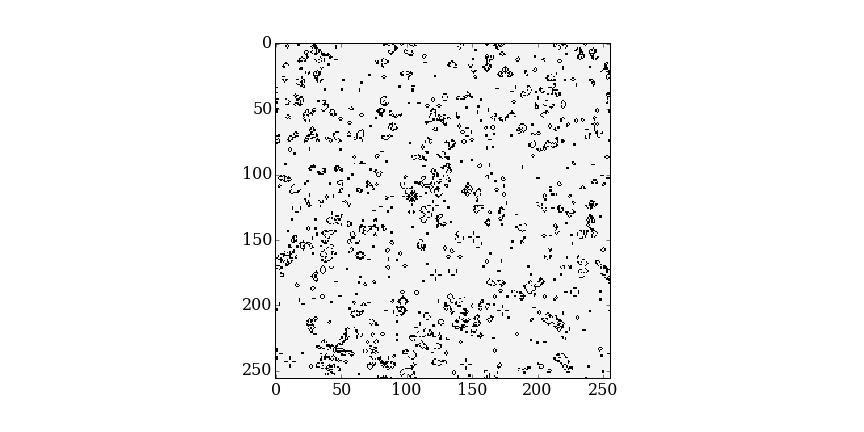
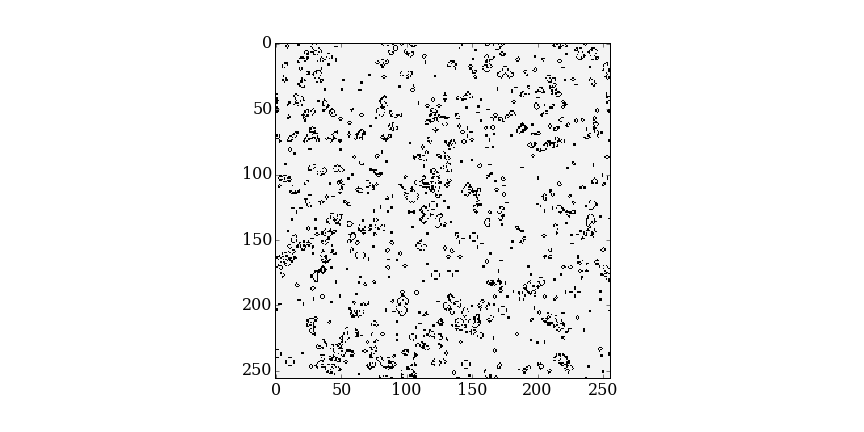
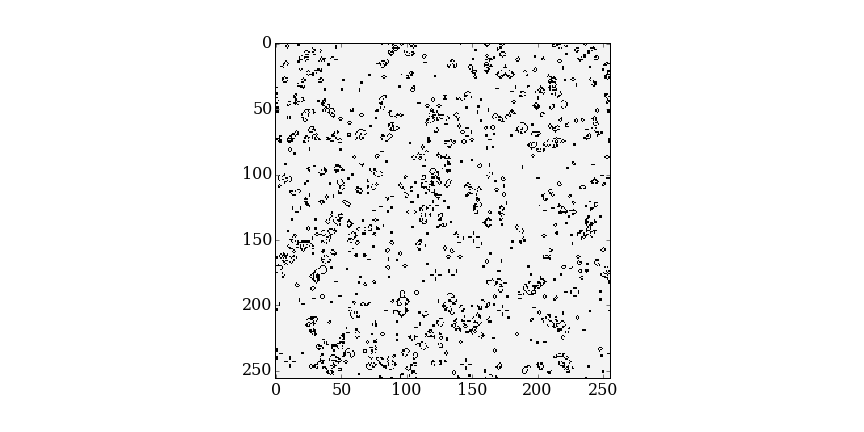
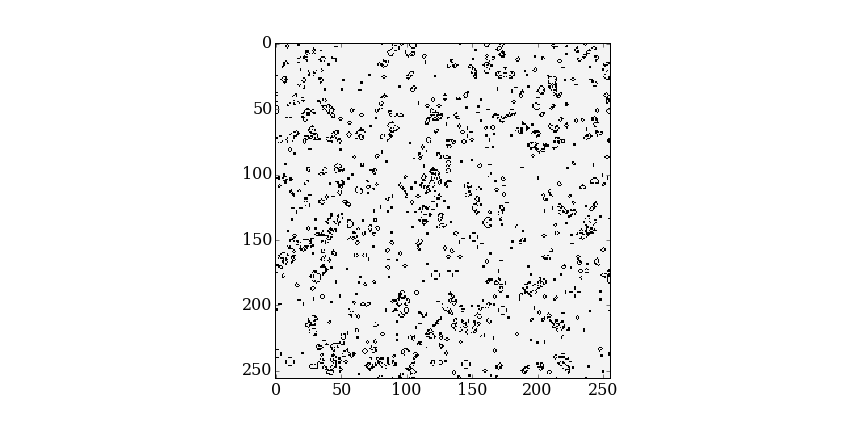
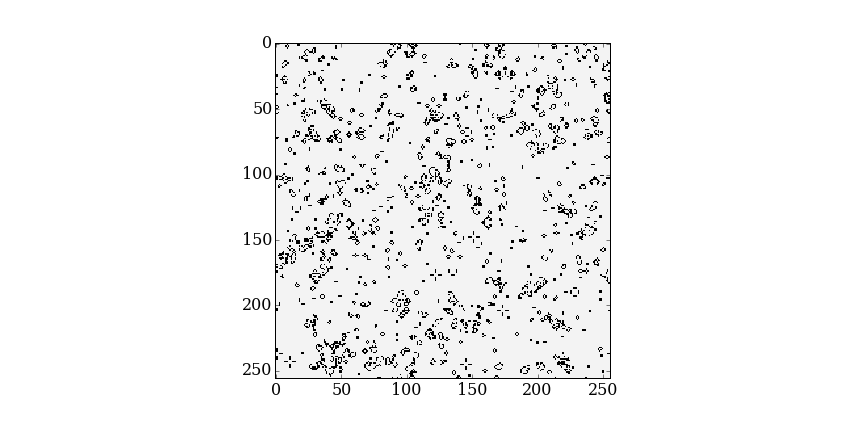
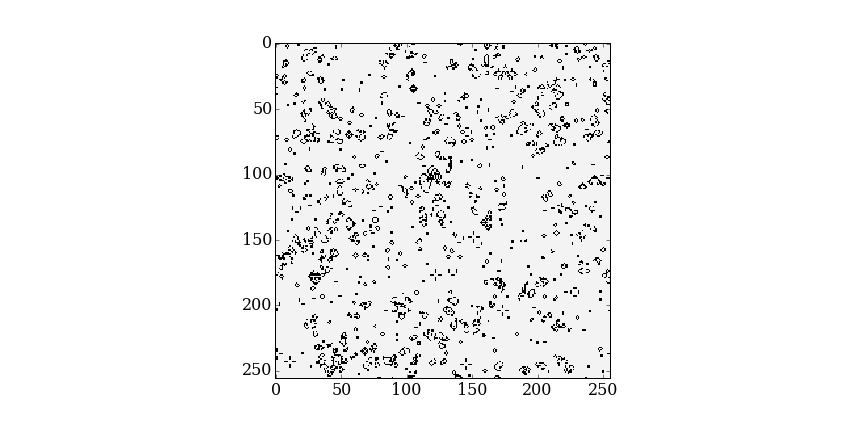
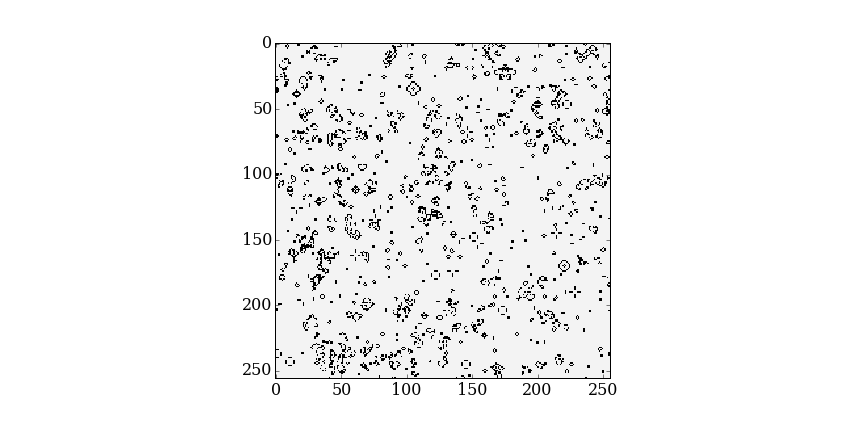
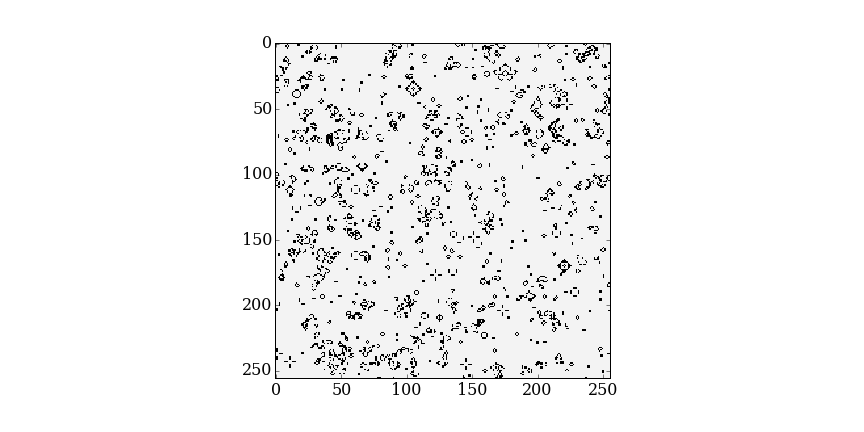
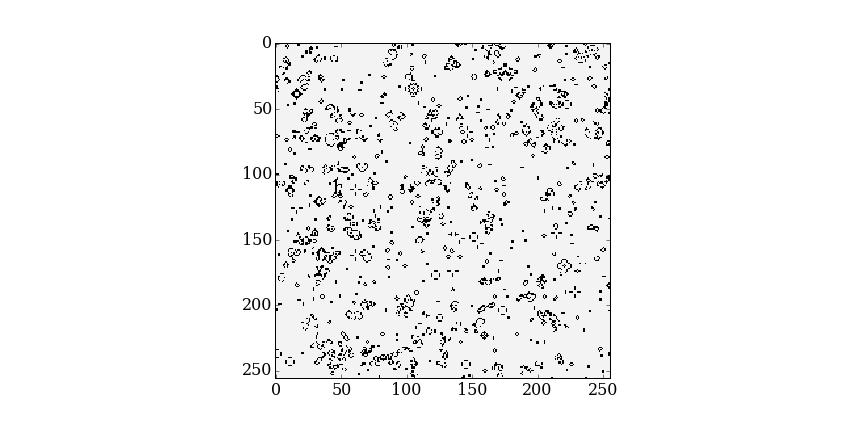
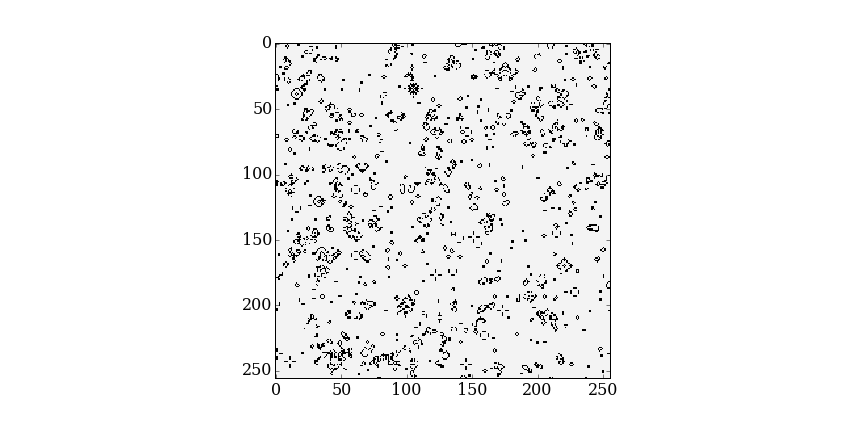
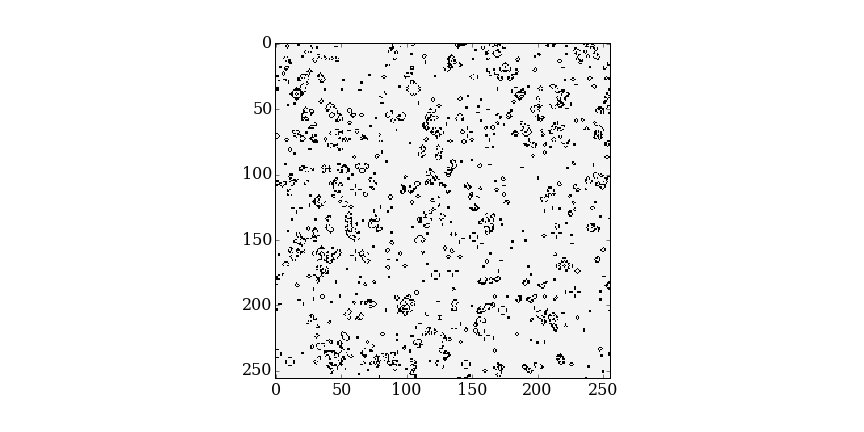
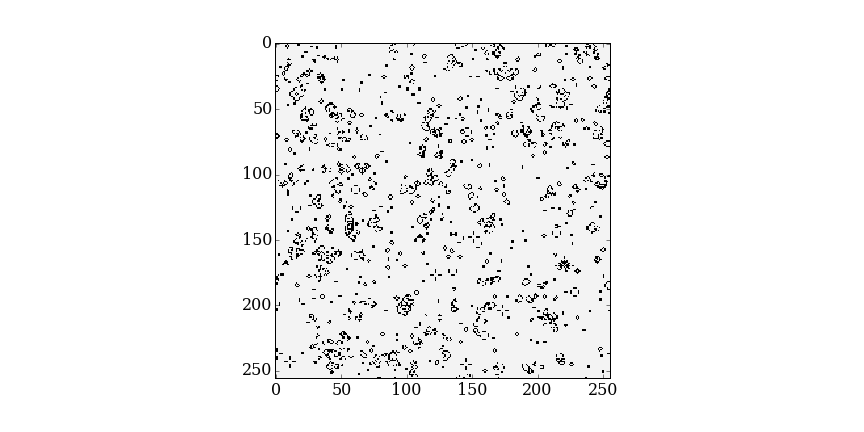
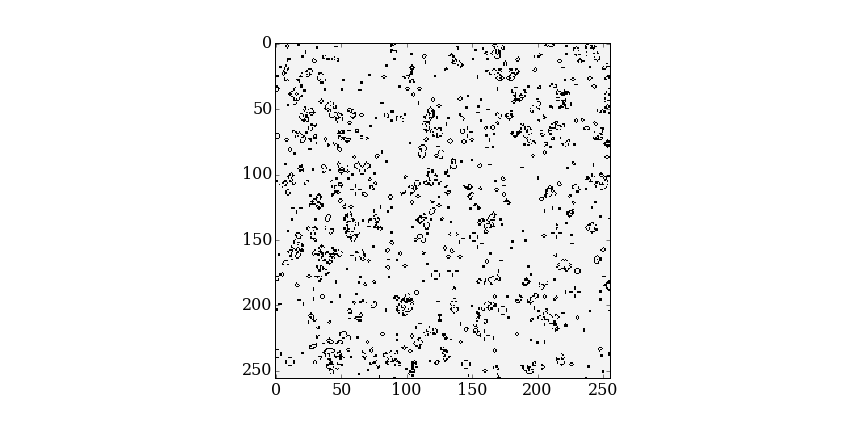
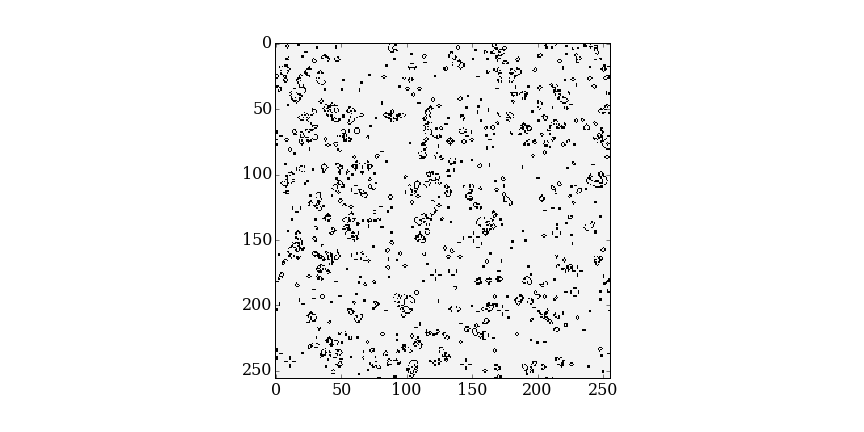
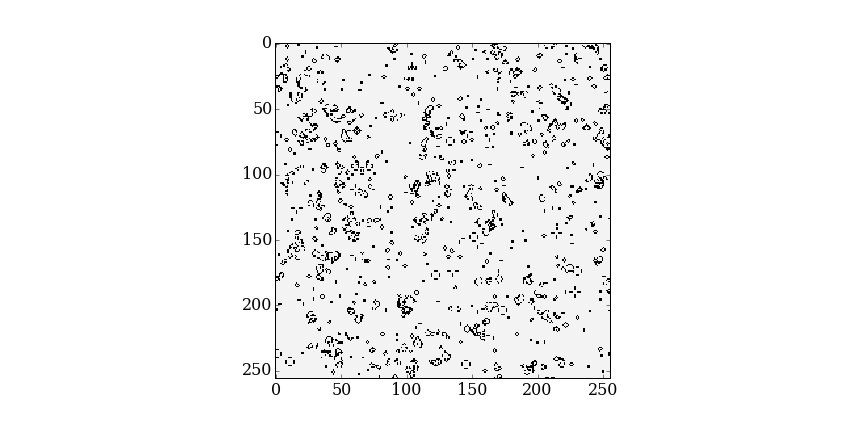
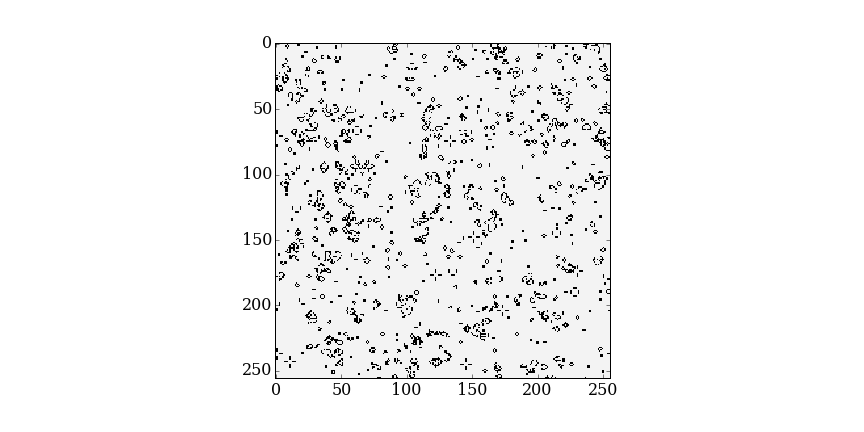
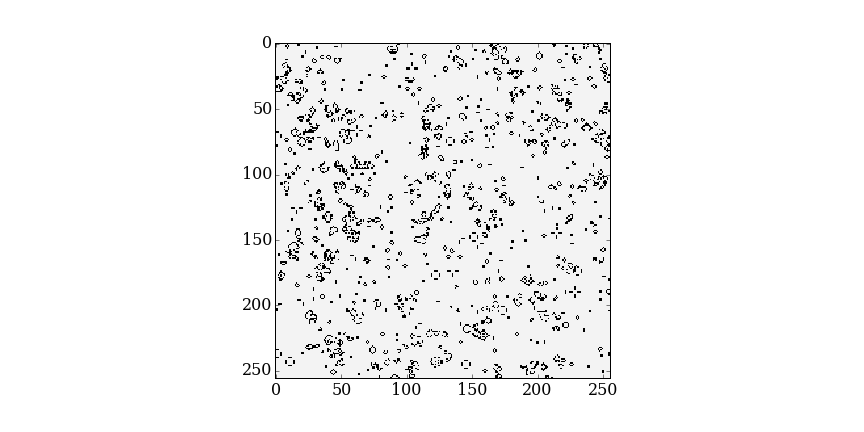
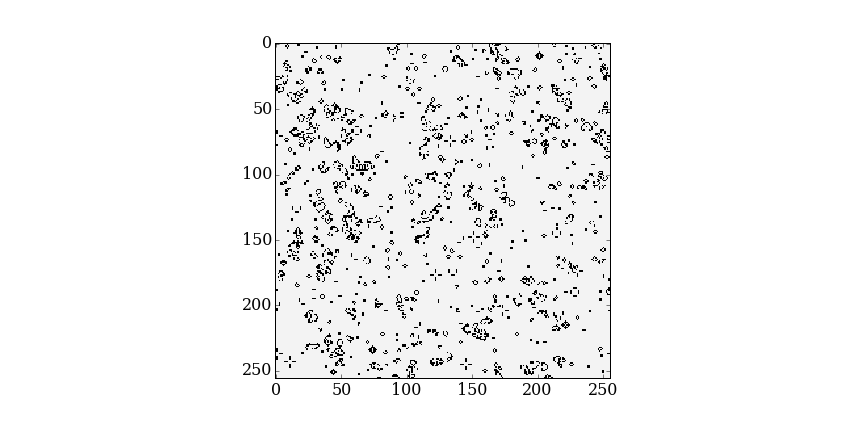
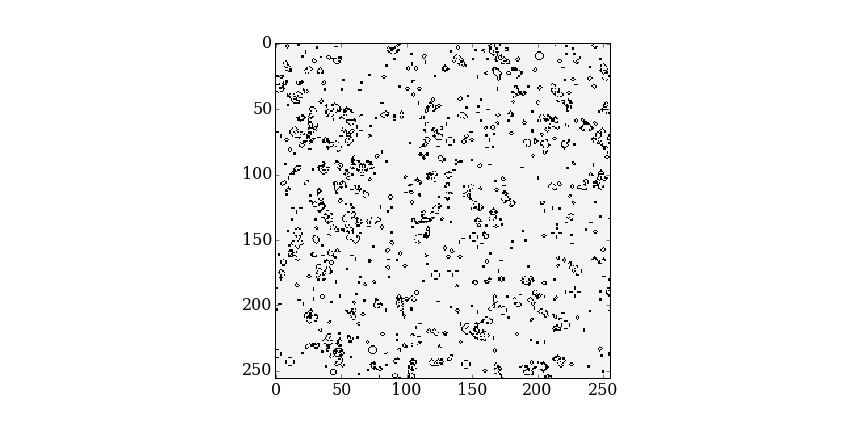
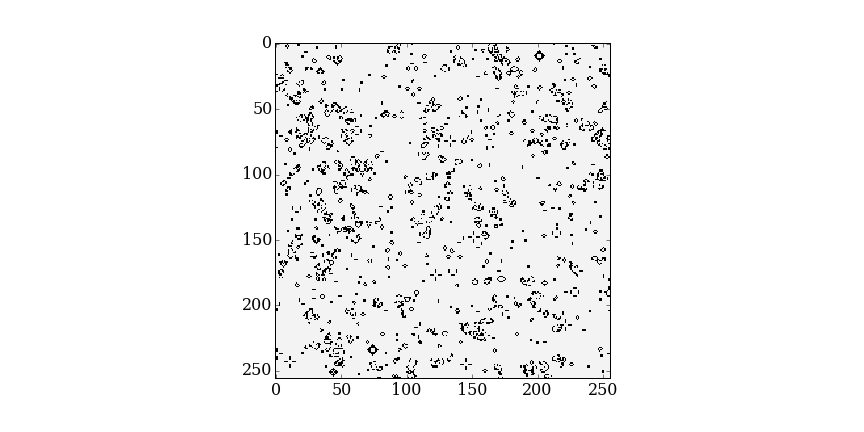
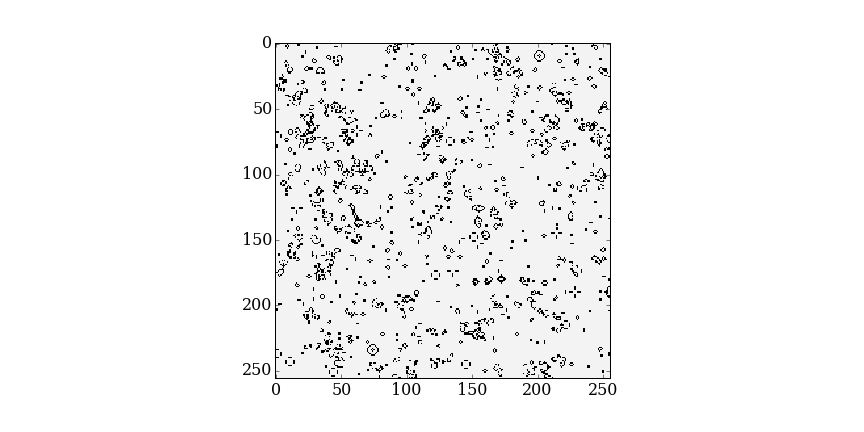
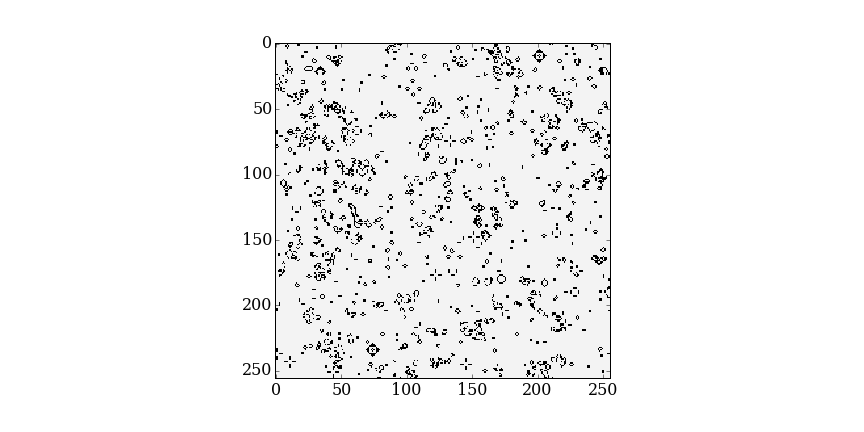
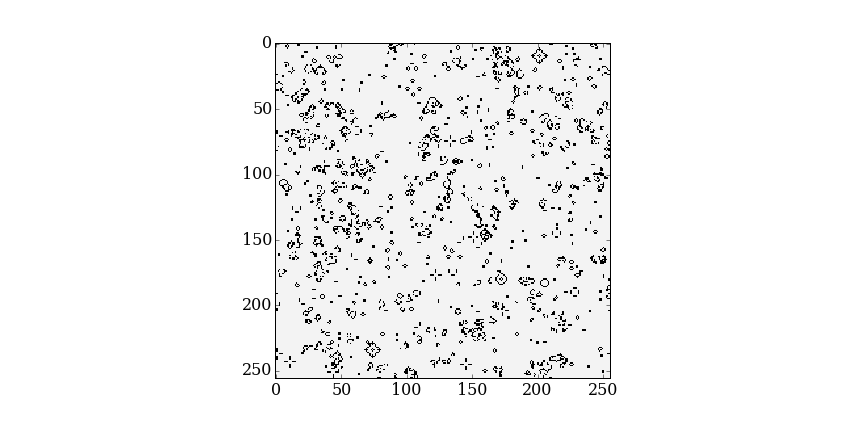

In [8]:
grid_random = numpy.random.randint(0, 2, (258, 258))

life_animation(grid_random, dpi=20, frames=200)

## Cellular Automata

The Game of Life is an example of *cellular automata*: a "grid" containing cells representing some model is updated in discrete timesteps according to some rules, usually involving neighbouring cells. Each cell can be thought of as an independent player of the game - an agent - that interacts through its neighbours in order to evolve.

As an example of a cellular automata model, consider traffic flow. A road is modelled as a grid with one spatial dimension containing $N$ cells. The cell either contains a car (has value $1$) or doesn't (has value $0$). If the space in front of the car is empty it moves forwards; if not, it stays where it is. Periodic boundary conditions are used. We phrase this in terms of "road locations" $R_i^n$, so that $R_i^{n+1} = 0$ except for:

\begin{align}
  R_i^{n+1} & = 1 & \text{if $R_i^n=1$ and $R_{i+1}^n=1$ (car does not move), or} \\
  R_i^{n+1} & = 1 & \text{if $R_{i-1}^n=1$ and $R_i^n=0$ (car moves forwards)}.
\end{align}

A useful diagnostic quantity for this model is the *average velocity*; the number of cars that moved in one step divided by the total number of cars on the road.

### Initial data and density

For initial data, we choose the *density* of cars on the road to be between $0$ and $1$. Then, for each grid cell, compute uniform random numbers for each cell and initialize the cell according to the density:

In [9]:
N = 1000
desired_density = 0.75
initial_grid = numpy.array(numpy.random.rand(N) < desired_density, dtype=int)
actual_density = numpy.sum(initial_grid) / N
print("Actual density {}".format(actual_density))

Actual density 0.754


### Evolution

Construct "roads" as above and evolve according to the update rule. See how the average velocity behaves. Test the limiting cases. Plot the behaviour of the average velocity against the density: can you understand why it behaves this way? If needed, plot the late time locations of the "cars".

In [10]:
def evolve_traffic(grid):
    N = len(grid)
    N_cars = numpy.sum(grid)
    point_stays = numpy.zeros_like(grid)
    point_stays[:-1] = numpy.logical_and(grid[:-1], grid[1:])
    point_stays[-1] = grid[-1] and grid[0]
    point_moved_to = numpy.zeros_like(grid)
    point_moved_to[1:] = numpy.logical_and(numpy.logical_not(grid[1:]), grid[:-1])
    point_moved_to[0] = (not grid[0]) and grid[-1]
    grid = numpy.logical_or(point_moved_to, point_stays)
    assert(numpy.sum(grid) == N_cars), "Have gained or lost a car!"
    return grid, numpy.sum(point_moved_to) / N_cars

In [11]:
nt = 100
velocity = numpy.zeros((nt,))
grid = initial_grid.copy()
for i in range(nt):
    grid, velocity[i] = evolve_traffic(grid)

In [12]:
pyplot.plot(velocity)
pyplot.xlabel(r"$t$")
pyplot.ylabel("Average velocity")
pyplot.show()

Plot the limiting velocity against the density.

In [13]:
desired_densities = numpy.linspace(0, 1, 50, endpoint=False)
actual_densities = numpy.zeros_like(desired_densities)
limiting_v = numpy.zeros_like(desired_densities)
for i, desired_density in enumerate(desired_densities):
    initial_grid = numpy.array(numpy.random.rand(N) < desired_density, dtype=int)
    actual_densities[i] = numpy.sum(initial_grid) / N
    velocity = numpy.zeros((nt,))
    grid = initial_grid.copy()
    for t in range(nt):
        grid, velocity[t] = evolve_traffic(grid)
    limiting_v[i] = velocity[-1]

/home/kostas/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in long_scalars


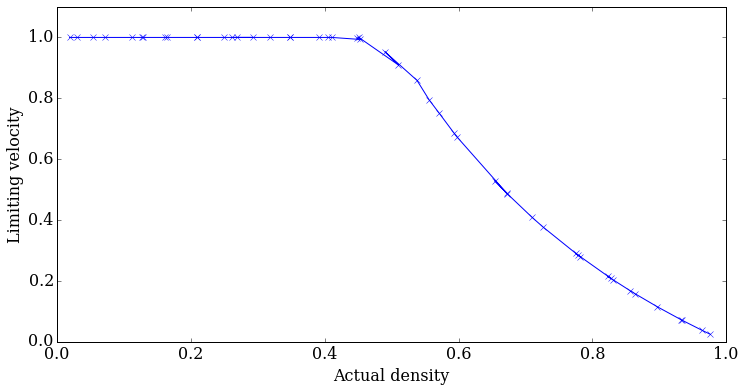

In [14]:
pyplot.plot(actual_densities, limiting_v, 'bx-')
pyplot.xlim(0,1)
pyplot.ylim(0,1.1)
pyplot.xlabel('Actual density')
pyplot.ylabel('Limiting velocity')
pyplot.show();

### Making it more complex

Consider adding another lane to the road. The grid becomes a $N \times 2$ array. The "fast" lane can take one additional step every $k$ steps (eg, if the fast lane is going $10$% faster, then every tenth step the fast lane takes two timesteps instead of one).

We now need to add rules to change lane. Denote cells in the fast lane by $F^n_i$, and in the slow lane by $S^n_i$. Consider a "polite" overtaking move: if $S^n_i=1$ and $S^n_{i+1}=1$ then the car at $S^n_i$ will overtake (move to $F^{n+1}_{i+1}$) *only* if there are no cars in its way ($F^n_{i} = 0 = F^n_{i+1}$) *and* if it will not block a car in the fast lane ($F^n_{i-1}=0$). It will also move back into the slow lane in the same circumstances: if a car in the fast lane at $F^n_{i}=1$ is not blocked by, or blocking, any slow lane cars, ie $0 = S^n_i = S^n_{i+1} = S^n_{i-1}$.

Initialize the slow lane only with a certain density of cars. Investigate how the what the average *density* of cars in the fast and slow lane looks like, depending on the initial density.

In [15]:
def evolve_two_lanes(grid, t):
    N = len(grid)
    N_cars = numpy.sum(grid)
    slow = grid[:,0]
    fast = grid[:,1]
    print(slow)
    print(fast)
    print("Slow {}, fast {}, total {}".format(numpy.sum(slow), numpy.sum(fast), N_cars))
    slow_stays = numpy.zeros_like(slow)
    slow_stays[:-1] = numpy.logical_and(slow[:-1], slow[1:])
    slow_stays[-1] = slow[-1] and slow[0]
    
    slow_moved_to = numpy.zeros_like(slow)
    slow_moved_to[1:] = numpy.logical_and(numpy.logical_not(slow[1:]), slow[:-1])
    slow_moved_to[0] = (not slow[0]) and slow[-1]
    
    slow_overtakes = numpy.zeros_like(slow)
    for i in range(1, len(slow)-1):
        slow_overtakes[i] = slow_stays[i] & (not numpy.any(fast[i-1:i+2]))
    slow_overtakes[0] = slow_stays[0] & (not numpy.any(fast[0:2])) & (not fast[-1])
    slow_overtakes[-1] = slow_stays[-1] & (not numpy.any(fast[-2:])) & (not fast[0])
    
    fast_stays = numpy.zeros_like(fast)
    fast_stays[:-1] = numpy.logical_and(fast[:-1], fast[1:])
    fast_stays[-1] = fast[-1] and fast[0]
    
    fast_moved_to = numpy.zeros_like(fast)
    fast_moved_to[1:] = numpy.logical_and(numpy.logical_not(fast[1:]), fast[:-1])
    fast_moved_to[0] = (not fast[0]) and fast[-1]
    
    fast_goes_back = numpy.zeros_like(fast)
    for i in range(1, len(slow)-1):
        fast_goes_back[i] = fast[i] & (not numpy.any(slow[i-1:i+2]))
    fast_goes_back[0] = fast[0] & (not numpy.any(slow[0:2])) & (not slow[-1])
    fast_goes_back[-1] = fast[-1] & (not numpy.any(slow[-2:])) & (not slow[0])
    
    if t%10:
        slow = numpy.logical_or(slow_moved_to, slow_stays)
        slow = numpy.logical_and(slow, numpy.logical_not(slow_overtakes))
        for i in range(len(slow)-1):
            if slow_overtakes[i]:
                fast[i+1] = 1
        if slow_overtakes[-1]:
            fast[0] = 1
    
    fast = numpy.logical_or(fast, fast_moved_to)
    fast = numpy.logical_or(fast, fast_stays)
    fast = numpy.logical_and(fast, numpy.logical_not(fast_goes_back))
    for i in range(len(fast)-1):
        if fast_goes_back[i]:
            slow[i+1] = 1
    if fast_goes_back[-1]:
        slow[0] = 1
    
    print(slow)
    print(fast)
    print("After evolve: slow {}, fast {}, total {}".format(numpy.sum(slow), numpy.sum(fast), N_cars))
    
    grid[:,0] = slow
    grid[:,1] = fast
    
    assert(numpy.sum(grid) == N_cars), "Have gained or lost a car!"
    
    return grid, numpy.sum(slow) / N, numpy.sum(fast) / N

In [16]:
def evolve_two_lanes(grid, t):
    N = len(grid)
    N_cars = numpy.sum(grid)
    
    slow = grid[:,0]
    fast = grid[:,1]
    slow_new = numpy.zeros((N,), dtype=int)
    fast_new = numpy.zeros((N,), dtype=int)
    
    for i in range(1,N-1):
        if slow[i]:
            if slow[i+1]:
                if not numpy.any(fast[i-1:i+2]):
                    fast_new[i+1] = 1
                else:
                    slow_new[i] = 1
            else:
                slow_new[i+1] = 1
    if slow[0]:
        if slow[1]:
            if (not fast[-1]) & (not numpy.any(fast[:2])):
                fast_new[1] = 1
            else:
                slow_new[0] = 1
        else:
            slow_new[1] = 1
    if slow[-1]:
        if slow[0]:
            if (not fast[0]) & (not numpy.any(fast[-2:])):
                fast_new[0] = 1
            else:
                slow_new[-1] = 1
        else:
            slow_new[0] = 1
    
    for i in range(1,N-1):
        if fast[i]:
            if not numpy.any(slow[i-1:i+2]):
                slow_new[i+1] = 1
            else:
                if fast[i+1]:
                    fast_new[i] = 1
                else:
                    fast_new[i+1] = 1
    if fast[0]:
        if (not numpy.any(slow[:2])) & (not slow[-1]):
            slow_new[1] = 1
        else:
            if fast[1]:
                fast_new[0] = 1
            else:
                fast_new[1] = 1
    if fast[-1]:
        if (not numpy.any(slow[-2:])) & (not slow[0]):
            slow_new[0] = 1
        else:
            if fast[0]:
                fast_new[-1] = 1
            else:
                fast_new[0] = 1
    
    grid[:,0] = slow_new
    grid[:,1] = fast_new
    
    assert(numpy.sum(grid) == N_cars), "Have gained or lost a car!"
    
    return grid, numpy.sum(slow) / N, numpy.sum(fast) / N

In [17]:
N = 1000
desired_density = 0.75
initial_slow = numpy.array(numpy.random.rand(N) < desired_density, dtype=int)
initial_fast = numpy.zeros((N,), dtype=int)
initial_grid = numpy.vstack((initial_slow, initial_fast)).T
actual_density = numpy.sum(initial_slow) / N
print("Actual density {}".format(actual_density))

Actual density 0.761


In [18]:
nt = 200
slow_density = numpy.zeros((nt,))
fast_density = numpy.zeros((nt,))
grid = initial_grid.copy()
for t in range(nt):
    grid, slow_density[t], fast_density[t] = evolve_two_lanes(grid, t)

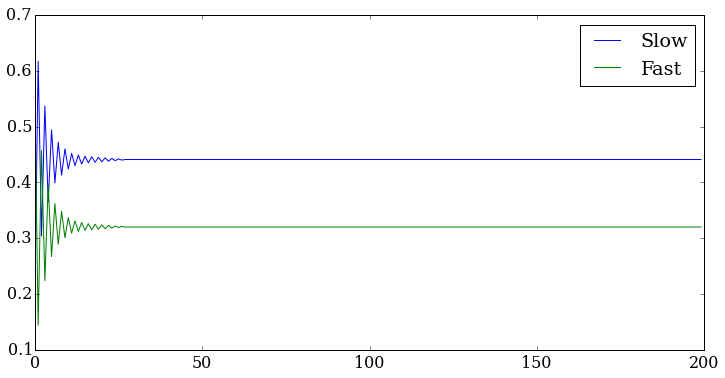

In [19]:
pyplot.plot(slow_density, label="Slow")
pyplot.plot(fast_density, label="Fast")
pyplot.legend()
pyplot.show();

In [20]:
desired_densities = numpy.linspace(0, 1, 50, endpoint=False)
actual_densities = numpy.zeros_like(desired_densities)
limiting_density_slow = numpy.zeros_like(desired_densities)
limiting_density_fast = numpy.zeros_like(desired_densities)
for i, desired_density in enumerate(desired_densities):
    initial_slow = numpy.array(numpy.random.rand(N) < desired_density, dtype=int)
    initial_fast = numpy.zeros((N,), dtype=int)
    initial_grid = numpy.vstack((initial_slow, initial_fast)).T
    actual_densities[i] = numpy.sum(initial_slow) / N
    slow_density = numpy.zeros((nt,))
    fast_density = numpy.zeros((nt,))
    grid = initial_grid.copy()
    for t in range(nt):
        grid, slow_density[t], fast_density[t] = evolve_two_lanes(grid, t)
    limiting_density_slow[i] = slow_density[-1]
    limiting_density_fast[i] = fast_density[-1]

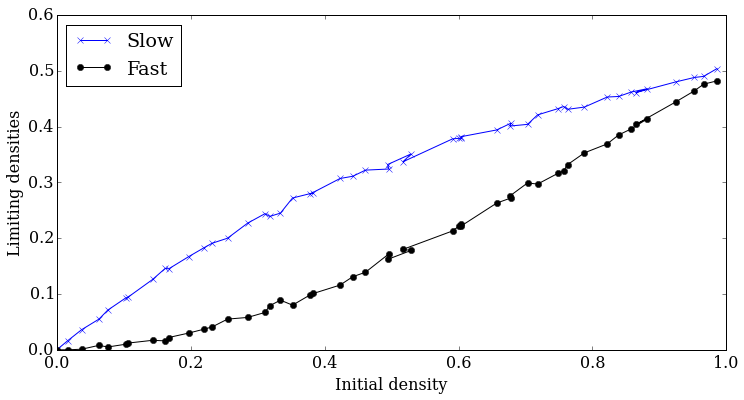

In [21]:
pyplot.plot(actual_densities, limiting_density_slow, 'bx-', label="Slow")
pyplot.plot(actual_densities, limiting_density_fast, 'ko-', label="Fast")
pyplot.xlim(0,1)
pyplot.ylim(0,0.6)
pyplot.xlabel('Initial density')
pyplot.ylabel('Limiting densities')
pyplot.legend(loc='upper left')
pyplot.show();